# BICS_ABM
Ethan Roubenoff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BICS_ABM import BICS_ABM, VaccineRule
import time
from joblib import Parallel, delayed
from scipy.stats.qmc import LatinHypercube
from scipy.stats import norm, uniform, randint

import collections
import re

/Users/eroubenoff/BICS_ABM/BICS_ABM.py:85: DtypeWarning: Columns (26,63,64,65,66,68,69,70,71,72,73,76,86,139,140,149,175,176,177,191,195,205,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,229) have mixed types. Specify dtype option on import or set low_memory=False.
  BICS = pd.read_csv("data/df_all_waves.csv")


## Quick, demonstrative example:

hhid
age
gender
num_cc_nonhh
lefthome_num
vaccine_priority
NPI
3665
----------------------------------------
Parameters passed to simulation:
N_HH:            1000
GAMMA_MIN, _MAX: 48, 96
SIGMA_MIN, _MAX: 72, 168
BETA_VEC:            0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05  0.05

Day   59 Hour 23 | S:  3665 | E:     0 | Ic:     0 | Isc:     0 | R:     0 | D:     0 | V1:     0 | V2:  2926 | VW:     0 | VBoost:     0 | Edge counts: Household:  6136 Work  Random      0
Index cases: 1740  770  206  2560  3261  
Day   60 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   60 Hour  9 | 
N edges5483
N edges0
N edges6136
Day   60 Hour 10 | 
N edges5479
N edges0
N edges6136
Day   60 Hour 11 | 
N edges5481
N edges0
N edges6136
Day   60 Hour 12 | 
N edges5483
N edges0
N edges6136
Day   60 Hour 13 | 
N edges5512
N edges0
N edges6136
Day   60 Hour 14 | 
N edges5445
N edges0
N edges6136
Day   60 Hour 15 | 
N edges5480
N edges0
N edges6136
Day   60 Hour 16 | 
N edges5520
N edges0
N edges6136
Day   60 Hour 17 | 
N edges5434
N edges0
N edges6136
Day   61 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   61 Hour  9 | 
N edges5427
N edges0
N edges6136
Day   61 Hour 10 | 
N edges5532
N edges0
N edges6136
Day   61 Hour 11 | 
N edges5456
N edges0
N edges6136
Day   61 Hour 12 | 
N edge

Day   65 Hour 11 | 
N edges5484
N edges0
N edges6136
Day   65 Hour 12 | 
N edges5493
N edges0
N edges6136
Day   65 Hour 13 | 
N edges5506
N edges0
N edges6136
Day   65 Hour 14 | 
N edges5464
N edges0
N edges6136
Day   65 Hour 15 | 
N edges5465
N edges0
N edges6136
Day   65 Hour 16 | 
N edges5524
N edges0
N edges6136
Day   65 Hour 17 | 
N edges5515
N edges0
N edges6136
Day   66 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   66 Hour  9 | 
N edges5416
N edges0
N edges6136
Day   66 Hour 10 | 
N edges5514
N edges0
N edges6136
Day   66 Hour 11 | 
N edges5457
N edges0
N edges6136
Day   66 Hour 12 | 
N edges5450
N edges0
N edges6136
Day   66 Hour 13 | 
N edges5484
N edges0
N edges6136
Day   66 Hour 14 | 
N edges5424
N edges0
N edges6136
Day   66 Hour 15 | 
N edges5462
N edges0
N edges6136
Day   66 Hour 16 | 
N edges5475
N edges0
N edges6136
Day   66 Hour 17 | 
N edges5428
N edges0
N edges6136
Day   67 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   67 Hour  9 | 
N edges5422
N edges0
N edg

N edges6136
Day   71 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   71 Hour  9 | 
N edges5448
N edges0
N edges6136
Day   71 Hour 10 | 
N edges5466
N edges0
N edges6136
Day   71 Hour 11 | 
N edges5461
N edges0
N edges6136
Day   71 Hour 12 | 
N edges5512
N edges0
N edges6136
Day   71 Hour 13 | 
N edges5469
N edges0
N edges6136
Day   71 Hour 14 | 
N edges5470
N edges0
N edges6136
Day   71 Hour 15 | 
N edges5473
N edges0
N edges6136
Day   71 Hour 16 | 
N edges5453
N edges0
N edges6136
Day   71 Hour 17 | 
N edges5455
N edges0
N edges6136
Day   72 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   72 Hour  9 | 
N edges5500
N edges0
N edges6136
Day   72 Hour 10 | 
N edges5469
N edges0
N edges6136
Day   72 Hour 11 | 
N edges5503
N edges0
N edges6136
Day   72 Hour 12 | 
N edges5464
N edges0
N edges6136
Day   72 Hour 13 | 
N edges5535
N edges0
N edges6136
Day   72 Hour 14 | 
N edges5437
N edges0
N edges6136
Day   72 Hour 15 | 
N edges5449
N edges0
N edges6136
Day   72 Hour 16 | 
N edges5348
N 

Day   76 Hour 13 | 
N edges5436
N edges0
N edges6136
Day   76 Hour 14 | 
N edges5439
N edges0
N edges6136
Day   76 Hour 15 | 
N edges5497
N edges0
N edges6136
Day   76 Hour 16 | 
N edges5482
N edges0
N edges6136
Day   76 Hour 17 | 
N edges5474
N edges0
N edges6136
Day   77 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   77 Hour  9 | 
N edges5459
N edges0
N edges6136
Day   77 Hour 10 | 
N edges5460
N edges0
N edges6136
Day   77 Hour 11 | 
N edges5433
N edges0
N edges6136
Day   77 Hour 12 | 
N edges5511
N edges0
N edges6136
Day   77 Hour 13 | 
N edges5460
N edges0
N edges6136
Day   77 Hour 14 | 
N edges5435
N edges0
N edges6136
Day   77 Hour 15 | 
N edges5483
N edges0
N edges6136
Day   77 Hour 16 | 
N edges5490
N edges0
N edges6136
Day   77 Hour 17 | 
N edges5439
N edges0
N edges6136
Day   78 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   78 Hour  9 | 
N edges5461
N edges0
N edges6136
Day   78 Hour 10 | 
N edges5439
N edges0
N edges6136
Day   78 Hour 11 | 
N edges5517
N edges0
N edg

Day   82 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   82 Hour  9 | 
N edges5483
N edges0
N edges6136
Day   82 Hour 10 | 
N edges5486
N edges0
N edges6136
Day   82 Hour 11 | 
N edges5475
N edges0
N edges6136
Day   82 Hour 12 | 
N edges5496
N edges0
N edges6136
Day   82 Hour 13 | 
N edges5438
N edges0
N edges6136
Day   82 Hour 14 | 
N edges5481
N edges0
N edges6136
Day   82 Hour 15 | 
N edges5440
N edges0
N edges6136
Day   82 Hour 16 | 
N edges5454
N edges0
N edges6136
Day   82 Hour 17 | 
N edges5437
N edges0
N edges6136
Day   83 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   83 Hour  9 | 
N edges5453
N edges0
N edges6136
Day   83 Hour 10 | 
N edges5474
N edges0
N edges6136
Day   83 Hour 11 | 
N edges5481
N edges0
N edges6136
Day   83 Hour 12 | 
N edges5537
N edges0
N edges6136
Day   83 Hour 13 | 
N edges5435
N edges0
N edges6136
Day   83 Hour 14 | 
N edges5484
N edges0
N edges6136
Day   83 Hour 15 | 
N edges5459
N edges0
N edges6136
Day   83 Hour 16 | 
N edges5417
N edges0
N edg

N edges6136
Day   87 Hour 17 | 
N edges5438
N edges0
N edges6136
Day   88 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   88 Hour  9 | 
N edges5456
N edges0
N edges6136
Day   88 Hour 10 | 
N edges5459
N edges0
N edges6136
Day   88 Hour 11 | 
N edges5467
N edges0
N edges6136
Day   88 Hour 12 | 
N edges5500
N edges0
N edges6136
Day   88 Hour 13 | 
N edges5498
N edges0
N edges6136
Day   88 Hour 14 | 
N edges5492
N edges0
N edges6136
Day   88 Hour 15 | 
N edges5421
N edges0
N edges6136
Day   88 Hour 16 | 
N edges5448
N edges0
N edges6136
Day   88 Hour 17 | 
N edges5458
N edges0
N edges6136
Day   89 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   89 Hour  9 | 
N edges5442
N edges0
N edges6136
Day   89 Hour 10 | 
N edges5473
N edges0
N edges6136
Day   89 Hour 11 | 
N edges5484
N edges0
N edges6136
Day   89 Hour 12 | 
N edges5479
N edges0
N edges6136
Day   89 Hour 13 | 
N edges5471
N edges0
N edges6136
Day   89 Hour 14 | 
N edges5468
N edges0
N edges6136
Day   89 Hour 15 | 
N edges5429
N 

Day   93 Hour 12 | 
N edges5529
N edges0
N edges6136
Day   93 Hour 13 | 
N edges5485
N edges0
N edges6136
Day   93 Hour 14 | 
N edges5462
N edges0
N edges6136
Day   93 Hour 15 | 
N edges5418
N edges0
N edges6136
Day   93 Hour 16 | 
N edges5470
N edges0
N edges6136
Day   93 Hour 17 | 
N edges5496
N edges0
N edges6136
Day   94 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   94 Hour  9 | 
N edges5441
N edges0
N edges6136
Day   94 Hour 10 | 
N edges5477
N edges0
N edges6136
Day   94 Hour 11 | 
N edges5488
N edges0
N edges6136
Day   94 Hour 12 | 
N edges5507
N edges0
N edges6136
Day   94 Hour 13 | 
N edges5448
N edges0
N edges6136
Day   94 Hour 14 | 
N edges5436
N edges0
N edges6136
Day   94 Hour 15 | 
N edges5426
N edges0
N edges6136
Day   94 Hour 16 | 
N edges5482
N edges0
N edges6136
Day   94 Hour 17 | 
N edges5479
N edges0
N edges6136
Day   95 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   95 Hour  9 | 
N edges5511
N edges0
N edges6136
Day   95 Hour 10 | 
N edges5477
N edges0
N edg

Day   99 Hour  8 | 
N edges6136
N edges0
N edges6136
Day   99 Hour  9 | 
N edges5431
N edges0
N edges6136
Day   99 Hour 10 | 
N edges5455
N edges0
N edges6136
Day   99 Hour 11 | 
N edges5437
N edges0
N edges6136
Day   99 Hour 12 | 
N edges5450
N edges0
N edges6136
Day   99 Hour 13 | 
N edges5460
N edges0
N edges6136
Day   99 Hour 14 | 
N edges5471
N edges0
N edges6136
Day   99 Hour 15 | 
N edges5483
N edges0
N edges6136
Day   99 Hour 16 | 
N edges5465
N edges0
N edges6136
Day   99 Hour 17 | 
N edges5436
N edges0
N edges6136
Day  100 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  100 Hour  9 | 
N edges5486
N edges0
N edges6136
Day  100 Hour 10 | 
N edges5509
N edges0
N edges6136
Day  100 Hour 11 | 
N edges5519
N edges0
N edges6136
Day  100 Hour 12 | 
N edges5450
N edges0
N edges6136
Day  100 Hour 13 | 
N edges5398
N edges0
N edges6136
Day  100 Hour 14 | 
N edges5429
N edges0
N edges6136
Day  100 Hour 15 | 
N edges5493
N edges0
N edges6136
Day  100 Hour 16 | 
N edges5477
N edges0
N edg

Day  104 Hour 17 | 
N edges5480
N edges0
N edges6136
Day  105 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  105 Hour  9 | 
N edges5496
N edges0
N edges6136
Day  105 Hour 10 | 
N edges5450
N edges0
N edges6136
Day  105 Hour 11 | 
N edges5528
N edges0
N edges6136
Day  105 Hour 12 | 
N edges5436
N edges0
N edges6136
Day  105 Hour 13 | 
N edges5525
N edges0
N edges6136
Day  105 Hour 14 | 
N edges5455
N edges0
N edges6136
Day  105 Hour 15 | 
N edges5510
N edges0
N edges6136
Day  105 Hour 16 | 
N edges5491
N edges0
N edges6136
Day  105 Hour 17 | 
N edges5480
N edges0
N edges6136
Day  106 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  106 Hour  9 | 
N edges5429
N edges0
N edges6136
Day  106 Hour 10 | 
N edges5438
N edges0
N edges6136
Day  106 Hour 11 | 
N edges5452
N edges0
N edges6136
Day  106 Hour 12 | 
N edges5449
N edges0
N edges6136
Day  106 Hour 13 | 
N edges5540
N edges0
N edges6136
Day  106 Hour 14 | 
N edges5428
N edges0
N edges6136
Day  106 Hour 15 | 
N edges5507
N edges0
N edg

Day  110 Hour 13 | 
N edges5407
N edges0
N edges6136
Day  110 Hour 14 | 
N edges5459
N edges0
N edges6136
Day  110 Hour 15 | 
N edges5481
N edges0
N edges6136
Day  110 Hour 16 | 
N edges5440
N edges0
N edges6136
Day  110 Hour 17 | 
N edges5511
N edges0
N edges6136
Day  111 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  111 Hour  9 | 
N edges5428
N edges0
N edges6136
Day  111 Hour 10 | 
N edges5435
N edges0
N edges6136
Day  111 Hour 11 | 
N edges5422
N edges0
N edges6136
Day  111 Hour 12 | 
N edges5474
N edges0
N edges6136
Day  111 Hour 13 | 
N edges5412
N edges0
N edges6136
Day  111 Hour 14 | 
N edges5471
N edges0
N edges6136
Day  111 Hour 15 | 
N edges5468
N edges0
N edges6136
Day  111 Hour 16 | 
N edges5510
N edges0
N edges6136
Day  111 Hour 17 | 
N edges5415
N edges0
N edges6136
Day  112 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  112 Hour  9 | 
N edges5431
N edges0
N edges6136
Day  112 Hour 10 | 
N edges5460
N edges0
N edges6136
Day  112 Hour 11 | 
N edges5481
N edges0
N edg

Day  116 Hour  9 | 
N edges5480
N edges0
N edges6136
Day  116 Hour 10 | 
N edges5502
N edges0
N edges6136
Day  116 Hour 11 | 
N edges5462
N edges0
N edges6136
Day  116 Hour 12 | 
N edges5501
N edges0
N edges6136
Day  116 Hour 13 | 
N edges5445
N edges0
N edges6136
Day  116 Hour 14 | 
N edges5422
N edges0
N edges6136
Day  116 Hour 15 | 
N edges5476
N edges0
N edges6136
Day  116 Hour 16 | 
N edges5457
N edges0
N edges6136
Day  116 Hour 17 | 
N edges5506
N edges0
N edges6136
Day  117 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  117 Hour  9 | 
N edges5451
N edges0
N edges6136
Day  117 Hour 10 | 
N edges5466
N edges0
N edges6136
Day  117 Hour 11 | 
N edges5446
N edges0
N edges6136
Day  117 Hour 12 | 
N edges5420
N edges0
N edges6136
Day  117 Hour 13 | 
N edges5492
N edges0
N edges6136
Day  117 Hour 14 | 
N edges5454
N edges0
N edges6136
Day  117 Hour 15 | 
N edges5499
N edges0
N edges6136
Day  117 Hour 16 | 
N edges5461
N edges0
N edges6136
Day  117 Hour 17 | 
N edges5483
N edges0
N edg

Day  122 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  122 Hour  9 | 
N edges5489
N edges0
N edges6136
Day  122 Hour 10 | 
N edges5435
N edges0
N edges6136
Day  122 Hour 11 | 
N edges5541
N edges0
N edges6136
Day  122 Hour 12 | 
N edges5382
N edges0
N edges6136
Day  122 Hour 13 | 
N edges5491
N edges0
N edges6136
Day  122 Hour 14 | 
N edges5560
N edges0
N edges6136
Day  122 Hour 15 | 
N edges5465
N edges0
N edges6136
Day  122 Hour 16 | 
N edges5446
N edges0
N edges6136
Day  122 Hour 17 | 
N edges5463
N edges0
N edges6136
Day  123 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  123 Hour  9 | 
N edges5473
N edges0
N edges6136
Day  123 Hour 10 | 
N edges5440
N edges0
N edges6136
Day  123 Hour 11 | 
N edges5428
N edges0
N edges6136
Day  123 Hour 12 | 
N edges5474
N edges0
N edges6136
Day  123 Hour 13 | 
N edges5462
N edges0
N edges6136
Day  123 Hour 14 | 
N edges5446
N edges0
N edges6136
Day  123 Hour 15 | 
N edges5469
N edges0
N edges6136
Day  123 Hour 16 | 
N edges5471
N edges0
N edg

Day  127 Hour 14 | 
N edges5408
N edges0
N edges6136
Day  127 Hour 15 | 
N edges5395
N edges0
N edges6136
Day  127 Hour 16 | 
N edges5542
N edges0
N edges6136
Day  127 Hour 17 | 
N edges5442
N edges0
N edges6136
Day  128 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  128 Hour  9 | 
N edges5459
N edges0
N edges6136
Day  128 Hour 10 | 
N edges5460
N edges0
N edges6136
Day  128 Hour 11 | 
N edges5469
N edges0
N edges6136
Day  128 Hour 12 | 
N edges5488
N edges0
N edges6136
Day  128 Hour 13 | 
N edges5477
N edges0
N edges6136
Day  128 Hour 14 | 
N edges5502
N edges0
N edges6136
Day  128 Hour 15 | 
N edges5496
N edges0
N edges6136
Day  128 Hour 16 | 
N edges5443
N edges0
N edges6136
Day  128 Hour 17 | 
N edges5447
N edges0
N edges6136
Day  129 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  129 Hour  9 | 
N edges5467
N edges0
N edges6136
Day  129 Hour 10 | 
N edges5471
N edges0
N edges6136
Day  129 Hour 11 | 
N edges5471
N edges0
N edges6136
Day  129 Hour 12 | 
N edges5453
N edges0
N edg

Day  133 Hour 10 | 
N edges5430
N edges0
N edges6136
Day  133 Hour 11 | 
N edges5505
N edges0
N edges6136
Day  133 Hour 12 | 
N edges5491
N edges0
N edges6136
Day  133 Hour 13 | 
N edges5452
N edges0
N edges6136
Day  133 Hour 14 | 
N edges5520
N edges0
N edges6136
Day  133 Hour 15 | 
N edges5427
N edges0
N edges6136
Day  133 Hour 16 | 
N edges5466
N edges0
N edges6136
Day  133 Hour 17 | 
N edges5487
N edges0
N edges6136
Day  134 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  134 Hour  9 | 
N edges5486
N edges0
N edges6136
Day  134 Hour 10 | 
N edges5430
N edges0
N edges6136
Day  134 Hour 11 | 
N edges5487
N edges0
N edges6136
Day  134 Hour 12 | 
N edges5451
N edges0
N edges6136
Day  134 Hour 13 | 
N edges5498
N edges0
N edges6136
Day  134 Hour 14 | 
N edges5444
N edges0
N edges6136
Day  134 Hour 15 | 
N edges5469
N edges0
N edges6136
Day  134 Hour 16 | 
N edges5447
N edges0
N edges6136
Day  134 Hour 17 | 
N edges5494
N edges0
N edges6136
Day  135 Hour  8 | 
N edges6136
N edges0
N edg

Day  139 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  139 Hour  9 | 
N edges5490
N edges0
N edges6136
Day  139 Hour 10 | 
N edges5471
N edges0
N edges6136
Day  139 Hour 11 | 
N edges5465
N edges0
N edges6136
Day  139 Hour 12 | 
N edges5473
N edges0
N edges6136
Day  139 Hour 13 | 
N edges5425
N edges0
N edges6136
Day  139 Hour 14 | 
N edges5520
N edges0
N edges6136
Day  139 Hour 15 | 
N edges5445
N edges0
N edges6136
Day  139 Hour 16 | 
N edges5471
N edges0
N edges6136
Day  139 Hour 17 | 
N edges5502
N edges0
N edges6136
Day  140 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  140 Hour  9 | 
N edges5446
N edges0
N edges6136
Day  140 Hour 10 | 
N edges5492
N edges0
N edges6136
Day  140 Hour 11 | 
N edges5471
N edges0
N edges6136
Day  140 Hour 12 | 
N edges5467
N edges0
N edges6136
Day  140 Hour 13 | 
N edges5474
N edges0
N edges6136
Day  140 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  140 Hour 15 | 
N edges5475
N edges0
N edges6136
Day  140 Hour 16 | 
N edges5524
N edges0
N edg

Day  144 Hour 15 | 
N edges5480
N edges0
N edges6136
Day  144 Hour 16 | 
N edges5457
N edges0
N edges6136
Day  144 Hour 17 | 
N edges5489
N edges0
N edges6136
Day  145 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  145 Hour  9 | 
N edges5482
N edges0
N edges6136
Day  145 Hour 10 | 
N edges5499
N edges0
N edges6136
Day  145 Hour 11 | 
N edges5512
N edges0
N edges6136
Day  145 Hour 12 | 
N edges5508
N edges0
N edges6136
Day  145 Hour 13 | 
N edges5453
N edges0
N edges6136
Day  145 Hour 14 | 
N edges5439
N edges0
N edges6136
Day  145 Hour 15 | 
N edges5467
N edges0
N edges6136
Day  145 Hour 16 | 
N edges5439
N edges0
N edges6136
Day  145 Hour 17 | 
N edges5498
N edges0
N edges6136
Day  146 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  146 Hour  9 | 
N edges5462
N edges0
N edges6136
Day  146 Hour 10 | 
N edges5504
N edges0
N edges6136
Day  146 Hour 11 | 
N edges5446
N edges0
N edges6136
Day  146 Hour 12 | 
N edges5406
N edges0
N edges6136
Day  146 Hour 13 | 
N edges5417
N edges0
N edg

Day  150 Hour 10 | 
N edges5494
N edges0
N edges6136
Day  150 Hour 11 | 
N edges5446
N edges0
N edges6136
Day  150 Hour 12 | 
N edges5452
N edges0
N edges6136
Day  150 Hour 13 | 
N edges5512
N edges0
N edges6136
Day  150 Hour 14 | 
N edges5489
N edges0
N edges6136
Day  150 Hour 15 | 
N edges5448
N edges0
N edges6136
Day  150 Hour 16 | 
N edges5405
N edges0
N edges6136
Day  150 Hour 17 | 
N edges5453
N edges0
N edges6136
Day  151 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  151 Hour  9 | 
N edges5442
N edges0
N edges6136
Day  151 Hour 10 | 
N edges5472
N edges0
N edges6136
Day  151 Hour 11 | 
N edges5438
N edges0
N edges6136
Day  151 Hour 12 | 
N edges5412
N edges0
N edges6136
Day  151 Hour 13 | 
N edges5453
N edges0
N edges6136
Day  151 Hour 14 | 
N edges5541
N edges0
N edges6136
Day  151 Hour 15 | 
N edges5435
N edges0
N edges6136
Day  151 Hour 16 | 
N edges5474
N edges0
N edges6136
Day  151 Hour 17 | 
N edges5446
N edges0
N edges6136
Day  152 Hour  8 | 
N edges6136
N edges0
N edg

Day  156 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  156 Hour  9 | 
N edges5434
N edges0
N edges6136
Day  156 Hour 10 | 
N edges5457
N edges0
N edges6136
Day  156 Hour 11 | 
N edges5455
N edges0
N edges6136
Day  156 Hour 12 | 
N edges5452
N edges0
N edges6136
Day  156 Hour 13 | 
N edges5434
N edges0
N edges6136
Day  156 Hour 14 | 
N edges5517
N edges0
N edges6136
Day  156 Hour 15 | 
N edges5451
N edges0
N edges6136
Day  156 Hour 16 | 
N edges5451
N edges0
N edges6136
Day  156 Hour 17 | 
N edges5428
N edges0
N edges6136
Day  157 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  157 Hour  9 | 
N edges5454
N edges0
N edges6136
Day  157 Hour 10 | 
N edges5455
N edges0
N edges6136
Day  157 Hour 11 | 
N edges5447
N edges0
N edges6136
Day  157 Hour 12 | 
N edges5490
N edges0
N edges6136
Day  157 Hour 13 | 
N edges5493
N edges0
N edges6136
Day  157 Hour 14 | 
N edges5437
N edges0
N edges6136
Day  157 Hour 15 | 
N edges5567
N edges0
N edges6136
Day  157 Hour 16 | 
N edges5459
N edges0
N edg

Day  161 Hour 15 | 
N edges5454
N edges0
N edges6136
Day  161 Hour 16 | 
N edges5466
N edges0
N edges6136
Day  161 Hour 17 | 
N edges5461
N edges0
N edges6136
Day  162 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  162 Hour  9 | 
N edges5427
N edges0
N edges6136
Day  162 Hour 10 | 
N edges5513
N edges0
N edges6136
Day  162 Hour 11 | 
N edges5466
N edges0
N edges6136
Day  162 Hour 12 | 
N edges5418
N edges0
N edges6136
Day  162 Hour 13 | 
N edges5378
N edges0
N edges6136
Day  162 Hour 14 | 
N edges5463
N edges0
N edges6136
Day  162 Hour 15 | 
N edges5518
N edges0
N edges6136
Day  162 Hour 16 | 
N edges5489
N edges0
N edges6136
Day  162 Hour 17 | 
N edges5457
N edges0
N edges6136
Day  163 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  163 Hour  9 | 
N edges5456
N edges0
N edges6136
Day  163 Hour 10 | 
N edges5515
N edges0
N edges6136
Day  163 Hour 11 | 
N edges5401
N edges0
N edges6136
Day  163 Hour 12 | 
N edges5493
N edges0
N edges6136
Day  163 Hour 13 | 
N edges5466
N edges0
N edg

N edges6136
Day  167 Hour 11 | 
N edges5483
N edges0
N edges6136
Day  167 Hour 12 | 
N edges5437
N edges0
N edges6136
Day  167 Hour 13 | 
N edges5478
N edges0
N edges6136
Day  167 Hour 14 | 
N edges5475
N edges0
N edges6136
Day  167 Hour 15 | 
N edges5438
N edges0
N edges6136
Day  167 Hour 16 | 
N edges5468
N edges0
N edges6136
Day  167 Hour 17 | 
N edges5409
N edges0
N edges6136
Day  168 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  168 Hour  9 | 
N edges5491
N edges0
N edges6136
Day  168 Hour 10 | 
N edges5519
N edges0
N edges6136
Day  168 Hour 11 | 
N edges5445
N edges0
N edges6136
Day  168 Hour 12 | 
N edges5477
N edges0
N edges6136
Day  168 Hour 13 | 
N edges5467
N edges0
N edges6136
Day  168 Hour 14 | 
N edges5483
N edges0
N edges6136
Day  168 Hour 15 | 
N edges5453
N edges0
N edges6136
Day  168 Hour 16 | 
N edges5479
N edges0
N edges6136
Day  168 Hour 17 | 
N edges5468
N edges0
N edges6136
Day  169 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  169 Hour  9 | 
N edges5462
N 

Day  173 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  173 Hour  9 | 
N edges5449
N edges0
N edges6136
Day  173 Hour 10 | 
N edges5453
N edges0
N edges6136
Day  173 Hour 11 | 
N edges5466
N edges0
N edges6136
Day  173 Hour 12 | 
N edges5524
N edges0
N edges6136
Day  173 Hour 13 | 
N edges5450
N edges0
N edges6136
Day  173 Hour 14 | 
N edges5469
N edges0
N edges6136
Day  173 Hour 15 | 
N edges5479
N edges0
N edges6136
Day  173 Hour 16 | 
N edges5434
N edges0
N edges6136
Day  173 Hour 17 | 
N edges5482
N edges0
N edges6136
Day  174 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  174 Hour  9 | 
N edges5452
N edges0
N edges6136
Day  174 Hour 10 | 
N edges5426
N edges0
N edges6136
Day  174 Hour 11 | 
N edges5469
N edges0
N edges6136
Day  174 Hour 12 | 
N edges5488
N edges0
N edges6136
Day  174 Hour 13 | 
N edges5464
N edges0
N edges6136
Day  174 Hour 14 | 
N edges5513
N edges0
N edges6136
Day  174 Hour 15 | 
N edges5537
N edges0
N edges6136
Day  174 Hour 16 | 
N edges5455
N edges0
N edg

Day  178 Hour 14 | 
N edges5515
N edges0
N edges6136
Day  178 Hour 15 | 
N edges5477
N edges0
N edges6136
Day  178 Hour 16 | 
N edges5475
N edges0
N edges6136
Day  178 Hour 17 | 
N edges5454
N edges0
N edges6136
Day  179 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  179 Hour  9 | 
N edges5521
N edges0
N edges6136
Day  179 Hour 10 | 
N edges5449
N edges0
N edges6136
Day  179 Hour 11 | 
N edges5475
N edges0
N edges6136
Day  179 Hour 12 | 
N edges5414
N edges0
N edges6136
Day  179 Hour 13 | 
N edges5453
N edges0
N edges6136
Day  179 Hour 14 | 
N edges5508
N edges0
N edges6136
Day  179 Hour 15 | 
N edges5455
N edges0
N edges6136
Day  179 Hour 16 | 
N edges5395
N edges0
N edges6136
Day  179 Hour 17 | 
N edges5443
N edges0
N edges6136
Day  180 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  180 Hour  9 | 
N edges5498
N edges0
N edges6136
Day  180 Hour 10 | 
N edges5496
N edges0
N edges6136
Day  180 Hour 11 | 
N edges5508
N edges0
N edges6136
Day  180 Hour 12 | 
N edges5480
N edges0
N edg

Day  184 Hour  9 | 
N edges5480
N edges0
N edges6136
Day  184 Hour 10 | 
N edges5477
N edges0
N edges6136
Day  184 Hour 11 | 
N edges5447
N edges0
N edges6136
Day  184 Hour 12 | 
N edges5488
N edges0
N edges6136
Day  184 Hour 13 | 
N edges5511
N edges0
N edges6136
Day  184 Hour 14 | 
N edges5505
N edges0
N edges6136
Day  184 Hour 15 | 
N edges5467
N edges0
N edges6136
Day  184 Hour 16 | 
N edges5465
N edges0
N edges6136
Day  184 Hour 17 | 
N edges5485
N edges0
N edges6136
Day  185 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  185 Hour  9 | 
N edges5425
N edges0
N edges6136
Day  185 Hour 10 | 
N edges5454
N edges0
N edges6136
Day  185 Hour 11 | 
N edges5465
N edges0
N edges6136
Day  185 Hour 12 | 
N edges5509
N edges0
N edges6136
Day  185 Hour 13 | 
N edges5522
N edges0
N edges6136
Day  185 Hour 14 | 
N edges5475
N edges0
N edges6136
Day  185 Hour 15 | 
N edges5486
N edges0
N edges6136
Day  185 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  185 Hour 17 | 
N edges5499
N edges0
N edg

Day  189 Hour 17 | 
N edges5445
N edges0
N edges6136
Day  190 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  190 Hour  9 | 
N edges5502
N edges0
N edges6136
Day  190 Hour 10 | 
N edges5425
N edges0
N edges6136
Day  190 Hour 11 | 
N edges5477
N edges0
N edges6136
Day  190 Hour 12 | 
N edges5427
N edges0
N edges6136
Day  190 Hour 13 | 
N edges5476
N edges0
N edges6136
Day  190 Hour 14 | 
N edges5474
N edges0
N edges6136
Day  190 Hour 15 | 
N edges5455
N edges0
N edges6136
Day  190 Hour 16 | 
N edges5502
N edges0
N edges6136
Day  190 Hour 17 | 
N edges5458
N edges0
N edges6136
Day  191 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  191 Hour  9 | 
N edges5478
N edges0
N edges6136
Day  191 Hour 10 | 
N edges5458
N edges0
N edges6136
Day  191 Hour 11 | 
N edges5488
N edges0
N edges6136
Day  191 Hour 12 | 
N edges5509
N edges0
N edges6136
Day  191 Hour 13 | 
N edges5453
N edges0
N edges6136
Day  191 Hour 14 | 
N edges5446
N edges0
N edges6136
Day  191 Hour 15 | 
N edges5480
N edges0
N edg

N edges6136
Day  195 Hour 13 | 
N edges5463
N edges0
N edges6136
Day  195 Hour 14 | 
N edges5505
N edges0
N edges6136
Day  195 Hour 15 | 
N edges5477
N edges0
N edges6136
Day  195 Hour 16 | 
N edges5450
N edges0
N edges6136
Day  195 Hour 17 | 
N edges5482
N edges0
N edges6136
Day  196 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  196 Hour  9 | 
N edges5496
N edges0
N edges6136
Day  196 Hour 10 | 
N edges5463
N edges0
N edges6136
Day  196 Hour 11 | 
N edges5436
N edges0
N edges6136
Day  196 Hour 12 | 
N edges5463
N edges0
N edges6136
Day  196 Hour 13 | 
N edges5448
N edges0
N edges6136
Day  196 Hour 14 | 
N edges5469
N edges0
N edges6136
Day  196 Hour 15 | 
N edges5456
N edges0
N edges6136
Day  196 Hour 16 | 
N edges5444
N edges0
N edges6136
Day  196 Hour 17 | 
N edges5507
N edges0
N edges6136
Day  197 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  197 Hour  9 | 
N edges5487
N edges0
N edges6136
Day  197 Hour 10 | 
N edges5491
N edges0
N edges6136
Day  197 Hour 11 | 
N edges5449
N 

Day  201 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  201 Hour  9 | 
N edges5506
N edges0
N edges6136
Day  201 Hour 10 | 
N edges5453
N edges0
N edges6136
Day  201 Hour 11 | 
N edges5473
N edges0
N edges6136
Day  201 Hour 12 | 
N edges5469
N edges0
N edges6136
Day  201 Hour 13 | 
N edges5458
N edges0
N edges6136
Day  201 Hour 14 | 
N edges5444
N edges0
N edges6136
Day  201 Hour 15 | 
N edges5441
N edges0
N edges6136
Day  201 Hour 16 | 
N edges5482
N edges0
N edges6136
Day  201 Hour 17 | 
N edges5456
N edges0
N edges6136
Day  202 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  202 Hour  9 | 
N edges5448
N edges0
N edges6136
Day  202 Hour 10 | 
N edges5457
N edges0
N edges6136
Day  202 Hour 11 | 
N edges5493
N edges0
N edges6136
Day  202 Hour 12 | 
N edges5465
N edges0
N edges6136
Day  202 Hour 13 | 
N edges5458
N edges0
N edges6136
Day  202 Hour 14 | 
N edges5462
N edges0
N edges6136
Day  202 Hour 15 | 
N edges5503
N edges0
N edges6136
Day  202 Hour 16 | 
N edges5440
N edges0
N edg

Day  206 Hour 15 | 
N edges5473
N edges0
N edges6136
Day  206 Hour 16 | 
N edges5449
N edges0
N edges6136
Day  206 Hour 17 | 
N edges5481
N edges0
N edges6136
Day  207 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  207 Hour  9 | 
N edges5479
N edges0
N edges6136
Day  207 Hour 10 | 
N edges5438
N edges0
N edges6136
Day  207 Hour 11 | 
N edges5507
N edges0
N edges6136
Day  207 Hour 12 | 
N edges5474
N edges0
N edges6136
Day  207 Hour 13 | 
N edges5484
N edges0
N edges6136
Day  207 Hour 14 | 
N edges5421
N edges0
N edges6136
Day  207 Hour 15 | 
N edges5518
N edges0
N edges6136
Day  207 Hour 16 | 
N edges5437
N edges0
N edges6136
Day  207 Hour 17 | 
N edges5492
N edges0
N edges6136
Day  208 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  208 Hour  9 | 
N edges5505
N edges0
N edges6136
Day  208 Hour 10 | 
N edges5465
N edges0
N edges6136
Day  208 Hour 11 | 
N edges5447
N edges0
N edges6136
Day  208 Hour 12 | 
N edges5448
N edges0
N edges6136
Day  208 Hour 13 | 
N edges5459
N edges0
N edg

Day  212 Hour 10 | 
N edges5491
N edges0
N edges6136
Day  212 Hour 11 | 
N edges5467
N edges0
N edges6136
Day  212 Hour 12 | 
N edges5483
N edges0
N edges6136
Day  212 Hour 13 | 
N edges5496
N edges0
N edges6136
Day  212 Hour 14 | 
N edges5434
N edges0
N edges6136
Day  212 Hour 15 | 
N edges5419
N edges0
N edges6136
Day  212 Hour 16 | 
N edges5441
N edges0
N edges6136
Day  212 Hour 17 | 
N edges5429
N edges0
N edges6136
Day  213 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  213 Hour  9 | 
N edges5439
N edges0
N edges6136
Day  213 Hour 10 | 
N edges5484
N edges0
N edges6136
Day  213 Hour 11 | 
N edges5513
N edges0
N edges6136
Day  213 Hour 12 | 
N edges5467
N edges0
N edges6136
Day  213 Hour 13 | 
N edges5469
N edges0
N edges6136
Day  213 Hour 14 | 
N edges5450
N edges0
N edges6136
Day  213 Hour 15 | 
N edges5447
N edges0
N edges6136
Day  213 Hour 16 | 
N edges5545
N edges0
N edges6136
Day  213 Hour 17 | 
N edges5465
N edges0
N edges6136
Day  214 Hour  8 | 
N edges6136
N edges0
N edg

Day  218 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  218 Hour  9 | 
N edges5499
N edges0
N edges6136
Day  218 Hour 10 | 
N edges5465
N edges0
N edges6136
Day  218 Hour 11 | 
N edges5510
N edges0
N edges6136
Day  218 Hour 12 | 
N edges5498
N edges0
N edges6136
Day  218 Hour 13 | 
N edges5462
N edges0
N edges6136
Day  218 Hour 14 | 
N edges5469
N edges0
N edges6136
Day  218 Hour 15 | 
N edges5409
N edges0
N edges6136
Day  218 Hour 16 | 
N edges5472
N edges0
N edges6136
Day  218 Hour 17 | 
N edges5492
N edges0
N edges6136
Day  219 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  219 Hour  9 | 
N edges5460
N edges0
N edges6136
Day  219 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  219 Hour 11 | 
N edges5508
N edges0
N edges6136
Day  219 Hour 12 | 
N edges5417
N edges0
N edges6136
Day  219 Hour 13 | 
N edges5436
N edges0
N edges6136
Day  219 Hour 14 | 
N edges5450
N edges0
N edges6136
Day  219 Hour 15 | 
N edges5436
N edges0
N edges6136
Day  219 Hour 16 | 
N edges5414
N edges0
N edg

Day  223 Hour 13 | 
N edges5538
N edges0
N edges6136
Day  223 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  223 Hour 15 | 
N edges5455
N edges0
N edges6136
Day  223 Hour 16 | 
N edges5457
N edges0
N edges6136
Day  223 Hour 17 | 
N edges5468
N edges0
N edges6136
Day  224 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  224 Hour  9 | 
N edges5483
N edges0
N edges6136
Day  224 Hour 10 | 
N edges5441
N edges0
N edges6136
Day  224 Hour 11 | 
N edges5456
N edges0
N edges6136
Day  224 Hour 12 | 
N edges5480
N edges0
N edges6136
Day  224 Hour 13 | 
N edges5443
N edges0
N edges6136
Day  224 Hour 14 | 
N edges5455
N edges0
N edges6136
Day  224 Hour 15 | 
N edges5490
N edges0
N edges6136
Day  224 Hour 16 | 
N edges5454
N edges0
N edges6136
Day  224 Hour 17 | 
N edges5464
N edges0
N edges6136
Day  225 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  225 Hour  9 | 
N edges5452
N edges0
N edges6136
Day  225 Hour 10 | 
N edges5463
N edges0
N edges6136
Day  225 Hour 11 | 
N edges5486
N edges0
N edg

Day  229 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  229 Hour  9 | 
N edges5402
N edges0
N edges6136
Day  229 Hour 10 | 
N edges5478
N edges0
N edges6136
Day  229 Hour 11 | 
N edges5491
N edges0
N edges6136
Day  229 Hour 12 | 
N edges5462
N edges0
N edges6136
Day  229 Hour 13 | 
N edges5480
N edges0
N edges6136
Day  229 Hour 14 | 
N edges5503
N edges0
N edges6136
Day  229 Hour 15 | 
N edges5437
N edges0
N edges6136
Day  229 Hour 16 | 
N edges5510
N edges0
N edges6136
Day  229 Hour 17 | 
N edges5476
N edges0
N edges6136
Day  230 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  230 Hour  9 | 
N edges5456
N edges0
N edges6136
Day  230 Hour 10 | 
N edges5470
N edges0
N edges6136
Day  230 Hour 11 | 
N edges5482
N edges0
N edges6136
Day  230 Hour 12 | 
N edges5479
N edges0
N edges6136
Day  230 Hour 13 | 
N edges5470
N edges0
N edges6136
Day  230 Hour 14 | 
N edges5428
N edges0
N edges6136
Day  230 Hour 15 | 
N edges5455
N edges0
N edges6136
Day  230 Hour 16 | 
N edges5541
N edges0
N edg

Day  234 Hour 15 | 
N edges5500
N edges0
N edges6136
Day  234 Hour 16 | 
N edges5466
N edges0
N edges6136
Day  234 Hour 17 | 
N edges5448
N edges0
N edges6136
Day  235 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  235 Hour  9 | 
N edges5458
N edges0
N edges6136
Day  235 Hour 10 | 
N edges5445
N edges0
N edges6136
Day  235 Hour 11 | 
N edges5503
N edges0
N edges6136
Day  235 Hour 12 | 
N edges5428
N edges0
N edges6136
Day  235 Hour 13 | 
N edges5489
N edges0
N edges6136
Day  235 Hour 14 | 
N edges5484
N edges0
N edges6136
Day  235 Hour 15 | 
N edges5472
N edges0
N edges6136
Day  235 Hour 16 | 
N edges5451
N edges0
N edges6136
Day  235 Hour 17 | 
N edges5491
N edges0
N edges6136
Day  236 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  236 Hour  9 | 
N edges5505
N edges0
N edges6136
Day  236 Hour 10 | 
N edges5467
N edges0
N edges6136
Day  236 Hour 11 | 
N edges5450
N edges0
N edges6136
Day  236 Hour 12 | 
N edges5458
N edges0
N edges6136
Day  236 Hour 13 | 
N edges5488
N edges0
N edg

Day  240 Hour 10 | 
N edges5430
N edges0
N edges6136
Day  240 Hour 11 | 
N edges5438
N edges0
N edges6136
Day  240 Hour 12 | 
N edges5460
N edges0
N edges6136
Day  240 Hour 13 | 
N edges5507
N edges0
N edges6136
Day  240 Hour 14 | 
N edges5450
N edges0
N edges6136
Day  240 Hour 15 | 
N edges5457
N edges0
N edges6136
Day  240 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  240 Hour 17 | 
N edges5447
N edges0
N edges6136
Day  241 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  241 Hour  9 | 
N edges5424
N edges0
N edges6136
Day  241 Hour 10 | 
N edges5471
N edges0
N edges6136
Day  241 Hour 11 | 
N edges5456
N edges0
N edges6136
Day  241 Hour 12 | 
N edges5422
N edges0
N edges6136
Day  241 Hour 13 | 
N edges5448
N edges0
N edges6136
Day  241 Hour 14 | 
N edges5443
N edges0
N edges6136
Day  241 Hour 15 | 
N edges5490
N edges0
N edges6136
Day  241 Hour 16 | 
N edges5460
N edges0
N edges6136
Day  241 Hour 17 | 
N edges5433
N edges0
N edges6136
Day  242 Hour  8 | 
N edges6136
N edges0
N edg

Day  246 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  246 Hour  9 | 
N edges5499
N edges0
N edges6136
Day  246 Hour 10 | 
N edges5424
N edges0
N edges6136
Day  246 Hour 11 | 
N edges5532
N edges0
N edges6136
Day  246 Hour 12 | 
N edges5497
N edges0
N edges6136
Day  246 Hour 13 | 
N edges5471
N edges0
N edges6136
Day  246 Hour 14 | 
N edges5430
N edges0
N edges6136
Day  246 Hour 15 | 
N edges5466
N edges0
N edges6136
Day  246 Hour 16 | 
N edges5450
N edges0
N edges6136
Day  246 Hour 17 | 
N edges5489
N edges0
N edges6136
Day  247 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  247 Hour  9 | 
N edges5451
N edges0
N edges6136
Day  247 Hour 10 | 
N edges5475
N edges0
N edges6136
Day  247 Hour 11 | 
N edges5482
N edges0
N edges6136
Day  247 Hour 12 | 
N edges5443
N edges0
N edges6136
Day  247 Hour 13 | 
N edges5491
N edges0
N edges6136
Day  247 Hour 14 | 
N edges5457
N edges0
N edges6136
Day  247 Hour 15 | 
N edges5467
N edges0
N edges6136
Day  247 Hour 16 | 
N edges5474
N edges0
N edg

Day  251 Hour 13 | 
N edges5455
N edges0
N edges6136
Day  251 Hour 14 | 
N edges5489
N edges0
N edges6136
Day  251 Hour 15 | 
N edges5474
N edges0
N edges6136
Day  251 Hour 16 | 
N edges5452
N edges0
N edges6136
Day  251 Hour 17 | 
N edges5439
N edges0
N edges6136
Day  252 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  252 Hour  9 | 
N edges5493
N edges0
N edges6136
Day  252 Hour 10 | 
N edges5449
N edges0
N edges6136
Day  252 Hour 11 | 
N edges5481
N edges0
N edges6136
Day  252 Hour 12 | 
N edges5465
N edges0
N edges6136
Day  252 Hour 13 | 
N edges5450
N edges0
N edges6136
Day  252 Hour 14 | 
N edges5517
N edges0
N edges6136
Day  252 Hour 15 | 
N edges5470
N edges0
N edges6136
Day  252 Hour 16 | 
N edges5464
N edges0
N edges6136
Day  252 Hour 17 | 
N edges5435
N edges0
N edges6136
Day  253 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  253 Hour  9 | 
N edges5465
N edges0
N edges6136
Day  253 Hour 10 | 
N edges5462
N edges0
N edges6136
Day  253 Hour 11 | 
N edges5430
N edges0
N edg

Day  257 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  257 Hour  9 | 
N edges5480
N edges0
N edges6136
Day  257 Hour 10 | 
N edges5509
N edges0
N edges6136
Day  257 Hour 11 | 
N edges5461
N edges0
N edges6136
Day  257 Hour 12 | 
N edges5468
N edges0
N edges6136
Day  257 Hour 13 | 
N edges5418
N edges0
N edges6136
Day  257 Hour 14 | 
N edges5452
N edges0
N edges6136
Day  257 Hour 15 | 
N edges5438
N edges0
N edges6136
Day  257 Hour 16 | 
N edges5503
N edges0
N edges6136
Day  257 Hour 17 | 
N edges5480
N edges0
N edges6136
Day  258 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  258 Hour  9 | 
N edges5490
N edges0
N edges6136
Day  258 Hour 10 | 
N edges5497
N edges0
N edges6136
Day  258 Hour 11 | 
N edges5452
N edges0
N edges6136
Day  258 Hour 12 | 
N edges5469
N edges0
N edges6136
Day  258 Hour 13 | 
N edges5460
N edges0
N edges6136
Day  258 Hour 14 | 
N edges5423
N edges0
N edges6136
Day  258 Hour 15 | 
N edges5441
N edges0
N edges6136
Day  258 Hour 16 | 
N edges5454
N edges0
N edg

N edges6136
Day  262 Hour 17 | 
N edges5449
N edges0
N edges6136
Day  263 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  263 Hour  9 | 
N edges5508
N edges0
N edges6136
Day  263 Hour 10 | 
N edges5421
N edges0
N edges6136
Day  263 Hour 11 | 
N edges5438
N edges0
N edges6136
Day  263 Hour 12 | 
N edges5470
N edges0
N edges6136
Day  263 Hour 13 | 
N edges5443
N edges0
N edges6136
Day  263 Hour 14 | 
N edges5493
N edges0
N edges6136
Day  263 Hour 15 | 
N edges5497
N edges0
N edges6136
Day  263 Hour 16 | 
N edges5438
N edges0
N edges6136
Day  263 Hour 17 | 
N edges5511
N edges0
N edges6136
Day  264 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  264 Hour  9 | 
N edges5509
N edges0
N edges6136
Day  264 Hour 10 | 
N edges5513
N edges0
N edges6136
Day  264 Hour 11 | 
N edges5455
N edges0
N edges6136
Day  264 Hour 12 | 
N edges5493
N edges0
N edges6136
Day  264 Hour 13 | 
N edges5480
N edges0
N edges6136
Day  264 Hour 14 | 
N edges5447
N edges0
N edges6136
Day  264 Hour 15 | 
N edges5485
N 

Day  268 Hour 11 | 
N edges5508
N edges0
N edges6136
Day  268 Hour 12 | 
N edges5470
N edges0
N edges6136
Day  268 Hour 13 | 
N edges5526
N edges0
N edges6136
Day  268 Hour 14 | 
N edges5427
N edges0
N edges6136
Day  268 Hour 15 | 
N edges5462
N edges0
N edges6136
Day  268 Hour 16 | 
N edges5498
N edges0
N edges6136
Day  268 Hour 17 | 
N edges5492
N edges0
N edges6136
Day  269 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  269 Hour  9 | 
N edges5516
N edges0
N edges6136
Day  269 Hour 10 | 
N edges5456
N edges0
N edges6136
Day  269 Hour 11 | 
N edges5447
N edges0
N edges6136
Day  269 Hour 12 | 
N edges5484
N edges0
N edges6136
Day  269 Hour 13 | 
N edges5460
N edges0
N edges6136
Day  269 Hour 14 | 
N edges5491
N edges0
N edges6136
Day  269 Hour 15 | 
N edges5482
N edges0
N edges6136
Day  269 Hour 16 | 
N edges5437
N edges0
N edges6136
Day  269 Hour 17 | 
N edges5428
N edges0
N edges6136
Day  270 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  270 Hour  9 | 
N edges5456
N edges0
N edg

Day  274 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  274 Hour  9 | 
N edges5420
N edges0
N edges6136
Day  274 Hour 10 | 
N edges5491
N edges0
N edges6136
Day  274 Hour 11 | 
N edges5485
N edges0
N edges6136
Day  274 Hour 12 | 
N edges5557
N edges0
N edges6136
Day  274 Hour 13 | 
N edges5411
N edges0
N edges6136
Day  274 Hour 14 | 
N edges5428
N edges0
N edges6136
Day  274 Hour 15 | 
N edges5483
N edges0
N edges6136
Day  274 Hour 16 | 
N edges5506
N edges0
N edges6136
Day  274 Hour 17 | 
N edges5471
N edges0
N edges6136
Day  275 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  275 Hour  9 | 
N edges5472
N edges0
N edges6136
Day  275 Hour 10 | 
N edges5444
N edges0
N edges6136
Day  275 Hour 11 | 
N edges5425
N edges0
N edges6136
Day  275 Hour 12 | 
N edges5431
N edges0
N edges6136
Day  275 Hour 13 | 
N edges5418
N edges0
N edges6136
Day  275 Hour 14 | 
N edges5423
N edges0
N edges6136
Day  275 Hour 15 | 
N edges5473
N edges0
N edges6136
Day  275 Hour 16 | 
N edges5442
N edges0
N edg

Day  279 Hour 13 | 
N edges5423
N edges0
N edges6136
Day  279 Hour 14 | 
N edges5468
N edges0
N edges6136
Day  279 Hour 15 | 
N edges5503
N edges0
N edges6136
Day  279 Hour 16 | 
N edges5440
N edges0
N edges6136
Day  279 Hour 17 | 
N edges5486
N edges0
N edges6136
Day  280 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  280 Hour  9 | 
N edges5448
N edges0
N edges6136
Day  280 Hour 10 | 
N edges5511
N edges0
N edges6136
Day  280 Hour 11 | 
N edges5429
N edges0
N edges6136
Day  280 Hour 12 | 
N edges5530
N edges0
N edges6136
Day  280 Hour 13 | 
N edges5459
N edges0
N edges6136
Day  280 Hour 14 | 
N edges5462
N edges0
N edges6136
Day  280 Hour 15 | 
N edges5441
N edges0
N edges6136
Day  280 Hour 16 | 
N edges5534
N edges0
N edges6136
Day  280 Hour 17 | 
N edges5451
N edges0
N edges6136
Day  281 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  281 Hour  9 | 
N edges5443
N edges0
N edges6136
Day  281 Hour 10 | 
N edges5430
N edges0
N edges6136
Day  281 Hour 11 | 
N edges5457
N edges0
N edg

Day  285 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  285 Hour  9 | 
N edges5468
N edges0
N edges6136
Day  285 Hour 10 | 
N edges5508
N edges0
N edges6136
Day  285 Hour 11 | 
N edges5429
N edges0
N edges6136
Day  285 Hour 12 | 
N edges5473
N edges0
N edges6136
Day  285 Hour 13 | 
N edges5403
N edges0
N edges6136
Day  285 Hour 14 | 
N edges5441
N edges0
N edges6136
Day  285 Hour 15 | 
N edges5467
N edges0
N edges6136
Day  285 Hour 16 | 
N edges5494
N edges0
N edges6136
Day  285 Hour 17 | 
N edges5469
N edges0
N edges6136
Day  286 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  286 Hour  9 | 
N edges5457
N edges0
N edges6136
Day  286 Hour 10 | 
N edges5476
N edges0
N edges6136
Day  286 Hour 11 | 
N edges5433
N edges0
N edges6136
Day  286 Hour 12 | 
N edges5484
N edges0
N edges6136
Day  286 Hour 13 | 
N edges5415
N edges0
N edges6136
Day  286 Hour 14 | 
N edges5469
N edges0
N edges6136
Day  286 Hour 15 | 
N edges5470
N edges0
N edges6136
Day  286 Hour 16 | 
N edges5476
N edges0
N edg

Day  290 Hour 16 | 
N edges5447
N edges0
N edges6136
Day  290 Hour 17 | 
N edges5458
N edges0
N edges6136
Day  291 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  291 Hour  9 | 
N edges5486
N edges0
N edges6136
Day  291 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  291 Hour 11 | 
N edges5493
N edges0
N edges6136
Day  291 Hour 12 | 
N edges5449
N edges0
N edges6136
Day  291 Hour 13 | 
N edges5478
N edges0
N edges6136
Day  291 Hour 14 | 
N edges5464
N edges0
N edges6136
Day  291 Hour 15 | 
N edges5446
N edges0
N edges6136
Day  291 Hour 16 | 
N edges5490
N edges0
N edges6136
Day  291 Hour 17 | 
N edges5488
N edges0
N edges6136
Day  292 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  292 Hour  9 | 
N edges5486
N edges0
N edges6136
Day  292 Hour 10 | 
N edges5483
N edges0
N edges6136
Day  292 Hour 11 | 
N edges5509
N edges0
N edges6136
Day  292 Hour 12 | 
N edges5453
N edges0
N edges6136
Day  292 Hour 13 | 
N edges5475
N edges0
N edges6136
Day  292 Hour 14 | 
N edges5433
N edges0
N edg

Day  296 Hour 11 | 
N edges5472
N edges0
N edges6136
Day  296 Hour 12 | 
N edges5468
N edges0
N edges6136
Day  296 Hour 13 | 
N edges5447
N edges0
N edges6136
Day  296 Hour 14 | 
N edges5434
N edges0
N edges6136
Day  296 Hour 15 | 
N edges5492
N edges0
N edges6136
Day  296 Hour 16 | 
N edges5477
N edges0
N edges6136
Day  296 Hour 17 | 
N edges5477
N edges0
N edges6136
Day  297 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  297 Hour  9 | 
N edges5417
N edges0
N edges6136
Day  297 Hour 10 | 
N edges5417
N edges0
N edges6136
Day  297 Hour 11 | 
N edges5497
N edges0
N edges6136
Day  297 Hour 12 | 
N edges5454
N edges0
N edges6136
Day  297 Hour 13 | 
N edges5518
N edges0
N edges6136
Day  297 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  297 Hour 15 | 
N edges5405
N edges0
N edges6136
Day  297 Hour 16 | 
N edges5480
N edges0
N edges6136
Day  297 Hour 17 | 
N edges5453
N edges0
N edges6136
Day  298 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  298 Hour  9 | 
N edges5503
N edges0
N edg

Day  302 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  302 Hour  9 | 
N edges5478
N edges0
N edges6136
Day  302 Hour 10 | 
N edges5453
N edges0
N edges6136
Day  302 Hour 11 | 
N edges5458
N edges0
N edges6136
Day  302 Hour 12 | 
N edges5458
N edges0
N edges6136
Day  302 Hour 13 | 
N edges5410
N edges0
N edges6136
Day  302 Hour 14 | 
N edges5452
N edges0
N edges6136
Day  302 Hour 15 | 
N edges5480
N edges0
N edges6136
Day  302 Hour 16 | 
N edges5418
N edges0
N edges6136
Day  302 Hour 17 | 
N edges5500
N edges0
N edges6136
Day  303 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  303 Hour  9 | 
N edges5510
N edges0
N edges6136
Day  303 Hour 10 | 
N edges5473
N edges0
N edges6136
Day  303 Hour 11 | 
N edges5433
N edges0
N edges6136
Day  303 Hour 12 | 
N edges5472
N edges0
N edges6136
Day  303 Hour 13 | 
N edges5449
N edges0
N edges6136
Day  303 Hour 14 | 
N edges5474
N edges0
N edges6136
Day  303 Hour 15 | 
N edges5433
N edges0
N edges6136
Day  303 Hour 16 | 
N edges5452
N edges0
N edg

Day  307 Hour 14 | 
N edges5439
N edges0
N edges6136
Day  307 Hour 15 | 
N edges5395
N edges0
N edges6136
Day  307 Hour 16 | 
N edges5429
N edges0
N edges6136
Day  307 Hour 17 | 
N edges5468
N edges0
N edges6136
Day  308 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  308 Hour  9 | 
N edges5489
N edges0
N edges6136
Day  308 Hour 10 | 
N edges5458
N edges0
N edges6136
Day  308 Hour 11 | 
N edges5437
N edges0
N edges6136
Day  308 Hour 12 | 
N edges5465
N edges0
N edges6136
Day  308 Hour 13 | 
N edges5455
N edges0
N edges6136
Day  308 Hour 14 | 
N edges5458
N edges0
N edges6136
Day  308 Hour 15 | 
N edges5479
N edges0
N edges6136
Day  308 Hour 16 | 
N edges5459
N edges0
N edges6136
Day  308 Hour 17 | 
N edges5452
N edges0
N edges6136
Day  309 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  309 Hour  9 | 
N edges5435
N edges0
N edges6136
Day  309 Hour 10 | 
N edges5429
N edges0
N edges6136
Day  309 Hour 11 | 
N edges5458
N edges0
N edges6136
Day  309 Hour 12 | 
N edges5494
N edges0
N edg

Day  313 Hour  9 | 
N edges5431
N edges0
N edges6136
Day  313 Hour 10 | 
N edges5487
N edges0
N edges6136
Day  313 Hour 11 | 
N edges5426
N edges0
N edges6136
Day  313 Hour 12 | 
N edges5452
N edges0
N edges6136
Day  313 Hour 13 | 
N edges5428
N edges0
N edges6136
Day  313 Hour 14 | 
N edges5481
N edges0
N edges6136
Day  313 Hour 15 | 
N edges5473
N edges0
N edges6136
Day  313 Hour 16 | 
N edges5512
N edges0
N edges6136
Day  313 Hour 17 | 
N edges5490
N edges0
N edges6136
Day  314 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  314 Hour  9 | 
N edges5518
N edges0
N edges6136
Day  314 Hour 10 | 
N edges5455
N edges0
N edges6136
Day  314 Hour 11 | 
N edges5475
N edges0
N edges6136
Day  314 Hour 12 | 
N edges5503
N edges0
N edges6136
Day  314 Hour 13 | 
N edges5506
N edges0
N edges6136
Day  314 Hour 14 | 
N edges5484
N edges0
N edges6136
Day  314 Hour 15 | 
N edges5491
N edges0
N edges6136
Day  314 Hour 16 | 
N edges5391
N edges0
N edges6136
Day  314 Hour 17 | 
N edges5471
N edges0
N edg

Day  318 Hour 17 | 
N edges5447
N edges0
N edges6136
Day  319 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  319 Hour  9 | 
N edges5453
N edges0
N edges6136
Day  319 Hour 10 | 
N edges5460
N edges0
N edges6136
Day  319 Hour 11 | 
N edges5506
N edges0
N edges6136
Day  319 Hour 12 | 
N edges5455
N edges0
N edges6136
Day  319 Hour 13 | 
N edges5466
N edges0
N edges6136
Day  319 Hour 14 | 
N edges5480
N edges0
N edges6136
Day  319 Hour 15 | 
N edges5481
N edges0
N edges6136
Day  319 Hour 16 | 
N edges5460
N edges0
N edges6136
Day  319 Hour 17 | 
N edges5500
N edges0
N edges6136
Day  320 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  320 Hour  9 | 
N edges5479
N edges0
N edges6136
Day  320 Hour 10 | 
N edges5464
N edges0
N edges6136
Day  320 Hour 11 | 
N edges5472
N edges0
N edges6136
Day  320 Hour 12 | 
N edges5443
N edges0
N edges6136
Day  320 Hour 13 | 
N edges5506
N edges0
N edges6136
Day  320 Hour 14 | 
N edges5511
N edges0
N edges6136
Day  320 Hour 15 | 
N edges5439
N edges0
N edg

Day  324 Hour 12 | 
N edges5514
N edges0
N edges6136
Day  324 Hour 13 | 
N edges5463
N edges0
N edges6136
Day  324 Hour 14 | 
N edges5466
N edges0
N edges6136
Day  324 Hour 15 | 
N edges5476
N edges0
N edges6136
Day  324 Hour 16 | 
N edges5428
N edges0
N edges6136
Day  324 Hour 17 | 
N edges5493
N edges0
N edges6136
Day  325 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  325 Hour  9 | 
N edges5425
N edges0
N edges6136
Day  325 Hour 10 | 
N edges5465
N edges0
N edges6136
Day  325 Hour 11 | 
N edges5541
N edges0
N edges6136
Day  325 Hour 12 | 
N edges5470
N edges0
N edges6136
Day  325 Hour 13 | 
N edges5468
N edges0
N edges6136
Day  325 Hour 14 | 
N edges5454
N edges0
N edges6136
Day  325 Hour 15 | 
N edges5458
N edges0
N edges6136
Day  325 Hour 16 | 
N edges5454
N edges0
N edges6136
Day  325 Hour 17 | 
N edges5433
N edges0
N edges6136
Day  326 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  326 Hour  9 | 
N edges5493
N edges0
N edges6136
Day  326 Hour 10 | 
N edges5510
N edges0
N edg

Day  330 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  330 Hour  9 | 
N edges5457
N edges0
N edges6136
Day  330 Hour 10 | 
N edges5457
N edges0
N edges6136
Day  330 Hour 11 | 
N edges5447
N edges0
N edges6136
Day  330 Hour 12 | 
N edges5462
N edges0
N edges6136
Day  330 Hour 13 | 
N edges5450
N edges0
N edges6136
Day  330 Hour 14 | 
N edges5507
N edges0
N edges6136
Day  330 Hour 15 | 
N edges5497
N edges0
N edges6136
Day  330 Hour 16 | 
N edges5468
N edges0
N edges6136
Day  330 Hour 17 | 
N edges5447
N edges0
N edges6136
Day  331 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  331 Hour  9 | 
N edges5514
N edges0
N edges6136
Day  331 Hour 10 | 
N edges5469
N edges0
N edges6136
Day  331 Hour 11 | 
N edges5443
N edges0
N edges6136
Day  331 Hour 12 | 
N edges5482
N edges0
N edges6136
Day  331 Hour 13 | 
N edges5480
N edges0
N edges6136
Day  331 Hour 14 | 
N edges5434
N edges0
N edges6136
Day  331 Hour 15 | 
N edges5420
N edges0
N edges6136
Day  331 Hour 16 | 
N edges5448
N edges0
N edg

N edges6136
Day  335 Hour 16 | 
N edges5505
N edges0
N edges6136
Day  335 Hour 17 | 
N edges5469
N edges0
N edges6136
Day  336 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  336 Hour  9 | 
N edges5545
N edges0
N edges6136
Day  336 Hour 10 | 
N edges5487
N edges0
N edges6136
Day  336 Hour 11 | 
N edges5498
N edges0
N edges6136
Day  336 Hour 12 | 
N edges5482
N edges0
N edges6136
Day  336 Hour 13 | 
N edges5438
N edges0
N edges6136
Day  336 Hour 14 | 
N edges5457
N edges0
N edges6136
Day  336 Hour 15 | 
N edges5476
N edges0
N edges6136
Day  336 Hour 16 | 
N edges5482
N edges0
N edges6136
Day  336 Hour 17 | 
N edges5414
N edges0
N edges6136
Day  337 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  337 Hour  9 | 
N edges5473
N edges0
N edges6136
Day  337 Hour 10 | 
N edges5461
N edges0
N edges6136
Day  337 Hour 11 | 
N edges5477
N edges0
N edges6136
Day  337 Hour 12 | 
N edges5470
N edges0
N edges6136
Day  337 Hour 13 | 
N edges5517
N edges0
N edges6136
Day  337 Hour 14 | 
N edges5486
N 

Day  341 Hour 10 | 
N edges5458
N edges0
N edges6136
Day  341 Hour 11 | 
N edges5456
N edges0
N edges6136
Day  341 Hour 12 | 
N edges5415
N edges0
N edges6136
Day  341 Hour 13 | 
N edges5411
N edges0
N edges6136
Day  341 Hour 14 | 
N edges5425
N edges0
N edges6136
Day  341 Hour 15 | 
N edges5508
N edges0
N edges6136
Day  341 Hour 16 | 
N edges5437
N edges0
N edges6136
Day  341 Hour 17 | 
N edges5441
N edges0
N edges6136
Day  342 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  342 Hour  9 | 
N edges5434
N edges0
N edges6136
Day  342 Hour 10 | 
N edges5457
N edges0
N edges6136
Day  342 Hour 11 | 
N edges5489
N edges0
N edges6136
Day  342 Hour 12 | 
N edges5438
N edges0
N edges6136
Day  342 Hour 13 | 
N edges5451
N edges0
N edges6136
Day  342 Hour 14 | 
N edges5518
N edges0
N edges6136
Day  342 Hour 15 | 
N edges5451
N edges0
N edges6136
Day  342 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  342 Hour 17 | 
N edges5464
N edges0
N edges6136
Day  343 Hour  8 | 
N edges6136
N edges0
N edg

Day  347 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  347 Hour  9 | 
N edges5480
N edges0
N edges6136
Day  347 Hour 10 | 
N edges5482
N edges0
N edges6136
Day  347 Hour 11 | 
N edges5445
N edges0
N edges6136
Day  347 Hour 12 | 
N edges5469
N edges0
N edges6136
Day  347 Hour 13 | 
N edges5442
N edges0
N edges6136
Day  347 Hour 14 | 
N edges5511
N edges0
N edges6136
Day  347 Hour 15 | 
N edges5451
N edges0
N edges6136
Day  347 Hour 16 | 
N edges5469
N edges0
N edges6136
Day  347 Hour 17 | 
N edges5412
N edges0
N edges6136
Day  348 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  348 Hour  9 | 
N edges5467
N edges0
N edges6136
Day  348 Hour 10 | 
N edges5521
N edges0
N edges6136
Day  348 Hour 11 | 
N edges5529
N edges0
N edges6136
Day  348 Hour 12 | 
N edges5452
N edges0
N edges6136
Day  348 Hour 13 | 
N edges5527
N edges0
N edges6136
Day  348 Hour 14 | 
N edges5397
N edges0
N edges6136
Day  348 Hour 15 | 
N edges5504
N edges0
N edges6136
Day  348 Hour 16 | 
N edges5523
N edges0
N edg

Day  352 Hour 13 | 
N edges5436
N edges0
N edges6136
Day  352 Hour 14 | 
N edges5483
N edges0
N edges6136
Day  352 Hour 15 | 
N edges5482
N edges0
N edges6136
Day  352 Hour 16 | 
N edges5508
N edges0
N edges6136
Day  352 Hour 17 | 
N edges5458
N edges0
N edges6136
Day  353 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  353 Hour  9 | 
N edges5441
N edges0
N edges6136
Day  353 Hour 10 | 
N edges5445
N edges0
N edges6136
Day  353 Hour 11 | 
N edges5445
N edges0
N edges6136
Day  353 Hour 12 | 
N edges5478
N edges0
N edges6136
Day  353 Hour 13 | 
N edges5441
N edges0
N edges6136
Day  353 Hour 14 | 
N edges5474
N edges0
N edges6136
Day  353 Hour 15 | 
N edges5459
N edges0
N edges6136
Day  353 Hour 16 | 
N edges5477
N edges0
N edges6136
Day  353 Hour 17 | 
N edges5457
N edges0
N edges6136
Day  354 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  354 Hour  9 | 
N edges5494
N edges0
N edges6136
Day  354 Hour 10 | 
N edges5432
N edges0
N edges6136
Day  354 Hour 11 | 
N edges5502
N edges0
N edg

Day  357 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  357 Hour  9 | 
N edges5469
N edges0
N edges6136
Day  357 Hour 10 | 
N edges5458
N edges0
N edges6136
Day  357 Hour 11 | 
N edges5450
N edges0
N edges6136
Day  357 Hour 12 | 
N edges5467
N edges0
N edges6136
Day  357 Hour 13 | 
N edges5512
N edges0
N edges6136
Day  357 Hour 14 | 
N edges5457
N edges0
N edges6136
Day  357 Hour 15 | 
N edges5465
N edges0
N edges6136
Day  357 Hour 16 | 
N edges5427
N edges0
N edges6136
Day  357 Hour 17 | 
N edges5491
N edges0
N edges6136
Day  358 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  358 Hour  9 | 
N edges5481
N edges0
N edges6136
Day  358 Hour 10 | 
N edges5510
N edges0
N edges6136
Day  358 Hour 11 | 
N edges5458
N edges0
N edges6136
Day  358 Hour 12 | 
N edges5455
N edges0
N edges6136
Day  358 Hour 13 | 
N edges5413
N edges0
N edges6136
Day  358 Hour 14 | 
N edges5466
N edges0
N edges6136
Day  358 Hour 15 | 
N edges5460
N edges0
N edges6136
Day  358 Hour 16 | 
N edges5435
N edges0
N edg

Day  362 Hour 16 | 
N edges5509
N edges0
N edges6136
Day  362 Hour 17 | 
N edges5438
N edges0
N edges6136
Day  363 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  363 Hour  9 | 
N edges5497
N edges0
N edges6136
Day  363 Hour 10 | 
N edges5460
N edges0
N edges6136
Day  363 Hour 11 | 
N edges5467
N edges0
N edges6136
Day  363 Hour 12 | 
N edges5503
N edges0
N edges6136
Day  363 Hour 13 | 
N edges5455
N edges0
N edges6136
Day  363 Hour 14 | 
N edges5523
N edges0
N edges6136
Day  363 Hour 15 | 
N edges5429
N edges0
N edges6136
Day  363 Hour 16 | 
N edges5483
N edges0
N edges6136
Day  363 Hour 17 | 
N edges5469
N edges0
N edges6136
Day  364 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  364 Hour  9 | 
N edges5445
N edges0
N edges6136
Day  364 Hour 10 | 
N edges5495
N edges0
N edges6136
Day  364 Hour 11 | 
N edges5421
N edges0
N edges6136
Day  364 Hour 12 | 
N edges5417
N edges0
N edges6136
Day  364 Hour 13 | 
N edges5478
N edges0
N edges6136
Day  364 Hour 14 | 
N edges5461
N edges0
N edg

Day  368 Hour 11 | 
N edges5458
N edges0
N edges6136
Day  368 Hour 12 | 
N edges5482
N edges0
N edges6136
Day  368 Hour 13 | 
N edges5468
N edges0
N edges6136
Day  368 Hour 14 | 
N edges5488
N edges0
N edges6136
Day  368 Hour 15 | 
N edges5499
N edges0
N edges6136
Day  368 Hour 16 | 
N edges5495
N edges0
N edges6136
Day  368 Hour 17 | 
N edges5462
N edges0
N edges6136
Day  369 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  369 Hour  9 | 
N edges5468
N edges0
N edges6136
Day  369 Hour 10 | 
N edges5415
N edges0
N edges6136
Day  369 Hour 11 | 
N edges5445
N edges0
N edges6136
Day  369 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  369 Hour 13 | 
N edges5488
N edges0
N edges6136
Day  369 Hour 14 | 
N edges5481
N edges0
N edges6136
Day  369 Hour 15 | 
N edges5474
N edges0
N edges6136
Day  369 Hour 16 | 
N edges5439
N edges0
N edges6136
Day  369 Hour 17 | 
N edges5473
N edges0
N edges6136
Day  370 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  370 Hour  9 | 
N edges5424
N edges0
N edg

Day  374 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  374 Hour  9 | 
N edges5471
N edges0
N edges6136
Day  374 Hour 10 | 
N edges5482
N edges0
N edges6136
Day  374 Hour 11 | 
N edges5455
N edges0
N edges6136
Day  374 Hour 12 | 
N edges5398
N edges0
N edges6136
Day  374 Hour 13 | 
N edges5445
N edges0
N edges6136
Day  374 Hour 14 | 
N edges5424
N edges0
N edges6136
Day  374 Hour 15 | 
N edges5464
N edges0
N edges6136
Day  374 Hour 16 | 
N edges5459
N edges0
N edges6136
Day  374 Hour 17 | 
N edges5438
N edges0
N edges6136
Day  375 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  375 Hour  9 | 
N edges5442
N edges0
N edges6136
Day  375 Hour 10 | 
N edges5423
N edges0
N edges6136
Day  375 Hour 11 | 
N edges5494
N edges0
N edges6136
Day  375 Hour 12 | 
N edges5440
N edges0
N edges6136
Day  375 Hour 13 | 
N edges5460
N edges0
N edges6136
Day  375 Hour 14 | 
N edges5448
N edges0
N edges6136
Day  375 Hour 15 | 
N edges5503
N edges0
N edges6136
Day  375 Hour 16 | 
N edges5475
N edges0
N edg

Day  379 Hour 14 | 
N edges5464
N edges0
N edges6136
Day  379 Hour 15 | 
N edges5490
N edges0
N edges6136
Day  379 Hour 16 | 
N edges5379
N edges0
N edges6136
Day  379 Hour 17 | 
N edges5514
N edges0
N edges6136
Day  380 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  380 Hour  9 | 
N edges5487
N edges0
N edges6136
Day  380 Hour 10 | 
N edges5503
N edges0
N edges6136
Day  380 Hour 11 | 
N edges5485
N edges0
N edges6136
Day  380 Hour 12 | 
N edges5395
N edges0
N edges6136
Day  380 Hour 13 | 
N edges5482
N edges0
N edges6136
Day  380 Hour 14 | 
N edges5413
N edges0
N edges6136
Day  380 Hour 15 | 
N edges5520
N edges0
N edges6136
Day  380 Hour 16 | 
N edges5475
N edges0
N edges6136
Day  380 Hour 17 | 
N edges5448
N edges0
N edges6136
Day  381 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  381 Hour  9 | 
N edges5428
N edges0
N edges6136
Day  381 Hour 10 | 
N edges5473
N edges0
N edges6136
Day  381 Hour 11 | 
N edges5474
N edges0
N edges6136
Day  381 Hour 12 | 
N edges5454
N edges0
N edg

Day  385 Hour  9 | 
N edges5440
N edges0
N edges6136
Day  385 Hour 10 | 
N edges5489
N edges0
N edges6136
Day  385 Hour 11 | 
N edges5452
N edges0
N edges6136
Day  385 Hour 12 | 
N edges5537
N edges0
N edges6136
Day  385 Hour 13 | 
N edges5424
N edges0
N edges6136
Day  385 Hour 14 | 
N edges5449
N edges0
N edges6136
Day  385 Hour 15 | 
N edges5427
N edges0
N edges6136
Day  385 Hour 16 | 
N edges5498
N edges0
N edges6136
Day  385 Hour 17 | 
N edges5460
N edges0
N edges6136
Day  386 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  386 Hour  9 | 
N edges5491
N edges0
N edges6136
Day  386 Hour 10 | 
N edges5493
N edges0
N edges6136
Day  386 Hour 11 | 
N edges5479
N edges0
N edges6136
Day  386 Hour 12 | 
N edges5384
N edges0
N edges6136
Day  386 Hour 13 | 
N edges5430
N edges0
N edges6136
Day  386 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  386 Hour 15 | 
N edges5484
N edges0
N edges6136
Day  386 Hour 16 | 
N edges5465
N edges0
N edges6136
Day  386 Hour 17 | 
N edges5453
N edges0
N edg

Day  390 Hour 17 | 
N edges5441
N edges0
N edges6136
Day  391 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  391 Hour  9 | 
N edges5441
N edges0
N edges6136
Day  391 Hour 10 | 
N edges5478
N edges0
N edges6136
Day  391 Hour 11 | 
N edges5446
N edges0
N edges6136
Day  391 Hour 12 | 
N edges5477
N edges0
N edges6136
Day  391 Hour 13 | 
N edges5558
N edges0
N edges6136
Day  391 Hour 14 | 
N edges5424
N edges0
N edges6136
Day  391 Hour 15 | 
N edges5447
N edges0
N edges6136
Day  391 Hour 16 | 
N edges5463
N edges0
N edges6136
Day  391 Hour 17 | 
N edges5455
N edges0
N edges6136
Day  392 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  392 Hour  9 | 
N edges5469
N edges0
N edges6136
Day  392 Hour 10 | 
N edges5456
N edges0
N edges6136
Day  392 Hour 11 | 
N edges5471
N edges0
N edges6136
Day  392 Hour 12 | 
N edges5439
N edges0
N edges6136
Day  392 Hour 13 | 
N edges5485
N edges0
N edges6136
Day  392 Hour 14 | 
N edges5476
N edges0
N edges6136
Day  392 Hour 15 | 
N edges5482
N edges0
N edg

Day  396 Hour 12 | 
N edges5461
N edges0
N edges6136
Day  396 Hour 13 | 
N edges5441
N edges0
N edges6136
Day  396 Hour 14 | 
N edges5486
N edges0
N edges6136
Day  396 Hour 15 | 
N edges5486
N edges0
N edges6136
Day  396 Hour 16 | 
N edges5481
N edges0
N edges6136
Day  396 Hour 17 | 
N edges5499
N edges0
N edges6136
Day  397 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  397 Hour  9 | 
N edges5492
N edges0
N edges6136
Day  397 Hour 10 | 
N edges5473
N edges0
N edges6136
Day  397 Hour 11 | 
N edges5397
N edges0
N edges6136
Day  397 Hour 12 | 
N edges5451
N edges0
N edges6136
Day  397 Hour 13 | 
N edges5467
N edges0
N edges6136
Day  397 Hour 14 | 
N edges5506
N edges0
N edges6136
Day  397 Hour 15 | 
N edges5494
N edges0
N edges6136
Day  397 Hour 16 | 
N edges5454
N edges0
N edges6136
Day  397 Hour 17 | 
N edges5423
N edges0
N edges6136
Day  398 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  398 Hour  9 | 
N edges5465
N edges0
N edges6136
Day  398 Hour 10 | 
N edges5488
N edges0
N edg

Day  402 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  402 Hour  9 | 
N edges5490
N edges0
N edges6136
Day  402 Hour 10 | 
N edges5456
N edges0
N edges6136
Day  402 Hour 11 | 
N edges5494
N edges0
N edges6136
Day  402 Hour 12 | 
N edges5464
N edges0
N edges6136
Day  402 Hour 13 | 
N edges5442
N edges0
N edges6136
Day  402 Hour 14 | 
N edges5473
N edges0
N edges6136
Day  402 Hour 15 | 
N edges5456
N edges0
N edges6136
Day  402 Hour 16 | 
N edges5473
N edges0
N edges6136
Day  402 Hour 17 | 
N edges5483
N edges0
N edges6136
Day  403 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  403 Hour  9 | 
N edges5446
N edges0
N edges6136
Day  403 Hour 10 | 
N edges5419
N edges0
N edges6136
Day  403 Hour 11 | 
N edges5464
N edges0
N edges6136
Day  403 Hour 12 | 
N edges5464
N edges0
N edges6136
Day  403 Hour 13 | 
N edges5445
N edges0
N edges6136
Day  403 Hour 14 | 
N edges5456
N edges0
N edges6136
Day  403 Hour 15 | 
N edges5485
N edges0
N edges6136
Day  403 Hour 16 | 
N edges5489
N edges0
N edg

Day  407 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  407 Hour 17 | 
N edges5449
N edges0
N edges6136
Day  408 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  408 Hour  9 | 
N edges5486
N edges0
N edges6136
Day  408 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  408 Hour 11 | 
N edges5483
N edges0
N edges6136
Day  408 Hour 12 | 
N edges5416
N edges0
N edges6136
Day  408 Hour 13 | 
N edges5465
N edges0
N edges6136
Day  408 Hour 14 | 
N edges5481
N edges0
N edges6136
Day  408 Hour 15 | 
N edges5417
N edges0
N edges6136
Day  408 Hour 16 | 
N edges5457
N edges0
N edges6136
Day  408 Hour 17 | 
N edges5451
N edges0
N edges6136
Day  409 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  409 Hour  9 | 
N edges5476
N edges0
N edges6136
Day  409 Hour 10 | 
N edges5492
N edges0
N edges6136
Day  409 Hour 11 | 
N edges5476
N edges0
N edges6136
Day  409 Hour 12 | 
N edges5410
N edges0
N edges6136
Day  409 Hour 13 | 
N edges5450
N edges0
N edges6136
Day  409 Hour 14 | 
N edges5473
N edges0
N edg

Day  413 Hour 11 | 
N edges5467
N edges0
N edges6136
Day  413 Hour 12 | 
N edges5396
N edges0
N edges6136
Day  413 Hour 13 | 
N edges5495
N edges0
N edges6136
Day  413 Hour 14 | 
N edges5495
N edges0
N edges6136
Day  413 Hour 15 | 
N edges5438
N edges0
N edges6136
Day  413 Hour 16 | 
N edges5432
N edges0
N edges6136
Day  413 Hour 17 | 
N edges5455
N edges0
N edges6136
Day  414 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  414 Hour  9 | 
N edges5474
N edges0
N edges6136
Day  414 Hour 10 | 
N edges5463
N edges0
N edges6136
Day  414 Hour 11 | 
N edges5514
N edges0
N edges6136
Day  414 Hour 12 | 
N edges5461
N edges0
N edges6136
Day  414 Hour 13 | 
N edges5463
N edges0
N edges6136
Day  414 Hour 14 | 
N edges5507
N edges0
N edges6136
Day  414 Hour 15 | 
N edges5449
N edges0
N edges6136
Day  414 Hour 16 | 
N edges5466
N edges0
N edges6136
Day  414 Hour 17 | 
N edges5474
N edges0
N edges6136
Day  415 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  415 Hour  9 | 
N edges5459
N edges0
N edg

Day  419 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  419 Hour  9 | 
N edges5472
N edges0
N edges6136
Day  419 Hour 10 | 
N edges5464
N edges0
N edges6136
Day  419 Hour 11 | 
N edges5502
N edges0
N edges6136
Day  419 Hour 12 | 
N edges5518
N edges0
N edges6136
Day  419 Hour 13 | 
N edges5517
N edges0
N edges6136
Day  419 Hour 14 | 
N edges5449
N edges0
N edges6136
Day  419 Hour 15 | 
N edges5494
N edges0
N edges6136
Day  419 Hour 16 | 
N edges5486
N edges0
N edges6136
Day  419 Hour 17 | 
N edges5500
N edges0
N edges6136
Day  420 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  420 Hour  9 | 
N edges5483
N edges0
N edges6136
Day  420 Hour 10 | 
N edges5486
N edges0
N edges6136
Day  420 Hour 11 | 
N edges5441
N edges0
N edges6136
Day  420 Hour 12 | 
N edges5478
N edges0
N edges6136
Day  420 Hour 13 | 
N edges5426
N edges0
N edges6136
Day  420 Hour 14 | 
N edges5484
N edges0
N edges6136
Day  420 Hour 15 | 
N edges5425
N edges0
N edges6136
Day  420 Hour 16 | 
N edges5465
N edges0
N edg

Day  424 Hour 14 | 
N edges5453
N edges0
N edges6136
Day  424 Hour 15 | 
N edges5474
N edges0
N edges6136
Day  424 Hour 16 | 
N edges5463
N edges0
N edges6136
Day  424 Hour 17 | 
N edges5491
N edges0
N edges6136
Day  425 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  425 Hour  9 | 
N edges5459
N edges0
N edges6136
Day  425 Hour 10 | 
N edges5483
N edges0
N edges6136
Day  425 Hour 11 | 
N edges5486
N edges0
N edges6136
Day  425 Hour 12 | 
N edges5451
N edges0
N edges6136
Day  425 Hour 13 | 
N edges5494
N edges0
N edges6136
Day  425 Hour 14 | 
N edges5454
N edges0
N edges6136
Day  425 Hour 15 | 
N edges5499
N edges0
N edges6136
Day  425 Hour 16 | 
N edges5423
N edges0
N edges6136
Day  425 Hour 17 | 
N edges5431
N edges0
N edges6136
Day  426 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  426 Hour  9 | 
N edges5468
N edges0
N edges6136
Day  426 Hour 10 | 
N edges5430
N edges0
N edges6136
Day  426 Hour 11 | 
N edges5448
N edges0
N edges6136
Day  426 Hour 12 | 
N edges5478
N edges0
N edg

Day  430 Hour  9 | 
N edges5495
N edges0
N edges6136
Day  430 Hour 10 | 
N edges5491
N edges0
N edges6136
Day  430 Hour 11 | 
N edges5451
N edges0
N edges6136
Day  430 Hour 12 | 
N edges5430
N edges0
N edges6136
Day  430 Hour 13 | 
N edges5498
N edges0
N edges6136
Day  430 Hour 14 | 
N edges5472
N edges0
N edges6136
Day  430 Hour 15 | 
N edges5473
N edges0
N edges6136
Day  430 Hour 16 | 
N edges5494
N edges0
N edges6136
Day  430 Hour 17 | 
N edges5465
N edges0
N edges6136
Day  431 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  431 Hour  9 | 
N edges5417
N edges0
N edges6136
Day  431 Hour 10 | 
N edges5413
N edges0
N edges6136
Day  431 Hour 11 | 
N edges5498
N edges0
N edges6136
Day  431 Hour 12 | 
N edges5479
N edges0
N edges6136
Day  431 Hour 13 | 
N edges5467
N edges0
N edges6136
Day  431 Hour 14 | 
N edges5448
N edges0
N edges6136
Day  431 Hour 15 | 
N edges5504
N edges0
N edges6136
Day  431 Hour 16 | 
N edges5437
N edges0
N edges6136
Day  431 Hour 17 | 
N edges5449
N edges0
N edg

Day  435 Hour 17 | 
N edges5476
N edges0
N edges6136
Day  436 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  436 Hour  9 | 
N edges5446
N edges0
N edges6136
Day  436 Hour 10 | 
N edges5419
N edges0
N edges6136
Day  436 Hour 11 | 
N edges5465
N edges0
N edges6136
Day  436 Hour 12 | 
N edges5443
N edges0
N edges6136
Day  436 Hour 13 | 
N edges5510
N edges0
N edges6136
Day  436 Hour 14 | 
N edges5503
N edges0
N edges6136
Day  436 Hour 15 | 
N edges5490
N edges0
N edges6136
Day  436 Hour 16 | 
N edges5475
N edges0
N edges6136
Day  436 Hour 17 | 
N edges5474
N edges0
N edges6136
Day  437 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  437 Hour  9 | 
N edges5507
N edges0
N edges6136
Day  437 Hour 10 | 
N edges5456
N edges0
N edges6136
Day  437 Hour 11 | 
N edges5417
N edges0
N edges6136
Day  437 Hour 12 | 
N edges5488
N edges0
N edges6136
Day  437 Hour 13 | 
N edges5453
N edges0
N edges6136
Day  437 Hour 14 | 
N edges5463
N edges0
N edges6136
Day  437 Hour 15 | 
N edges5464
N edges0
N edg

Day  441 Hour 12 | 
N edges5484
N edges0
N edges6136
Day  441 Hour 13 | 
N edges5433
N edges0
N edges6136
Day  441 Hour 14 | 
N edges5422
N edges0
N edges6136
Day  441 Hour 15 | 
N edges5465
N edges0
N edges6136
Day  441 Hour 16 | 
N edges5484
N edges0
N edges6136
Day  441 Hour 17 | 
N edges5490
N edges0
N edges6136
Day  442 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  442 Hour  9 | 
N edges5500
N edges0
N edges6136
Day  442 Hour 10 | 
N edges5483
N edges0
N edges6136
Day  442 Hour 11 | 
N edges5451
N edges0
N edges6136
Day  442 Hour 12 | 
N edges5466
N edges0
N edges6136
Day  442 Hour 13 | 
N edges5478
N edges0
N edges6136
Day  442 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  442 Hour 15 | 
N edges5454
N edges0
N edges6136
Day  442 Hour 16 | 
N edges5526
N edges0
N edges6136
Day  442 Hour 17 | 
N edges5517
N edges0
N edges6136
Day  443 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  443 Hour  9 | 
N edges5495
N edges0
N edges6136
Day  443 Hour 10 | 
N edges5411
N edges0
N edg

Day  447 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  447 Hour  9 | 
N edges5461
N edges0
N edges6136
Day  447 Hour 10 | 
N edges5455
N edges0
N edges6136
Day  447 Hour 11 | 
N edges5467
N edges0
N edges6136
Day  447 Hour 12 | 
N edges5434
N edges0
N edges6136
Day  447 Hour 13 | 
N edges5546
N edges0
N edges6136
Day  447 Hour 14 | 
N edges5443
N edges0
N edges6136
Day  447 Hour 15 | 
N edges5475
N edges0
N edges6136
Day  447 Hour 16 | 
N edges5494
N edges0
N edges6136
Day  447 Hour 17 | 
N edges5445
N edges0
N edges6136
Day  448 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  448 Hour  9 | 
N edges5500
N edges0
N edges6136
Day  448 Hour 10 | 
N edges5442
N edges0
N edges6136
Day  448 Hour 11 | 
N edges5481
N edges0
N edges6136
Day  448 Hour 12 | 
N edges5455
N edges0
N edges6136
Day  448 Hour 13 | 
N edges5480
N edges0
N edges6136
Day  448 Hour 14 | 
N edges5413
N edges0
N edges6136
Day  448 Hour 15 | 
N edges5539
N edges0
N edges6136
Day  448 Hour 16 | 
N edges5478
N edges0
N edg

Day  452 Hour 16 | 
N edges5485
N edges0
N edges6136
Day  452 Hour 17 | 
N edges5458
N edges0
N edges6136
Day  453 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  453 Hour  9 | 
N edges5466
N edges0
N edges6136
Day  453 Hour 10 | 
N edges5445
N edges0
N edges6136
Day  453 Hour 11 | 
N edges5435
N edges0
N edges6136
Day  453 Hour 12 | 
N edges5507
N edges0
N edges6136
Day  453 Hour 13 | 
N edges5445
N edges0
N edges6136
Day  453 Hour 14 | 
N edges5478
N edges0
N edges6136
Day  453 Hour 15 | 
N edges5535
N edges0
N edges6136
Day  453 Hour 16 | 
N edges5500
N edges0
N edges6136
Day  453 Hour 17 | 
N edges5425
N edges0
N edges6136
Day  454 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  454 Hour  9 | 
N edges5454
N edges0
N edges6136
Day  454 Hour 10 | 
N edges5441
N edges0
N edges6136
Day  454 Hour 11 | 
N edges5489
N edges0
N edges6136
Day  454 Hour 12 | 
N edges5471
N edges0
N edges6136
Day  454 Hour 13 | 
N edges5407
N edges0
N edges6136
Day  454 Hour 14 | 
N edges5438
N edges0
N edg

Day  458 Hour 11 | 
N edges5474
N edges0
N edges6136
Day  458 Hour 12 | 
N edges5456
N edges0
N edges6136
Day  458 Hour 13 | 
N edges5402
N edges0
N edges6136
Day  458 Hour 14 | 
N edges5462
N edges0
N edges6136
Day  458 Hour 15 | 
N edges5416
N edges0
N edges6136
Day  458 Hour 16 | 
N edges5496
N edges0
N edges6136
Day  458 Hour 17 | 
N edges5478
N edges0
N edges6136
Day  459 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  459 Hour  9 | 
N edges5524
N edges0
N edges6136
Day  459 Hour 10 | 
N edges5490
N edges0
N edges6136
Day  459 Hour 11 | 
N edges5454
N edges0
N edges6136
Day  459 Hour 12 | 
N edges5462
N edges0
N edges6136
Day  459 Hour 13 | 
N edges5465
N edges0
N edges6136
Day  459 Hour 14 | 
N edges5495
N edges0
N edges6136
Day  459 Hour 15 | 
N edges5451
N edges0
N edges6136
Day  459 Hour 16 | 
N edges5472
N edges0
N edges6136
Day  459 Hour 17 | 
N edges5428
N edges0
N edges6136
Day  460 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  460 Hour  9 | 
N edges5515
N edges0
N edg

Day  464 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  464 Hour  9 | 
N edges5442
N edges0
N edges6136
Day  464 Hour 10 | 
N edges5431
N edges0
N edges6136
Day  464 Hour 11 | 
N edges5473
N edges0
N edges6136
Day  464 Hour 12 | 
N edges5490
N edges0
N edges6136
Day  464 Hour 13 | 
N edges5472
N edges0
N edges6136
Day  464 Hour 14 | 
N edges5455
N edges0
N edges6136
Day  464 Hour 15 | 
N edges5486
N edges0
N edges6136
Day  464 Hour 16 | 
N edges5464
N edges0
N edges6136
Day  464 Hour 17 | 
N edges5442
N edges0
N edges6136
Day  465 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  465 Hour  9 | 
N edges5458
N edges0
N edges6136
Day  465 Hour 10 | 
N edges5402
N edges0
N edges6136
Day  465 Hour 11 | 
N edges5487
N edges0
N edges6136
Day  465 Hour 12 | 
N edges5485
N edges0
N edges6136
Day  465 Hour 13 | 
N edges5438
N edges0
N edges6136
Day  465 Hour 14 | 
N edges5475
N edges0
N edges6136
Day  465 Hour 15 | 
N edges5457
N edges0
N edges6136
Day  465 Hour 16 | 
N edges5483
N edges0
N edg

Day  469 Hour 14 | 
N edges5470
N edges0
N edges6136
Day  469 Hour 15 | 
N edges5455
N edges0
N edges6136
Day  469 Hour 16 | 
N edges5432
N edges0
N edges6136
Day  469 Hour 17 | 
N edges5439
N edges0
N edges6136
Day  470 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  470 Hour  9 | 
N edges5482
N edges0
N edges6136
Day  470 Hour 10 | 
N edges5473
N edges0
N edges6136
Day  470 Hour 11 | 
N edges5488
N edges0
N edges6136
Day  470 Hour 12 | 
N edges5463
N edges0
N edges6136
Day  470 Hour 13 | 
N edges5435
N edges0
N edges6136
Day  470 Hour 14 | 
N edges5482
N edges0
N edges6136
Day  470 Hour 15 | 
N edges5426
N edges0
N edges6136
Day  470 Hour 16 | 
N edges5458
N edges0
N edges6136
Day  470 Hour 17 | 
N edges5480
N edges0
N edges6136
Day  471 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  471 Hour  9 | 
N edges5478
N edges0
N edges6136
Day  471 Hour 10 | 
N edges5487
N edges0
N edges6136
Day  471 Hour 11 | 
N edges5504
N edges0
N edges6136
Day  471 Hour 12 | 
N edges5473
N edges0
N edg

Day  475 Hour  9 | 
N edges5406
N edges0
N edges6136
Day  475 Hour 10 | 
N edges5456
N edges0
N edges6136
Day  475 Hour 11 | 
N edges5467
N edges0
N edges6136
Day  475 Hour 12 | 
N edges5461
N edges0
N edges6136
Day  475 Hour 13 | 
N edges5444
N edges0
N edges6136
Day  475 Hour 14 | 
N edges5440
N edges0
N edges6136
Day  475 Hour 15 | 
N edges5459
N edges0
N edges6136
Day  475 Hour 16 | 
N edges5445
N edges0
N edges6136
Day  475 Hour 17 | 
N edges5438
N edges0
N edges6136
Day  476 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  476 Hour  9 | 
N edges5480
N edges0
N edges6136
Day  476 Hour 10 | 
N edges5508
N edges0
N edges6136
Day  476 Hour 11 | 
N edges5470
N edges0
N edges6136
Day  476 Hour 12 | 
N edges5427
N edges0
N edges6136
Day  476 Hour 13 | 
N edges5422
N edges0
N edges6136
Day  476 Hour 14 | 
N edges5494
N edges0
N edges6136
Day  476 Hour 15 | 
N edges5507
N edges0
N edges6136
Day  476 Hour 16 | 
N edges5520
N edges0
N edges6136
Day  476 Hour 17 | 
N edges5489
N edges0
N edg

Day  480 Hour 17 | 
N edges5501
N edges0
N edges6136
Day  481 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  481 Hour  9 | 
N edges5429
N edges0
N edges6136
Day  481 Hour 10 | 
N edges5529
N edges0
N edges6136
Day  481 Hour 11 | 
N edges5458
N edges0
N edges6136
Day  481 Hour 12 | 
N edges5453
N edges0
N edges6136
Day  481 Hour 13 | 
N edges5445
N edges0
N edges6136
Day  481 Hour 14 | 
N edges5520
N edges0
N edges6136
Day  481 Hour 15 | 
N edges5476
N edges0
N edges6136
Day  481 Hour 16 | 
N edges5459
N edges0
N edges6136
Day  481 Hour 17 | 
N edges5440
N edges0
N edges6136
Day  482 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  482 Hour  9 | 
N edges5449
N edges0
N edges6136
Day  482 Hour 10 | 
N edges5446
N edges0
N edges6136
Day  482 Hour 11 | 
N edges5506
N edges0
N edges6136
Day  482 Hour 12 | 
N edges5464
N edges0
N edges6136
Day  482 Hour 13 | 
N edges5436
N edges0
N edges6136
Day  482 Hour 14 | 
N edges5477
N edges0
N edges6136
Day  482 Hour 15 | 
N edges5513
N edges0
N edg

N edges6136
Day  486 Hour 13 | 
N edges5426
N edges0
N edges6136
Day  486 Hour 14 | 
N edges5486
N edges0
N edges6136
Day  486 Hour 15 | 
N edges5484
N edges0
N edges6136
Day  486 Hour 16 | 
N edges5461
N edges0
N edges6136
Day  486 Hour 17 | 
N edges5442
N edges0
N edges6136
Day  487 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  487 Hour  9 | 
N edges5472
N edges0
N edges6136
Day  487 Hour 10 | 
N edges5454
N edges0
N edges6136
Day  487 Hour 11 | 
N edges5489
N edges0
N edges6136
Day  487 Hour 12 | 
N edges5458
N edges0
N edges6136
Day  487 Hour 13 | 
N edges5432
N edges0
N edges6136
Day  487 Hour 14 | 
N edges5455
N edges0
N edges6136
Day  487 Hour 15 | 
N edges5505
N edges0
N edges6136
Day  487 Hour 16 | 
N edges5505
N edges0
N edges6136
Day  487 Hour 17 | 
N edges5503
N edges0
N edges6136
Day  488 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  488 Hour  9 | 
N edges5477
N edges0
N edges6136
Day  488 Hour 10 | 
N edges5456
N edges0
N edges6136
Day  488 Hour 11 | 
N edges5479
N 

Day  492 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  492 Hour  9 | 
N edges5481
N edges0
N edges6136
Day  492 Hour 10 | 
N edges5511
N edges0
N edges6136
Day  492 Hour 11 | 
N edges5440
N edges0
N edges6136
Day  492 Hour 12 | 
N edges5516
N edges0
N edges6136
Day  492 Hour 13 | 
N edges5441
N edges0
N edges6136
Day  492 Hour 14 | 
N edges5436
N edges0
N edges6136
Day  492 Hour 15 | 
N edges5528
N edges0
N edges6136
Day  492 Hour 16 | 
N edges5498
N edges0
N edges6136
Day  492 Hour 17 | 
N edges5505
N edges0
N edges6136
Day  493 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  493 Hour  9 | 
N edges5475
N edges0
N edges6136
Day  493 Hour 10 | 
N edges5512
N edges0
N edges6136
Day  493 Hour 11 | 
N edges5496
N edges0
N edges6136
Day  493 Hour 12 | 
N edges5469
N edges0
N edges6136
Day  493 Hour 13 | 
N edges5472
N edges0
N edges6136
Day  493 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  493 Hour 15 | 
N edges5474
N edges0
N edges6136
Day  493 Hour 16 | 
N edges5447
N edges0
N edg

Day  497 Hour 16 | 
N edges5532
N edges0
N edges6136
Day  497 Hour 17 | 
N edges5461
N edges0
N edges6136
Day  498 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  498 Hour  9 | 
N edges5492
N edges0
N edges6136
Day  498 Hour 10 | 
N edges5483
N edges0
N edges6136
Day  498 Hour 11 | 
N edges5419
N edges0
N edges6136
Day  498 Hour 12 | 
N edges5462
N edges0
N edges6136
Day  498 Hour 13 | 
N edges5433
N edges0
N edges6136
Day  498 Hour 14 | 
N edges5483
N edges0
N edges6136
Day  498 Hour 15 | 
N edges5439
N edges0
N edges6136
Day  498 Hour 16 | 
N edges5514
N edges0
N edges6136
Day  498 Hour 17 | 
N edges5466
N edges0
N edges6136
Day  499 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  499 Hour  9 | 
N edges5460
N edges0
N edges6136
Day  499 Hour 10 | 
N edges5431
N edges0
N edges6136
Day  499 Hour 11 | 
N edges5500
N edges0
N edges6136
Day  499 Hour 12 | 
N edges5487
N edges0
N edges6136
Day  499 Hour 13 | 
N edges5473
N edges0
N edges6136
Day  499 Hour 14 | 
N edges5479
N edges0
N edg

Day  503 Hour 11 | 
N edges5462
N edges0
N edges6136
Day  503 Hour 12 | 
N edges5499
N edges0
N edges6136
Day  503 Hour 13 | 
N edges5527
N edges0
N edges6136
Day  503 Hour 14 | 
N edges5434
N edges0
N edges6136
Day  503 Hour 15 | 
N edges5434
N edges0
N edges6136
Day  503 Hour 16 | 
N edges5477
N edges0
N edges6136
Day  503 Hour 17 | 
N edges5434
N edges0
N edges6136
Day  504 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  504 Hour  9 | 
N edges5502
N edges0
N edges6136
Day  504 Hour 10 | 
N edges5498
N edges0
N edges6136
Day  504 Hour 11 | 
N edges5446
N edges0
N edges6136
Day  504 Hour 12 | 
N edges5476
N edges0
N edges6136
Day  504 Hour 13 | 
N edges5432
N edges0
N edges6136
Day  504 Hour 14 | 
N edges5460
N edges0
N edges6136
Day  504 Hour 15 | 
N edges5436
N edges0
N edges6136
Day  504 Hour 16 | 
N edges5490
N edges0
N edges6136
Day  504 Hour 17 | 
N edges5431
N edges0
N edges6136
Day  505 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  505 Hour  9 | 
N edges5433
N edges0
N edg

Day  509 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  509 Hour  9 | 
N edges5475
N edges0
N edges6136
Day  509 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  509 Hour 11 | 
N edges5498
N edges0
N edges6136
Day  509 Hour 12 | 
N edges5438
N edges0
N edges6136
Day  509 Hour 13 | 
N edges5501
N edges0
N edges6136
Day  509 Hour 14 | 
N edges5466
N edges0
N edges6136
Day  509 Hour 15 | 
N edges5439
N edges0
N edges6136
Day  509 Hour 16 | 
N edges5433
N edges0
N edges6136
Day  509 Hour 17 | 
N edges5445
N edges0
N edges6136
Day  510 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  510 Hour  9 | 
N edges5496
N edges0
N edges6136
Day  510 Hour 10 | 
N edges5495
N edges0
N edges6136
Day  510 Hour 11 | 
N edges5476
N edges0
N edges6136
Day  510 Hour 12 | 
N edges5455
N edges0
N edges6136
Day  510 Hour 13 | 
N edges5449
N edges0
N edges6136
Day  510 Hour 14 | 
N edges5524
N edges0
N edges6136
Day  510 Hour 15 | 
N edges5436
N edges0
N edges6136
Day  510 Hour 16 | 
N edges5422
N edges0
N edg

Day  514 Hour 14 | 
N edges5479
N edges0
N edges6136
Day  514 Hour 15 | 
N edges5458
N edges0
N edges6136
Day  514 Hour 16 | 
N edges5460
N edges0
N edges6136
Day  514 Hour 17 | 
N edges5508
N edges0
N edges6136
Day  515 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  515 Hour  9 | 
N edges5489
N edges0
N edges6136
Day  515 Hour 10 | 
N edges5481
N edges0
N edges6136
Day  515 Hour 11 | 
N edges5472
N edges0
N edges6136
Day  515 Hour 12 | 
N edges5473
N edges0
N edges6136
Day  515 Hour 13 | 
N edges5485
N edges0
N edges6136
Day  515 Hour 14 | 
N edges5514
N edges0
N edges6136
Day  515 Hour 15 | 
N edges5417
N edges0
N edges6136
Day  515 Hour 16 | 
N edges5501
N edges0
N edges6136
Day  515 Hour 17 | 
N edges5435
N edges0
N edges6136
Day  516 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  516 Hour  9 | 
N edges5462
N edges0
N edges6136
Day  516 Hour 10 | 
N edges5500
N edges0
N edges6136
Day  516 Hour 11 | 
N edges5404
N edges0
N edges6136
Day  516 Hour 12 | 
N edges5419
N edges0
N edg

N edges6136
Day  520 Hour  9 | 
N edges5483
N edges0
N edges6136
Day  520 Hour 10 | 
N edges5476
N edges0
N edges6136
Day  520 Hour 11 | 
N edges5491
N edges0
N edges6136
Day  520 Hour 12 | 
N edges5456
N edges0
N edges6136
Day  520 Hour 13 | 
N edges5524
N edges0
N edges6136
Day  520 Hour 14 | 
N edges5406
N edges0
N edges6136
Day  520 Hour 15 | 
N edges5484
N edges0
N edges6136
Day  520 Hour 16 | 
N edges5499
N edges0
N edges6136
Day  520 Hour 17 | 
N edges5501
N edges0
N edges6136
Day  521 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  521 Hour  9 | 
N edges5484
N edges0
N edges6136
Day  521 Hour 10 | 
N edges5520
N edges0
N edges6136
Day  521 Hour 11 | 
N edges5431
N edges0
N edges6136
Day  521 Hour 12 | 
N edges5433
N edges0
N edges6136
Day  521 Hour 13 | 
N edges5485
N edges0
N edges6136
Day  521 Hour 14 | 
N edges5496
N edges0
N edges6136
Day  521 Hour 15 | 
N edges5455
N edges0
N edges6136
Day  521 Hour 16 | 
N edges5432
N edges0
N edges6136
Day  521 Hour 17 | 
N edges5454
N 

Day  525 Hour 16 | 
N edges5456
N edges0
N edges6136
Day  525 Hour 17 | 
N edges5447
N edges0
N edges6136
Day  526 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  526 Hour  9 | 
N edges5474
N edges0
N edges6136
Day  526 Hour 10 | 
N edges5434
N edges0
N edges6136
Day  526 Hour 11 | 
N edges5493
N edges0
N edges6136
Day  526 Hour 12 | 
N edges5482
N edges0
N edges6136
Day  526 Hour 13 | 
N edges5475
N edges0
N edges6136
Day  526 Hour 14 | 
N edges5548
N edges0
N edges6136
Day  526 Hour 15 | 
N edges5464
N edges0
N edges6136
Day  526 Hour 16 | 
N edges5491
N edges0
N edges6136
Day  526 Hour 17 | 
N edges5456
N edges0
N edges6136
Day  527 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  527 Hour  9 | 
N edges5446
N edges0
N edges6136
Day  527 Hour 10 | 
N edges5470
N edges0
N edges6136
Day  527 Hour 11 | 
N edges5439
N edges0
N edges6136
Day  527 Hour 12 | 
N edges5416
N edges0
N edges6136
Day  527 Hour 13 | 
N edges5505
N edges0
N edges6136
Day  527 Hour 14 | 
N edges5453
N edges0
N edg

Day  531 Hour 11 | 
N edges5468
N edges0
N edges6136
Day  531 Hour 12 | 
N edges5497
N edges0
N edges6136
Day  531 Hour 13 | 
N edges5464
N edges0
N edges6136
Day  531 Hour 14 | 
N edges5486
N edges0
N edges6136
Day  531 Hour 15 | 
N edges5447
N edges0
N edges6136
Day  531 Hour 16 | 
N edges5476
N edges0
N edges6136
Day  531 Hour 17 | 
N edges5413
N edges0
N edges6136
Day  532 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  532 Hour  9 | 
N edges5450
N edges0
N edges6136
Day  532 Hour 10 | 
N edges5504
N edges0
N edges6136
Day  532 Hour 11 | 
N edges5492
N edges0
N edges6136
Day  532 Hour 12 | 
N edges5469
N edges0
N edges6136
Day  532 Hour 13 | 
N edges5479
N edges0
N edges6136
Day  532 Hour 14 | 
N edges5483
N edges0
N edges6136
Day  532 Hour 15 | 
N edges5510
N edges0
N edges6136
Day  532 Hour 16 | 
N edges5436
N edges0
N edges6136
Day  532 Hour 17 | 
N edges5434
N edges0
N edges6136
Day  533 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  533 Hour  9 | 
N edges5417
N edges0
N edg

Day  537 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  537 Hour  9 | 
N edges5459
N edges0
N edges6136
Day  537 Hour 10 | 
N edges5500
N edges0
N edges6136
Day  537 Hour 11 | 
N edges5520
N edges0
N edges6136
Day  537 Hour 12 | 
N edges5487
N edges0
N edges6136
Day  537 Hour 13 | 
N edges5404
N edges0
N edges6136
Day  537 Hour 14 | 
N edges5481
N edges0
N edges6136
Day  537 Hour 15 | 
N edges5507
N edges0
N edges6136
Day  537 Hour 16 | 
N edges5517
N edges0
N edges6136
Day  537 Hour 17 | 
N edges5458
N edges0
N edges6136
Day  538 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  538 Hour  9 | 
N edges5448
N edges0
N edges6136
Day  538 Hour 10 | 
N edges5447
N edges0
N edges6136
Day  538 Hour 11 | 
N edges5432
N edges0
N edges6136
Day  538 Hour 12 | 
N edges5479
N edges0
N edges6136
Day  538 Hour 13 | 
N edges5472
N edges0
N edges6136
Day  538 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  538 Hour 15 | 
N edges5486
N edges0
N edges6136
Day  538 Hour 16 | 
N edges5490
N edges0
N edg

Day  542 Hour 12 | 
N edges5483
N edges0
N edges6136
Day  542 Hour 13 | 
N edges5450
N edges0
N edges6136
Day  542 Hour 14 | 
N edges5440
N edges0
N edges6136
Day  542 Hour 15 | 
N edges5458
N edges0
N edges6136
Day  542 Hour 16 | 
N edges5418
N edges0
N edges6136
Day  542 Hour 17 | 
N edges5465
N edges0
N edges6136
Day  543 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  543 Hour  9 | 
N edges5475
N edges0
N edges6136
Day  543 Hour 10 | 
N edges5465
N edges0
N edges6136
Day  543 Hour 11 | 
N edges5468
N edges0
N edges6136
Day  543 Hour 12 | 
N edges5470
N edges0
N edges6136
Day  543 Hour 13 | 
N edges5464
N edges0
N edges6136
Day  543 Hour 14 | 
N edges5451
N edges0
N edges6136
Day  543 Hour 15 | 
N edges5409
N edges0
N edges6136
Day  543 Hour 16 | 
N edges5392
N edges0
N edges6136
Day  543 Hour 17 | 
N edges5431
N edges0
N edges6136
Day  544 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  544 Hour  9 | 
N edges5463
N edges0
N edges6136
Day  544 Hour 10 | 
N edges5449
N edges0
N edg

Day  548 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  548 Hour  9 | 
N edges5448
N edges0
N edges6136
Day  548 Hour 10 | 
N edges5484
N edges0
N edges6136
Day  548 Hour 11 | 
N edges5492
N edges0
N edges6136
Day  548 Hour 12 | 
N edges5427
N edges0
N edges6136
Day  548 Hour 13 | 
N edges5410
N edges0
N edges6136
Day  548 Hour 14 | 
N edges5481
N edges0
N edges6136
Day  548 Hour 15 | 
N edges5490
N edges0
N edges6136
Day  548 Hour 16 | 
N edges5501
N edges0
N edges6136
Day  548 Hour 17 | 
N edges5435
N edges0
N edges6136
Day  549 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  549 Hour  9 | 
N edges5459
N edges0
N edges6136
Day  549 Hour 10 | 
N edges5452
N edges0
N edges6136
Day  549 Hour 11 | 
N edges5485
N edges0
N edges6136
Day  549 Hour 12 | 
N edges5434
N edges0
N edges6136
Day  549 Hour 13 | 
N edges5513
N edges0
N edges6136
Day  549 Hour 14 | 
N edges5430
N edges0
N edges6136
Day  549 Hour 15 | 
N edges5512
N edges0
N edges6136
Day  549 Hour 16 | 
N edges5490
N edges0
N edg

Day  553 Hour 14 | 
N edges5446
N edges0
N edges6136
Day  553 Hour 15 | 
N edges5528
N edges0
N edges6136
Day  553 Hour 16 | 
N edges5413
N edges0
N edges6136
Day  553 Hour 17 | 
N edges5432
N edges0
N edges6136
Day  554 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  554 Hour  9 | 
N edges5431
N edges0
N edges6136
Day  554 Hour 10 | 
N edges5490
N edges0
N edges6136
Day  554 Hour 11 | 
N edges5456
N edges0
N edges6136
Day  554 Hour 12 | 
N edges5455
N edges0
N edges6136
Day  554 Hour 13 | 
N edges5463
N edges0
N edges6136
Day  554 Hour 14 | 
N edges5505
N edges0
N edges6136
Day  554 Hour 15 | 
N edges5487
N edges0
N edges6136
Day  554 Hour 16 | 
N edges5504
N edges0
N edges6136
Day  554 Hour 17 | 
N edges5443
N edges0
N edges6136
Day  555 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  555 Hour  9 | 
N edges5439
N edges0
N edges6136
Day  555 Hour 10 | 
N edges5497
N edges0
N edges6136
Day  555 Hour 11 | 
N edges5407
N edges0
N edges6136
Day  555 Hour 12 | 
N edges5472
N edges0
N edg

Day  559 Hour  9 | 
N edges5511
N edges0
N edges6136
Day  559 Hour 10 | 
N edges5469
N edges0
N edges6136
Day  559 Hour 11 | 
N edges5425
N edges0
N edges6136
Day  559 Hour 12 | 
N edges5440
N edges0
N edges6136
Day  559 Hour 13 | 
N edges5469
N edges0
N edges6136
Day  559 Hour 14 | 
N edges5445
N edges0
N edges6136
Day  559 Hour 15 | 
N edges5459
N edges0
N edges6136
Day  559 Hour 16 | 
N edges5488
N edges0
N edges6136
Day  559 Hour 17 | 
N edges5432
N edges0
N edges6136
Day  560 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  560 Hour  9 | 
N edges5430
N edges0
N edges6136
Day  560 Hour 10 | 
N edges5497
N edges0
N edges6136
Day  560 Hour 11 | 
N edges5488
N edges0
N edges6136
Day  560 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  560 Hour 13 | 
N edges5481
N edges0
N edges6136
Day  560 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  560 Hour 15 | 
N edges5462
N edges0
N edges6136
Day  560 Hour 16 | 
N edges5420
N edges0
N edges6136
Day  560 Hour 17 | 
N edges5470
N edges0
N edg

Day  564 Hour 17 | 
N edges5462
N edges0
N edges6136
Day  565 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  565 Hour  9 | 
N edges5467
N edges0
N edges6136
Day  565 Hour 10 | 
N edges5509
N edges0
N edges6136
Day  565 Hour 11 | 
N edges5482
N edges0
N edges6136
Day  565 Hour 12 | 
N edges5468
N edges0
N edges6136
Day  565 Hour 13 | 
N edges5501
N edges0
N edges6136
Day  565 Hour 14 | 
N edges5480
N edges0
N edges6136
Day  565 Hour 15 | 
N edges5432
N edges0
N edges6136
Day  565 Hour 16 | 
N edges5420
N edges0
N edges6136
Day  565 Hour 17 | 
N edges5478
N edges0
N edges6136
Day  566 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  566 Hour  9 | 
N edges5455
N edges0
N edges6136
Day  566 Hour 10 | 
N edges5446
N edges0
N edges6136
Day  566 Hour 11 | 
N edges5479
N edges0
N edges6136
Day  566 Hour 12 | 
N edges5501
N edges0
N edges6136
Day  566 Hour 13 | 
N edges5426
N edges0
N edges6136
Day  566 Hour 14 | 
N edges5448
N edges0
N edges6136
Day  566 Hour 15 | 
N edges5477
N edges0
N edg

Day  570 Hour 12 | 
N edges5457
N edges0
N edges6136
Day  570 Hour 13 | 
N edges5454
N edges0
N edges6136
Day  570 Hour 14 | 
N edges5463
N edges0
N edges6136
Day  570 Hour 15 | 
N edges5471
N edges0
N edges6136
Day  570 Hour 16 | 
N edges5455
N edges0
N edges6136
Day  570 Hour 17 | 
N edges5471
N edges0
N edges6136
Day  571 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  571 Hour  9 | 
N edges5466
N edges0
N edges6136
Day  571 Hour 10 | 
N edges5473
N edges0
N edges6136
Day  571 Hour 11 | 
N edges5483
N edges0
N edges6136
Day  571 Hour 12 | 
N edges5458
N edges0
N edges6136
Day  571 Hour 13 | 
N edges5500
N edges0
N edges6136
Day  571 Hour 14 | 
N edges5460
N edges0
N edges6136
Day  571 Hour 15 | 
N edges5431
N edges0
N edges6136
Day  571 Hour 16 | 
N edges5420
N edges0
N edges6136
Day  571 Hour 17 | 
N edges5473
N edges0
N edges6136
Day  572 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  572 Hour  9 | 
N edges5506
N edges0
N edges6136
Day  572 Hour 10 | 
N edges5460
N edges0
N edg

Day  576 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  576 Hour  9 | 
N edges5449
N edges0
N edges6136
Day  576 Hour 10 | 
N edges5491
N edges0
N edges6136
Day  576 Hour 11 | 
N edges5397
N edges0
N edges6136
Day  576 Hour 12 | 
N edges5523
N edges0
N edges6136
Day  576 Hour 13 | 
N edges5475
N edges0
N edges6136
Day  576 Hour 14 | 
N edges5485
N edges0
N edges6136
Day  576 Hour 15 | 
N edges5455
N edges0
N edges6136
Day  576 Hour 16 | 
N edges5531
N edges0
N edges6136
Day  576 Hour 17 | 
N edges5453
N edges0
N edges6136
Day  577 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  577 Hour  9 | 
N edges5486
N edges0
N edges6136
Day  577 Hour 10 | 
N edges5499
N edges0
N edges6136
Day  577 Hour 11 | 
N edges5484
N edges0
N edges6136
Day  577 Hour 12 | 
N edges5479
N edges0
N edges6136
Day  577 Hour 13 | 
N edges5485
N edges0
N edges6136
Day  577 Hour 14 | 
N edges5449
N edges0
N edges6136
Day  577 Hour 15 | 
N edges5474
N edges0
N edges6136
Day  577 Hour 16 | 
N edges5455
N edges0
N edg

Day  581 Hour 16 | 
N edges5438
N edges0
N edges6136
Day  581 Hour 17 | 
N edges5457
N edges0
N edges6136
Day  582 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  582 Hour  9 | 
N edges5439
N edges0
N edges6136
Day  582 Hour 10 | 
N edges5476
N edges0
N edges6136
Day  582 Hour 11 | 
N edges5461
N edges0
N edges6136
Day  582 Hour 12 | 
N edges5488
N edges0
N edges6136
Day  582 Hour 13 | 
N edges5514
N edges0
N edges6136
Day  582 Hour 14 | 
N edges5461
N edges0
N edges6136
Day  582 Hour 15 | 
N edges5441
N edges0
N edges6136
Day  582 Hour 16 | 
N edges5392
N edges0
N edges6136
Day  582 Hour 17 | 
N edges5449
N edges0
N edges6136
Day  583 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  583 Hour  9 | 
N edges5424
N edges0
N edges6136
Day  583 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  583 Hour 11 | 
N edges5495
N edges0
N edges6136
Day  583 Hour 12 | 
N edges5440
N edges0
N edges6136
Day  583 Hour 13 | 
N edges5435
N edges0
N edges6136
Day  583 Hour 14 | 
N edges5495
N edges0
N edg

Day  587 Hour 11 | 
N edges5431
N edges0
N edges6136
Day  587 Hour 12 | 
N edges5443
N edges0
N edges6136
Day  587 Hour 13 | 
N edges5438
N edges0
N edges6136
Day  587 Hour 14 | 
N edges5435
N edges0
N edges6136
Day  587 Hour 15 | 
N edges5453
N edges0
N edges6136
Day  587 Hour 16 | 
N edges5518
N edges0
N edges6136
Day  587 Hour 17 | 
N edges5439
N edges0
N edges6136
Day  588 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  588 Hour  9 | 
N edges5494
N edges0
N edges6136
Day  588 Hour 10 | 
N edges5449
N edges0
N edges6136
Day  588 Hour 11 | 
N edges5441
N edges0
N edges6136
Day  588 Hour 12 | 
N edges5404
N edges0
N edges6136
Day  588 Hour 13 | 
N edges5519
N edges0
N edges6136
Day  588 Hour 14 | 
N edges5413
N edges0
N edges6136
Day  588 Hour 15 | 
N edges5456
N edges0
N edges6136
Day  588 Hour 16 | 
N edges5444
N edges0
N edges6136
Day  588 Hour 17 | 
N edges5448
N edges0
N edges6136
Day  589 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  589 Hour  9 | 
N edges5508
N edges0
N edg

Day  593 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  593 Hour  9 | 
N edges5436
N edges0
N edges6136
Day  593 Hour 10 | 
N edges5445
N edges0
N edges6136
Day  593 Hour 11 | 
N edges5466
N edges0
N edges6136
Day  593 Hour 12 | 
N edges5516
N edges0
N edges6136
Day  593 Hour 13 | 
N edges5450
N edges0
N edges6136
Day  593 Hour 14 | 
N edges5438
N edges0
N edges6136
Day  593 Hour 15 | 
N edges5424
N edges0
N edges6136
Day  593 Hour 16 | 
N edges5503
N edges0
N edges6136
Day  593 Hour 17 | 
N edges5482
N edges0
N edges6136
Day  594 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  594 Hour  9 | 
N edges5465
N edges0
N edges6136
Day  594 Hour 10 | 
N edges5419
N edges0
N edges6136
Day  594 Hour 11 | 
N edges5479
N edges0
N edges6136
Day  594 Hour 12 | 
N edges5472
N edges0
N edges6136
Day  594 Hour 13 | 
N edges5477
N edges0
N edges6136
Day  594 Hour 14 | 
N edges5469
N edges0
N edges6136
Day  594 Hour 15 | 
N edges5438
N edges0
N edges6136
Day  594 Hour 16 | 
N edges5475
N edges0
N edg

N edges6136
Day  598 Hour 14 | 
N edges5478
N edges0
N edges6136
Day  598 Hour 15 | 
N edges5491
N edges0
N edges6136
Day  598 Hour 16 | 
N edges5443
N edges0
N edges6136
Day  598 Hour 17 | 
N edges5482
N edges0
N edges6136
Day  599 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  599 Hour  9 | 
N edges5521
N edges0
N edges6136
Day  599 Hour 10 | 
N edges5508
N edges0
N edges6136
Day  599 Hour 11 | 
N edges5447
N edges0
N edges6136
Day  599 Hour 12 | 
N edges5491
N edges0
N edges6136
Day  599 Hour 13 | 
N edges5487
N edges0
N edges6136
Day  599 Hour 14 | 
N edges5444
N edges0
N edges6136
Day  599 Hour 15 | 
N edges5497
N edges0
N edges6136
Day  599 Hour 16 | 
N edges5459
N edges0
N edges6136
Day  599 Hour 17 | 
N edges5441
N edges0
N edges6136
Day  600 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  600 Hour  9 | 
N edges5437
N edges0
N edges6136
Day  600 Hour 10 | 
N edges5437
N edges0
N edges6136
Day  600 Hour 11 | 
N edges5457
N edges0
N edges6136
Day  600 Hour 12 | 
N edges5481
N 

Day  604 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  604 Hour  9 | 
N edges5451
N edges0
N edges6136
Day  604 Hour 10 | 
N edges5486
N edges0
N edges6136
Day  604 Hour 11 | 
N edges5421
N edges0
N edges6136
Day  604 Hour 12 | 
N edges5482
N edges0
N edges6136
Day  604 Hour 13 | 
N edges5510
N edges0
N edges6136
Day  604 Hour 14 | 
N edges5415
N edges0
N edges6136
Day  604 Hour 15 | 
N edges5384
N edges0
N edges6136
Day  604 Hour 16 | 
N edges5464
N edges0
N edges6136
Day  604 Hour 17 | 
N edges5470
N edges0
N edges6136
Day  605 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  605 Hour  9 | 
N edges5486
N edges0
N edges6136
Day  605 Hour 10 | 
N edges5509
N edges0
N edges6136
Day  605 Hour 11 | 
N edges5429
N edges0
N edges6136
Day  605 Hour 12 | 
N edges5490
N edges0
N edges6136
Day  605 Hour 13 | 
N edges5487
N edges0
N edges6136
Day  605 Hour 14 | 
N edges5485
N edges0
N edges6136
Day  605 Hour 15 | 
N edges5459
N edges0
N edges6136
Day  605 Hour 16 | 
N edges5466
N edges0
N edg

Day  609 Hour 16 | 
N edges5437
N edges0
N edges6136
Day  609 Hour 17 | 
N edges5452
N edges0
N edges6136
Day  610 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  610 Hour  9 | 
N edges5466
N edges0
N edges6136
Day  610 Hour 10 | 
N edges5522
N edges0
N edges6136
Day  610 Hour 11 | 
N edges5398
N edges0
N edges6136
Day  610 Hour 12 | 
N edges5460
N edges0
N edges6136
Day  610 Hour 13 | 
N edges5445
N edges0
N edges6136
Day  610 Hour 14 | 
N edges5512
N edges0
N edges6136
Day  610 Hour 15 | 
N edges5470
N edges0
N edges6136
Day  610 Hour 16 | 
N edges5466
N edges0
N edges6136
Day  610 Hour 17 | 
N edges5474
N edges0
N edges6136
Day  611 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  611 Hour  9 | 
N edges5517
N edges0
N edges6136
Day  611 Hour 10 | 
N edges5400
N edges0
N edges6136
Day  611 Hour 11 | 
N edges5469
N edges0
N edges6136
Day  611 Hour 12 | 
N edges5469
N edges0
N edges6136
Day  611 Hour 13 | 
N edges5470
N edges0
N edges6136
Day  611 Hour 14 | 
N edges5459
N edges0
N edg

Day  615 Hour 11 | 
N edges5446
N edges0
N edges6136
Day  615 Hour 12 | 
N edges5445
N edges0
N edges6136
Day  615 Hour 13 | 
N edges5484
N edges0
N edges6136
Day  615 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  615 Hour 15 | 
N edges5471
N edges0
N edges6136
Day  615 Hour 16 | 
N edges5469
N edges0
N edges6136
Day  615 Hour 17 | 
N edges5433
N edges0
N edges6136
Day  616 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  616 Hour  9 | 
N edges5475
N edges0
N edges6136
Day  616 Hour 10 | 
N edges5464
N edges0
N edges6136
Day  616 Hour 11 | 
N edges5500
N edges0
N edges6136
Day  616 Hour 12 | 
N edges5442
N edges0
N edges6136
Day  616 Hour 13 | 
N edges5446
N edges0
N edges6136
Day  616 Hour 14 | 
N edges5437
N edges0
N edges6136
Day  616 Hour 15 | 
N edges5444
N edges0
N edges6136
Day  616 Hour 16 | 
N edges5445
N edges0
N edges6136
Day  616 Hour 17 | 
N edges5544
N edges0
N edges6136
Day  617 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  617 Hour  9 | 
N edges5463
N edges0
N edg

Day  620 Hour 17 | 
N edges5435
N edges0
N edges6136
Day  621 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  621 Hour  9 | 
N edges5498
N edges0
N edges6136
Day  621 Hour 10 | 
N edges5433
N edges0
N edges6136
Day  621 Hour 11 | 
N edges5456
N edges0
N edges6136
Day  621 Hour 12 | 
N edges5429
N edges0
N edges6136
Day  621 Hour 13 | 
N edges5476
N edges0
N edges6136
Day  621 Hour 14 | 
N edges5478
N edges0
N edges6136
Day  621 Hour 15 | 
N edges5481
N edges0
N edges6136
Day  621 Hour 16 | 
N edges5432
N edges0
N edges6136
Day  621 Hour 17 | 
N edges5457
N edges0
N edges6136
Day  622 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  622 Hour  9 | 
N edges5449
N edges0
N edges6136
Day  622 Hour 10 | 
N edges5407
N edges0
N edges6136
Day  622 Hour 11 | 
N edges5503
N edges0
N edges6136
Day  622 Hour 12 | 
N edges5446
N edges0
N edges6136
Day  622 Hour 13 | 
N edges5470
N edges0
N edges6136
Day  622 Hour 14 | 
N edges5477
N edges0
N edges6136
Day  622 Hour 15 | 
N edges5458
N edges0
N edg

Day  626 Hour 12 | 
N edges5393
N edges0
N edges6136
Day  626 Hour 13 | 
N edges5476
N edges0
N edges6136
Day  626 Hour 14 | 
N edges5479
N edges0
N edges6136
Day  626 Hour 15 | 
N edges5420
N edges0
N edges6136
Day  626 Hour 16 | 
N edges5474
N edges0
N edges6136
Day  626 Hour 17 | 
N edges5441
N edges0
N edges6136
Day  627 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  627 Hour  9 | 
N edges5456
N edges0
N edges6136
Day  627 Hour 10 | 
N edges5464
N edges0
N edges6136
Day  627 Hour 11 | 
N edges5443
N edges0
N edges6136
Day  627 Hour 12 | 
N edges5504
N edges0
N edges6136
Day  627 Hour 13 | 
N edges5490
N edges0
N edges6136
Day  627 Hour 14 | 
N edges5488
N edges0
N edges6136
Day  627 Hour 15 | 
N edges5435
N edges0
N edges6136
Day  627 Hour 16 | 
N edges5503
N edges0
N edges6136
Day  627 Hour 17 | 
N edges5463
N edges0
N edges6136
Day  628 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  628 Hour  9 | 
N edges5426
N edges0
N edges6136
Day  628 Hour 10 | 
N edges5433
N edges0
N edg

Day  632 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  632 Hour  9 | 
N edges5502
N edges0
N edges6136
Day  632 Hour 10 | 
N edges5462
N edges0
N edges6136
Day  632 Hour 11 | 
N edges5419
N edges0
N edges6136
Day  632 Hour 12 | 
N edges5493
N edges0
N edges6136
Day  632 Hour 13 | 
N edges5537
N edges0
N edges6136
Day  632 Hour 14 | 
N edges5515
N edges0
N edges6136
Day  632 Hour 15 | 
N edges5448
N edges0
N edges6136
Day  632 Hour 16 | 
N edges5460
N edges0
N edges6136
Day  632 Hour 17 | 
N edges5434
N edges0
N edges6136
Day  633 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  633 Hour  9 | 
N edges5460
N edges0
N edges6136
Day  633 Hour 10 | 
N edges5443
N edges0
N edges6136
Day  633 Hour 11 | 
N edges5515
N edges0
N edges6136
Day  633 Hour 12 | 
N edges5503
N edges0
N edges6136
Day  633 Hour 13 | 
N edges5495
N edges0
N edges6136
Day  633 Hour 14 | 
N edges5508
N edges0
N edges6136
Day  633 Hour 15 | 
N edges5485
N edges0
N edges6136
Day  633 Hour 16 | 
N edges5468
N edges0
N edg

Day  637 Hour 16 | 
N edges5523
N edges0
N edges6136
Day  637 Hour 17 | 
N edges5479
N edges0
N edges6136
Day  638 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  638 Hour  9 | 
N edges5451
N edges0
N edges6136
Day  638 Hour 10 | 
N edges5451
N edges0
N edges6136
Day  638 Hour 11 | 
N edges5424
N edges0
N edges6136
Day  638 Hour 12 | 
N edges5477
N edges0
N edges6136
Day  638 Hour 13 | 
N edges5471
N edges0
N edges6136
Day  638 Hour 14 | 
N edges5505
N edges0
N edges6136
Day  638 Hour 15 | 
N edges5400
N edges0
N edges6136
Day  638 Hour 16 | 
N edges5483
N edges0
N edges6136
Day  638 Hour 17 | 
N edges5454
N edges0
N edges6136
Day  639 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  639 Hour  9 | 
N edges5474
N edges0
N edges6136
Day  639 Hour 10 | 
N edges5483
N edges0
N edges6136
Day  639 Hour 11 | 
N edges5462
N edges0
N edges6136
Day  639 Hour 12 | 
N edges5497
N edges0
N edges6136
Day  639 Hour 13 | 
N edges5456
N edges0
N edges6136
Day  639 Hour 14 | 
N edges5456
N edges0
N edg

Day  643 Hour 11 | 
N edges5451
N edges0
N edges6136
Day  643 Hour 12 | 
N edges5435
N edges0
N edges6136
Day  643 Hour 13 | 
N edges5505
N edges0
N edges6136
Day  643 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  643 Hour 15 | 
N edges5493
N edges0
N edges6136
Day  643 Hour 16 | 
N edges5439
N edges0
N edges6136
Day  643 Hour 17 | 
N edges5486
N edges0
N edges6136
Day  644 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  644 Hour  9 | 
N edges5454
N edges0
N edges6136
Day  644 Hour 10 | 
N edges5425
N edges0
N edges6136
Day  644 Hour 11 | 
N edges5452
N edges0
N edges6136
Day  644 Hour 12 | 
N edges5454
N edges0
N edges6136
Day  644 Hour 13 | 
N edges5448
N edges0
N edges6136
Day  644 Hour 14 | 
N edges5473
N edges0
N edges6136
Day  644 Hour 15 | 
N edges5443
N edges0
N edges6136
Day  644 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  644 Hour 17 | 
N edges5474
N edges0
N edges6136
Day  645 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  645 Hour  9 | 
N edges5450
N edges0
N edg

Day  649 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  649 Hour  9 | 
N edges5471
N edges0
N edges6136
Day  649 Hour 10 | 
N edges5457
N edges0
N edges6136
Day  649 Hour 11 | 
N edges5472
N edges0
N edges6136
Day  649 Hour 12 | 
N edges5442
N edges0
N edges6136
Day  649 Hour 13 | 
N edges5487
N edges0
N edges6136
Day  649 Hour 14 | 
N edges5472
N edges0
N edges6136
Day  649 Hour 15 | 
N edges5458
N edges0
N edges6136
Day  649 Hour 16 | 
N edges5458
N edges0
N edges6136
Day  649 Hour 17 | 
N edges5467
N edges0
N edges6136
Day  650 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  650 Hour  9 | 
N edges5478
N edges0
N edges6136
Day  650 Hour 10 | 
N edges5437
N edges0
N edges6136
Day  650 Hour 11 | 
N edges5423
N edges0
N edges6136
Day  650 Hour 12 | 
N edges5479
N edges0
N edges6136
Day  650 Hour 13 | 
N edges5434
N edges0
N edges6136
Day  650 Hour 14 | 
N edges5476
N edges0
N edges6136
Day  650 Hour 15 | 
N edges5466
N edges0
N edges6136
Day  650 Hour 16 | 
N edges5500
N edges0
N edg

N edges6136
Day  654 Hour 14 | 
N edges5474
N edges0
N edges6136
Day  654 Hour 15 | 
N edges5515
N edges0
N edges6136
Day  654 Hour 16 | 
N edges5522
N edges0
N edges6136
Day  654 Hour 17 | 
N edges5414
N edges0
N edges6136
Day  655 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  655 Hour  9 | 
N edges5420
N edges0
N edges6136
Day  655 Hour 10 | 
N edges5476
N edges0
N edges6136
Day  655 Hour 11 | 
N edges5498
N edges0
N edges6136
Day  655 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  655 Hour 13 | 
N edges5512
N edges0
N edges6136
Day  655 Hour 14 | 
N edges5461
N edges0
N edges6136
Day  655 Hour 15 | 
N edges5447
N edges0
N edges6136
Day  655 Hour 16 | 
N edges5426
N edges0
N edges6136
Day  655 Hour 17 | 
N edges5488
N edges0
N edges6136
Day  656 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  656 Hour  9 | 
N edges5447
N edges0
N edges6136
Day  656 Hour 10 | 
N edges5495
N edges0
N edges6136
Day  656 Hour 11 | 
N edges5483
N edges0
N edges6136
Day  656 Hour 12 | 
N edges5473
N 

Day  660 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  660 Hour  9 | 
N edges5474
N edges0
N edges6136
Day  660 Hour 10 | 
N edges5458
N edges0
N edges6136
Day  660 Hour 11 | 
N edges5458
N edges0
N edges6136
Day  660 Hour 12 | 
N edges5462
N edges0
N edges6136
Day  660 Hour 13 | 
N edges5491
N edges0
N edges6136
Day  660 Hour 14 | 
N edges5398
N edges0
N edges6136
Day  660 Hour 15 | 
N edges5442
N edges0
N edges6136
Day  660 Hour 16 | 
N edges5492
N edges0
N edges6136
Day  660 Hour 17 | 
N edges5464
N edges0
N edges6136
Day  661 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  661 Hour  9 | 
N edges5470
N edges0
N edges6136
Day  661 Hour 10 | 
N edges5456
N edges0
N edges6136
Day  661 Hour 11 | 
N edges5407
N edges0
N edges6136
Day  661 Hour 12 | 
N edges5458
N edges0
N edges6136
Day  661 Hour 13 | 
N edges5498
N edges0
N edges6136
Day  661 Hour 14 | 
N edges5442
N edges0
N edges6136
Day  661 Hour 15 | 
N edges5461
N edges0
N edges6136
Day  661 Hour 16 | 
N edges5430
N edges0
N edg

Day  665 Hour 15 | 
N edges5432
N edges0
N edges6136
Day  665 Hour 16 | 
N edges5532
N edges0
N edges6136
Day  665 Hour 17 | 
N edges5426
N edges0
N edges6136
Day  666 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  666 Hour  9 | 
N edges5428
N edges0
N edges6136
Day  666 Hour 10 | 
N edges5472
N edges0
N edges6136
Day  666 Hour 11 | 
N edges5424
N edges0
N edges6136
Day  666 Hour 12 | 
N edges5404
N edges0
N edges6136
Day  666 Hour 13 | 
N edges5496
N edges0
N edges6136
Day  666 Hour 14 | 
N edges5438
N edges0
N edges6136
Day  666 Hour 15 | 
N edges5474
N edges0
N edges6136
Day  666 Hour 16 | 
N edges5454
N edges0
N edges6136
Day  666 Hour 17 | 
N edges5417
N edges0
N edges6136
Day  667 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  667 Hour  9 | 
N edges5465
N edges0
N edges6136
Day  667 Hour 10 | 
N edges5497
N edges0
N edges6136
Day  667 Hour 11 | 
N edges5479
N edges0
N edges6136
Day  667 Hour 12 | 
N edges5457
N edges0
N edges6136
Day  667 Hour 13 | 
N edges5437
N edges0
N edg

N edges0
N edges6136
Day  671 Hour 10 | 
N edges5505
N edges0
N edges6136
Day  671 Hour 11 | 
N edges5449
N edges0
N edges6136
Day  671 Hour 12 | 
N edges5521
N edges0
N edges6136
Day  671 Hour 13 | 
N edges5470
N edges0
N edges6136
Day  671 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  671 Hour 15 | 
N edges5475
N edges0
N edges6136
Day  671 Hour 16 | 
N edges5501
N edges0
N edges6136
Day  671 Hour 17 | 
N edges5450
N edges0
N edges6136
Day  672 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  672 Hour  9 | 
N edges5510
N edges0
N edges6136
Day  672 Hour 10 | 
N edges5451
N edges0
N edges6136
Day  672 Hour 11 | 
N edges5454
N edges0
N edges6136
Day  672 Hour 12 | 
N edges5490
N edges0
N edges6136
Day  672 Hour 13 | 
N edges5480
N edges0
N edges6136
Day  672 Hour 14 | 
N edges5476
N edges0
N edges6136
Day  672 Hour 15 | 
N edges5403
N edges0
N edges6136
Day  672 Hour 16 | 
N edges5468
N edges0
N edges6136
Day  672 Hour 17 | 
N edges5488
N edges0
N edges6136
Day  673 Hour  8 | 
N edg

Day  676 Hour 15 | 
N edges5468
N edges0
N edges6136
Day  676 Hour 16 | 
N edges5508
N edges0
N edges6136
Day  676 Hour 17 | 
N edges5453
N edges0
N edges6136
Day  677 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  677 Hour  9 | 
N edges5475
N edges0
N edges6136
Day  677 Hour 10 | 
N edges5480
N edges0
N edges6136
Day  677 Hour 11 | 
N edges5423
N edges0
N edges6136
Day  677 Hour 12 | 
N edges5437
N edges0
N edges6136
Day  677 Hour 13 | 
N edges5476
N edges0
N edges6136
Day  677 Hour 14 | 
N edges5446
N edges0
N edges6136
Day  677 Hour 15 | 
N edges5495
N edges0
N edges6136
Day  677 Hour 16 | 
N edges5457
N edges0
N edges6136
Day  677 Hour 17 | 
N edges5477
N edges0
N edges6136
Day  678 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  678 Hour  9 | 
N edges5482
N edges0
N edges6136
Day  678 Hour 10 | 
N edges5446
N edges0
N edges6136
Day  678 Hour 11 | 
N edges5417
N edges0
N edges6136
Day  678 Hour 12 | 
N edges5495
N edges0
N edges6136
Day  678 Hour 13 | 
N edges5469
N edges0
N edg

Day  682 Hour 10 | 
N edges5479
N edges0
N edges6136
Day  682 Hour 11 | 
N edges5484
N edges0
N edges6136
Day  682 Hour 12 | 
N edges5521
N edges0
N edges6136
Day  682 Hour 13 | 
N edges5471
N edges0
N edges6136
Day  682 Hour 14 | 
N edges5453
N edges0
N edges6136
Day  682 Hour 15 | 
N edges5535
N edges0
N edges6136
Day  682 Hour 16 | 
N edges5523
N edges0
N edges6136
Day  682 Hour 17 | 
N edges5491
N edges0
N edges6136
Day  683 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  683 Hour  9 | 
N edges5444
N edges0
N edges6136
Day  683 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  683 Hour 11 | 
N edges5444
N edges0
N edges6136
Day  683 Hour 12 | 
N edges5477
N edges0
N edges6136
Day  683 Hour 13 | 
N edges5426
N edges0
N edges6136
Day  683 Hour 14 | 
N edges5491
N edges0
N edges6136
Day  683 Hour 15 | 
N edges5491
N edges0
N edges6136
Day  683 Hour 16 | 
N edges5455
N edges0
N edges6136
Day  683 Hour 17 | 
N edges5449
N edges0
N edges6136
Day  684 Hour  8 | 
N edges6136
N edges0
N edg

N edges6136
Day  688 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  688 Hour  9 | 
N edges5522
N edges0
N edges6136
Day  688 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  688 Hour 11 | 
N edges5516
N edges0
N edges6136
Day  688 Hour 12 | 
N edges5499
N edges0
N edges6136
Day  688 Hour 13 | 
N edges5513
N edges0
N edges6136
Day  688 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  688 Hour 15 | 
N edges5487
N edges0
N edges6136
Day  688 Hour 16 | 
N edges5423
N edges0
N edges6136
Day  688 Hour 17 | 
N edges5488
N edges0
N edges6136
Day  689 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  689 Hour  9 | 
N edges5406
N edges0
N edges6136
Day  689 Hour 10 | 
N edges5495
N edges0
N edges6136
Day  689 Hour 11 | 
N edges5445
N edges0
N edges6136
Day  689 Hour 12 | 
N edges5432
N edges0
N edges6136
Day  689 Hour 13 | 
N edges5469
N edges0
N edges6136
Day  689 Hour 14 | 
N edges5464
N edges0
N edges6136
Day  689 Hour 15 | 
N edges5477
N edges0
N edges6136
Day  689 Hour 16 | 
N edges5458
N 

Day  693 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  693 Hour 11 | 
N edges5515
N edges0
N edges6136
Day  693 Hour 12 | 
N edges5484
N edges0
N edges6136
Day  693 Hour 13 | 
N edges5443
N edges0
N edges6136
Day  693 Hour 14 | 
N edges5461
N edges0
N edges6136
Day  693 Hour 15 | 
N edges5488
N edges0
N edges6136
Day  693 Hour 16 | 
N edges5398
N edges0
N edges6136
Day  693 Hour 17 | 
N edges5431
N edges0
N edges6136
Day  694 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  694 Hour  9 | 
N edges5399
N edges0
N edges6136
Day  694 Hour 10 | 
N edges5431
N edges0
N edges6136
Day  694 Hour 11 | 
N edges5499
N edges0
N edges6136
Day  694 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  694 Hour 13 | 
N edges5449
N edges0
N edges6136
Day  694 Hour 14 | 
N edges5451
N edges0
N edges6136
Day  694 Hour 15 | 
N edges5522
N edges0
N edges6136
Day  694 Hour 16 | 
N edges5407
N edges0
N edges6136
Day  694 Hour 17 | 
N edges5455
N edges0
N edges6136
Day  695 Hour  8 | 
N edges6136
N edges0
N edg

Day  698 Hour 17 | 
N edges5457
N edges0
N edges6136
Day  699 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  699 Hour  9 | 
N edges5418
N edges0
N edges6136
Day  699 Hour 10 | 
N edges5457
N edges0
N edges6136
Day  699 Hour 11 | 
N edges5467
N edges0
N edges6136
Day  699 Hour 12 | 
N edges5484
N edges0
N edges6136
Day  699 Hour 13 | 
N edges5444
N edges0
N edges6136
Day  699 Hour 14 | 
N edges5448
N edges0
N edges6136
Day  699 Hour 15 | 
N edges5463
N edges0
N edges6136
Day  699 Hour 16 | 
N edges5476
N edges0
N edges6136
Day  699 Hour 17 | 
N edges5457
N edges0
N edges6136
Day  700 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  700 Hour  9 | 
N edges5476
N edges0
N edges6136
Day  700 Hour 10 | 
N edges5430
N edges0
N edges6136
Day  700 Hour 11 | 
N edges5430
N edges0
N edges6136
Day  700 Hour 12 | 
N edges5455
N edges0
N edges6136
Day  700 Hour 13 | 
N edges5554
N edges0
N edges6136
Day  700 Hour 14 | 
N edges5454
N edges0
N edges6136
Day  700 Hour 15 | 
N edges5463
N edges0
N edg

Day  704 Hour 11 | 
N edges5445
N edges0
N edges6136
Day  704 Hour 12 | 
N edges5439
N edges0
N edges6136
Day  704 Hour 13 | 
N edges5466
N edges0
N edges6136
Day  704 Hour 14 | 
N edges5454
N edges0
N edges6136
Day  704 Hour 15 | 
N edges5478
N edges0
N edges6136
Day  704 Hour 16 | 
N edges5530
N edges0
N edges6136
Day  704 Hour 17 | 
N edges5438
N edges0
N edges6136
Day  705 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  705 Hour  9 | 
N edges5494
N edges0
N edges6136
Day  705 Hour 10 | 
N edges5480
N edges0
N edges6136
Day  705 Hour 11 | 
N edges5428
N edges0
N edges6136
Day  705 Hour 12 | 
N edges5460
N edges0
N edges6136
Day  705 Hour 13 | 
N edges5462
N edges0
N edges6136
Day  705 Hour 14 | 
N edges5512
N edges0
N edges6136
Day  705 Hour 15 | 
N edges5509
N edges0
N edges6136
Day  705 Hour 16 | 
N edges5520
N edges0
N edges6136
Day  705 Hour 17 | 
N edges5483
N edges0
N edges6136
Day  706 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  706 Hour  9 | 
N edges5436
N edges0
N edg

Day  709 Hour 15 | 
N edges5449
N edges0
N edges6136
Day  709 Hour 16 | 
N edges5466
N edges0
N edges6136
Day  709 Hour 17 | 
N edges5497
N edges0
N edges6136
Day  710 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  710 Hour  9 | 
N edges5466
N edges0
N edges6136
Day  710 Hour 10 | 
N edges5544
N edges0
N edges6136
Day  710 Hour 11 | 
N edges5481
N edges0
N edges6136
Day  710 Hour 12 | 
N edges5444
N edges0
N edges6136
Day  710 Hour 13 | 
N edges5485
N edges0
N edges6136
Day  710 Hour 14 | 
N edges5474
N edges0
N edges6136
Day  710 Hour 15 | 
N edges5470
N edges0
N edges6136
Day  710 Hour 16 | 
N edges5428
N edges0
N edges6136
Day  710 Hour 17 | 
N edges5441
N edges0
N edges6136
Day  711 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  711 Hour  9 | 
N edges5448
N edges0
N edges6136
Day  711 Hour 10 | 
N edges5477
N edges0
N edges6136
Day  711 Hour 11 | 
N edges5487
N edges0
N edges6136
Day  711 Hour 12 | 
N edges5526
N edges0
N edges6136
Day  711 Hour 13 | 
N edges5437
N edges0
N edg

Day  715 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  715 Hour  9 | 
N edges5447
N edges0
N edges6136
Day  715 Hour 10 | 
N edges5466
N edges0
N edges6136
Day  715 Hour 11 | 
N edges5494
N edges0
N edges6136
Day  715 Hour 12 | 
N edges5515
N edges0
N edges6136
Day  715 Hour 13 | 
N edges5467
N edges0
N edges6136
Day  715 Hour 14 | 
N edges5474
N edges0
N edges6136
Day  715 Hour 15 | 
N edges5466
N edges0
N edges6136
Day  715 Hour 16 | 
N edges5454
N edges0
N edges6136
Day  715 Hour 17 | 
N edges5502
N edges0
N edges6136
Day  716 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  716 Hour  9 | 
N edges5467
N edges0
N edges6136
Day  716 Hour 10 | 
N edges5383
N edges0
N edges6136
Day  716 Hour 11 | 
N edges5469
N edges0
N edges6136
Day  716 Hour 12 | 
N edges5545
N edges0
N edges6136
Day  716 Hour 13 | 
N edges5460
N edges0
N edges6136
Day  716 Hour 14 | 
N edges5448
N edges0
N edges6136
Day  716 Hour 15 | 
N edges5389
N edges0
N edges6136
Day  716 Hour 16 | 
N edges5455
N edges0
N edg

N edges6136
Day  720 Hour 13 | 
N edges5528
N edges0
N edges6136
Day  720 Hour 14 | 
N edges5475
N edges0
N edges6136
Day  720 Hour 15 | 
N edges5543
N edges0
N edges6136
Day  720 Hour 16 | 
N edges5438
N edges0
N edges6136
Day  720 Hour 17 | 
N edges5492
N edges0
N edges6136
Day  721 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  721 Hour  9 | 
N edges5435
N edges0
N edges6136
Day  721 Hour 10 | 
N edges5407
N edges0
N edges6136
Day  721 Hour 11 | 
N edges5489
N edges0
N edges6136
Day  721 Hour 12 | 
N edges5462
N edges0
N edges6136
Day  721 Hour 13 | 
N edges5476
N edges0
N edges6136
Day  721 Hour 14 | 
N edges5429
N edges0
N edges6136
Day  721 Hour 15 | 
N edges5520
N edges0
N edges6136
Day  721 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  721 Hour 17 | 
N edges5494
N edges0
N edges6136
Day  722 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  722 Hour  9 | 
N edges5469
N edges0
N edges6136
Day  722 Hour 10 | 
N edges5438
N edges0
N edges6136
Day  722 Hour 11 | 
N edges5467
N 

Day  726 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  726 Hour  9 | 
N edges5470
N edges0
N edges6136
Day  726 Hour 10 | 
N edges5499
N edges0
N edges6136
Day  726 Hour 11 | 
N edges5505
N edges0
N edges6136
Day  726 Hour 12 | 
N edges5488
N edges0
N edges6136
Day  726 Hour 13 | 
N edges5524
N edges0
N edges6136
Day  726 Hour 14 | 
N edges5481
N edges0
N edges6136
Day  726 Hour 15 | 
N edges5493
N edges0
N edges6136
Day  726 Hour 16 | 
N edges5414
N edges0
N edges6136
Day  726 Hour 17 | 
N edges5381
N edges0
N edges6136
Day  727 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  727 Hour  9 | 
N edges5491
N edges0
N edges6136
Day  727 Hour 10 | 
N edges5552
N edges0
N edges6136
Day  727 Hour 11 | 
N edges5468
N edges0
N edges6136
Day  727 Hour 12 | 
N edges5477
N edges0
N edges6136
Day  727 Hour 13 | 
N edges5462
N edges0
N edges6136
Day  727 Hour 14 | 
N edges5485
N edges0
N edges6136
Day  727 Hour 15 | 
N edges5457
N edges0
N edges6136
Day  727 Hour 16 | 
N edges5438
N edges0
N edg

Day  731 Hour 13 | 
N edges5480
N edges0
N edges6136
Day  731 Hour 14 | 
N edges5522
N edges0
N edges6136
Day  731 Hour 15 | 
N edges5471
N edges0
N edges6136
Day  731 Hour 16 | 
N edges5453
N edges0
N edges6136
Day  731 Hour 17 | 
N edges5525
N edges0
N edges6136
Day  732 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  732 Hour  9 | 
N edges5425
N edges0
N edges6136
Day  732 Hour 10 | 
N edges5510
N edges0
N edges6136
Day  732 Hour 11 | 
N edges5483
N edges0
N edges6136
Day  732 Hour 12 | 
N edges5393
N edges0
N edges6136
Day  732 Hour 13 | 
N edges5531
N edges0
N edges6136
Day  732 Hour 14 | 
N edges5465
N edges0
N edges6136
Day  732 Hour 15 | 
N edges5471
N edges0
N edges6136
Day  732 Hour 16 | 
N edges5494
N edges0
N edges6136
Day  732 Hour 17 | 
N edges5454
N edges0
N edges6136
Day  733 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  733 Hour  9 | 
N edges5477
N edges0
N edges6136
Day  733 Hour 10 | 
N edges5452
N edges0
N edges6136
Day  733 Hour 11 | 
N edges5413
N edges0
N edg

Day  737 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  737 Hour  9 | 
N edges5483
N edges0
N edges6136
Day  737 Hour 10 | 
N edges5407
N edges0
N edges6136
Day  737 Hour 11 | 
N edges5509
N edges0
N edges6136
Day  737 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  737 Hour 13 | 
N edges5495
N edges0
N edges6136
Day  737 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  737 Hour 15 | 
N edges5407
N edges0
N edges6136
Day  737 Hour 16 | 
N edges5421
N edges0
N edges6136
Day  737 Hour 17 | 
N edges5450
N edges0
N edges6136
Day  738 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  738 Hour  9 | 
N edges5490
N edges0
N edges6136
Day  738 Hour 10 | 
N edges5466
N edges0
N edges6136
Day  738 Hour 11 | 
N edges5439
N edges0
N edges6136
Day  738 Hour 12 | 
N edges5517
N edges0
N edges6136
Day  738 Hour 13 | 
N edges5423
N edges0
N edges6136
Day  738 Hour 14 | 
N edges5427
N edges0
N edges6136
Day  738 Hour 15 | 
N edges5479
N edges0
N edges6136
Day  738 Hour 16 | 
N edges5482
N edges0
N edg

Day  742 Hour 16 | 
N edges5487
N edges0
N edges6136
Day  742 Hour 17 | 
N edges5483
N edges0
N edges6136
Day  743 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  743 Hour  9 | 
N edges5441
N edges0
N edges6136
Day  743 Hour 10 | 
N edges5489
N edges0
N edges6136
Day  743 Hour 11 | 
N edges5469
N edges0
N edges6136
Day  743 Hour 12 | 
N edges5440
N edges0
N edges6136
Day  743 Hour 13 | 
N edges5493
N edges0
N edges6136
Day  743 Hour 14 | 
N edges5479
N edges0
N edges6136
Day  743 Hour 15 | 
N edges5479
N edges0
N edges6136
Day  743 Hour 16 | 
N edges5454
N edges0
N edges6136
Day  743 Hour 17 | 
N edges5443
N edges0
N edges6136
Day  744 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  744 Hour  9 | 
N edges5516
N edges0
N edges6136
Day  744 Hour 10 | 
N edges5405
N edges0
N edges6136
Day  744 Hour 11 | 
N edges5439
N edges0
N edges6136
Day  744 Hour 12 | 
N edges5469
N edges0
N edges6136
Day  744 Hour 13 | 
N edges5482
N edges0
N edges6136
Day  744 Hour 14 | 
N edges5429
N edges0
N edg

N edges6136
Day  748 Hour 11 | 
N edges5448
N edges0
N edges6136
Day  748 Hour 12 | 
N edges5479
N edges0
N edges6136
Day  748 Hour 13 | 
N edges5498
N edges0
N edges6136
Day  748 Hour 14 | 
N edges5483
N edges0
N edges6136
Day  748 Hour 15 | 
N edges5497
N edges0
N edges6136
Day  748 Hour 16 | 
N edges5520
N edges0
N edges6136
Day  748 Hour 17 | 
N edges5473
N edges0
N edges6136
Day  749 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  749 Hour  9 | 
N edges5455
N edges0
N edges6136
Day  749 Hour 10 | 
N edges5468
N edges0
N edges6136
Day  749 Hour 11 | 
N edges5419
N edges0
N edges6136
Day  749 Hour 12 | 
N edges5415
N edges0
N edges6136
Day  749 Hour 13 | 
N edges5452
N edges0
N edges6136
Day  749 Hour 14 | 
N edges5525
N edges0
N edges6136
Day  749 Hour 15 | 
N edges5502
N edges0
N edges6136
Day  749 Hour 16 | 
N edges5480
N edges0
N edges6136
Day  749 Hour 17 | 
N edges5476
N edges0
N edges6136
Day  750 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  750 Hour  9 | 
N edges5500
N 

Day  754 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  754 Hour  9 | 
N edges5452
N edges0
N edges6136
Day  754 Hour 10 | 
N edges5445
N edges0
N edges6136
Day  754 Hour 11 | 
N edges5444
N edges0
N edges6136
Day  754 Hour 12 | 
N edges5475
N edges0
N edges6136
Day  754 Hour 13 | 
N edges5451
N edges0
N edges6136
Day  754 Hour 14 | 
N edges5491
N edges0
N edges6136
Day  754 Hour 15 | 
N edges5479
N edges0
N edges6136
Day  754 Hour 16 | 
N edges5500
N edges0
N edges6136
Day  754 Hour 17 | 
N edges5448
N edges0
N edges6136
Day  755 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  755 Hour  9 | 
N edges5474
N edges0
N edges6136
Day  755 Hour 10 | 
N edges5512
N edges0
N edges6136
Day  755 Hour 11 | 
N edges5473
N edges0
N edges6136
Day  755 Hour 12 | 
N edges5380
N edges0
N edges6136
Day  755 Hour 13 | 
N edges5409
N edges0
N edges6136
Day  755 Hour 14 | 
N edges5504
N edges0
N edges6136
Day  755 Hour 15 | 
N edges5440
N edges0
N edges6136
Day  755 Hour 16 | 
N edges5475
N edges0
N edg

N edges6136
Day  759 Hour 13 | 
N edges5471
N edges0
N edges6136
Day  759 Hour 14 | 
N edges5457
N edges0
N edges6136
Day  759 Hour 15 | 
N edges5467
N edges0
N edges6136
Day  759 Hour 16 | 
N edges5458
N edges0
N edges6136
Day  759 Hour 17 | 
N edges5481
N edges0
N edges6136
Day  760 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  760 Hour  9 | 
N edges5465
N edges0
N edges6136
Day  760 Hour 10 | 
N edges5468
N edges0
N edges6136
Day  760 Hour 11 | 
N edges5504
N edges0
N edges6136
Day  760 Hour 12 | 
N edges5500
N edges0
N edges6136
Day  760 Hour 13 | 
N edges5487
N edges0
N edges6136
Day  760 Hour 14 | 
N edges5465
N edges0
N edges6136
Day  760 Hour 15 | 
N edges5487
N edges0
N edges6136
Day  760 Hour 16 | 
N edges5452
N edges0
N edges6136
Day  760 Hour 17 | 
N edges5451
N edges0
N edges6136
Day  761 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  761 Hour  9 | 
N edges5416
N edges0
N edges6136
Day  761 Hour 10 | 
N edges5470
N edges0
N edges6136
Day  761 Hour 11 | 
N edges5459
N 

Day  765 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  765 Hour  9 | 
N edges5453
N edges0
N edges6136
Day  765 Hour 10 | 
N edges5494
N edges0
N edges6136
Day  765 Hour 11 | 
N edges5460
N edges0
N edges6136
Day  765 Hour 12 | 
N edges5491
N edges0
N edges6136
Day  765 Hour 13 | 
N edges5459
N edges0
N edges6136
Day  765 Hour 14 | 
N edges5450
N edges0
N edges6136
Day  765 Hour 15 | 
N edges5429
N edges0
N edges6136
Day  765 Hour 16 | 
N edges5382
N edges0
N edges6136
Day  765 Hour 17 | 
N edges5469
N edges0
N edges6136
Day  766 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  766 Hour  9 | 
N edges5449
N edges0
N edges6136
Day  766 Hour 10 | 
N edges5511
N edges0
N edges6136
Day  766 Hour 11 | 
N edges5475
N edges0
N edges6136
Day  766 Hour 12 | 
N edges5464
N edges0
N edges6136
Day  766 Hour 13 | 
N edges5448
N edges0
N edges6136
Day  766 Hour 14 | 
N edges5483
N edges0
N edges6136
Day  766 Hour 15 | 
N edges5477
N edges0
N edges6136
Day  766 Hour 16 | 
N edges5486
N edges0
N edg

Day  770 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  770 Hour  9 | 
N edges5491
N edges0
N edges6136
Day  770 Hour 10 | 
N edges5433
N edges0
N edges6136
Day  770 Hour 11 | 
N edges5449
N edges0
N edges6136
Day  770 Hour 12 | 
N edges5446
N edges0
N edges6136
Day  770 Hour 13 | 
N edges5449
N edges0
N edges6136
Day  770 Hour 14 | 
N edges5506
N edges0
N edges6136
Day  770 Hour 15 | 
N edges5403
N edges0
N edges6136
Day  770 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  770 Hour 17 | 
N edges5427
N edges0
N edges6136
Day  771 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  771 Hour  9 | 
N edges5498
N edges0
N edges6136
Day  771 Hour 10 | 
N edges5466
N edges0
N edges6136
Day  771 Hour 11 | 
N edges5396
N edges0
N edges6136
Day  771 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  771 Hour 13 | 
N edges5469
N edges0
N edges6136
Day  771 Hour 14 | 
N edges5474
N edges0
N edges6136
Day  771 Hour 15 | 
N edges5552
N edges0
N edges6136
Day  771 Hour 16 | 
N edges5423
N edges0
N edg

Day  775 Hour 14 | 
N edges5498
N edges0
N edges6136
Day  775 Hour 15 | 
N edges5503
N edges0
N edges6136
Day  775 Hour 16 | 
N edges5500
N edges0
N edges6136
Day  775 Hour 17 | 
N edges5492
N edges0
N edges6136
Day  776 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  776 Hour  9 | 
N edges5451
N edges0
N edges6136
Day  776 Hour 10 | 
N edges5487
N edges0
N edges6136
Day  776 Hour 11 | 
N edges5494
N edges0
N edges6136
Day  776 Hour 12 | 
N edges5483
N edges0
N edges6136
Day  776 Hour 13 | 
N edges5424
N edges0
N edges6136
Day  776 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  776 Hour 15 | 
N edges5493
N edges0
N edges6136
Day  776 Hour 16 | 
N edges5479
N edges0
N edges6136
Day  776 Hour 17 | 
N edges5450
N edges0
N edges6136
Day  777 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  777 Hour  9 | 
N edges5528
N edges0
N edges6136
Day  777 Hour 10 | 
N edges5445
N edges0
N edges6136
Day  777 Hour 11 | 
N edges5533
N edges0
N edges6136
Day  777 Hour 12 | 
N edges5468
N edges0
N edg

Day  781 Hour  9 | 
N edges5447
N edges0
N edges6136
Day  781 Hour 10 | 
N edges5458
N edges0
N edges6136
Day  781 Hour 11 | 
N edges5484
N edges0
N edges6136
Day  781 Hour 12 | 
N edges5468
N edges0
N edges6136
Day  781 Hour 13 | 
N edges5462
N edges0
N edges6136
Day  781 Hour 14 | 
N edges5489
N edges0
N edges6136
Day  781 Hour 15 | 
N edges5467
N edges0
N edges6136
Day  781 Hour 16 | 
N edges5476
N edges0
N edges6136
Day  781 Hour 17 | 
N edges5463
N edges0
N edges6136
Day  782 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  782 Hour  9 | 
N edges5454
N edges0
N edges6136
Day  782 Hour 10 | 
N edges5493
N edges0
N edges6136
Day  782 Hour 11 | 
N edges5464
N edges0
N edges6136
Day  782 Hour 12 | 
N edges5467
N edges0
N edges6136
Day  782 Hour 13 | 
N edges5509
N edges0
N edges6136
Day  782 Hour 14 | 
N edges5495
N edges0
N edges6136
Day  782 Hour 15 | 
N edges5465
N edges0
N edges6136
Day  782 Hour 16 | 
N edges5430
N edges0
N edges6136
Day  782 Hour 17 | 
N edges5458
N edges0
N edg

Day  786 Hour 16 | 
N edges5506
N edges0
N edges6136
Day  786 Hour 17 | 
N edges5493
N edges0
N edges6136
Day  787 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  787 Hour  9 | 
N edges5490
N edges0
N edges6136
Day  787 Hour 10 | 
N edges5426
N edges0
N edges6136
Day  787 Hour 11 | 
N edges5452
N edges0
N edges6136
Day  787 Hour 12 | 
N edges5484
N edges0
N edges6136
Day  787 Hour 13 | 
N edges5508
N edges0
N edges6136
Day  787 Hour 14 | 
N edges5482
N edges0
N edges6136
Day  787 Hour 15 | 
N edges5440
N edges0
N edges6136
Day  787 Hour 16 | 
N edges5471
N edges0
N edges6136
Day  787 Hour 17 | 
N edges5434
N edges0
N edges6136
Day  788 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  788 Hour  9 | 
N edges5477
N edges0
N edges6136
Day  788 Hour 10 | 
N edges5443
N edges0
N edges6136
Day  788 Hour 11 | 
N edges5472
N edges0
N edges6136
Day  788 Hour 12 | 
N edges5416
N edges0
N edges6136
Day  788 Hour 13 | 
N edges5457
N edges0
N edges6136
Day  788 Hour 14 | 
N edges5495
N edges0
N edg

Day  792 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  792 Hour  9 | 
N edges5449
N edges0
N edges6136
Day  792 Hour 10 | 
N edges5471
N edges0
N edges6136
Day  792 Hour 11 | 
N edges5463
N edges0
N edges6136
Day  792 Hour 12 | 
N edges5527
N edges0
N edges6136
Day  792 Hour 13 | 
N edges5459
N edges0
N edges6136
Day  792 Hour 14 | 
N edges5494
N edges0
N edges6136
Day  792 Hour 15 | 
N edges5480
N edges0
N edges6136
Day  792 Hour 16 | 
N edges5403
N edges0
N edges6136
Day  792 Hour 17 | 
N edges5447
N edges0
N edges6136
Day  793 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  793 Hour  9 | 
N edges5452
N edges0
N edges6136
Day  793 Hour 10 | 
N edges5508
N edges0
N edges6136
Day  793 Hour 11 | 
N edges5484
N edges0
N edges6136
Day  793 Hour 12 | 
N edges5456
N edges0
N edges6136
Day  793 Hour 13 | 
N edges5437
N edges0
N edges6136
Day  793 Hour 14 | 
N edges5474
N edges0
N edges6136
Day  793 Hour 15 | 
N edges5497
N edges0
N edges6136
Day  793 Hour 16 | 
N edges5475
N edges0
N edg

Day  797 Hour 15 | 
N edges5442
N edges0
N edges6136
Day  797 Hour 16 | 
N edges5434
N edges0
N edges6136
Day  797 Hour 17 | 
N edges5486
N edges0
N edges6136
Day  798 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  798 Hour  9 | 
N edges5507
N edges0
N edges6136
Day  798 Hour 10 | 
N edges5484
N edges0
N edges6136
Day  798 Hour 11 | 
N edges5485
N edges0
N edges6136
Day  798 Hour 12 | 
N edges5453
N edges0
N edges6136
Day  798 Hour 13 | 
N edges5454
N edges0
N edges6136
Day  798 Hour 14 | 
N edges5440
N edges0
N edges6136
Day  798 Hour 15 | 
N edges5453
N edges0
N edges6136
Day  798 Hour 16 | 
N edges5496
N edges0
N edges6136
Day  798 Hour 17 | 
N edges5461
N edges0
N edges6136
Day  799 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  799 Hour  9 | 
N edges5505
N edges0
N edges6136
Day  799 Hour 10 | 
N edges5443
N edges0
N edges6136
Day  799 Hour 11 | 
N edges5492
N edges0
N edges6136
Day  799 Hour 12 | 
N edges5438
N edges0
N edges6136
Day  799 Hour 13 | 
N edges5496
N edges0
N edg

N edges6136
Day  803 Hour 10 | 
N edges5493
N edges0
N edges6136
Day  803 Hour 11 | 
N edges5475
N edges0
N edges6136
Day  803 Hour 12 | 
N edges5475
N edges0
N edges6136
Day  803 Hour 13 | 
N edges5425
N edges0
N edges6136
Day  803 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  803 Hour 15 | 
N edges5454
N edges0
N edges6136
Day  803 Hour 16 | 
N edges5487
N edges0
N edges6136
Day  803 Hour 17 | 
N edges5478
N edges0
N edges6136
Day  804 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  804 Hour  9 | 
N edges5492
N edges0
N edges6136
Day  804 Hour 10 | 
N edges5504
N edges0
N edges6136
Day  804 Hour 11 | 
N edges5437
N edges0
N edges6136
Day  804 Hour 12 | 
N edges5416
N edges0
N edges6136
Day  804 Hour 13 | 
N edges5458
N edges0
N edges6136
Day  804 Hour 14 | 
N edges5377
N edges0
N edges6136
Day  804 Hour 15 | 
N edges5486
N edges0
N edges6136
Day  804 Hour 16 | 
N edges5455
N edges0
N edges6136
Day  804 Hour 17 | 
N edges5505
N edges0
N edges6136
Day  805 Hour  8 | 
N edges6136
N 

Day  808 Hour 17 | 
N edges5433
N edges0
N edges6136
Day  809 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  809 Hour  9 | 
N edges5453
N edges0
N edges6136
Day  809 Hour 10 | 
N edges5524
N edges0
N edges6136
Day  809 Hour 11 | 
N edges5475
N edges0
N edges6136
Day  809 Hour 12 | 
N edges5433
N edges0
N edges6136
Day  809 Hour 13 | 
N edges5408
N edges0
N edges6136
Day  809 Hour 14 | 
N edges5480
N edges0
N edges6136
Day  809 Hour 15 | 
N edges5471
N edges0
N edges6136
Day  809 Hour 16 | 
N edges5425
N edges0
N edges6136
Day  809 Hour 17 | 
N edges5463
N edges0
N edges6136
Day  810 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  810 Hour  9 | 
N edges5516
N edges0
N edges6136
Day  810 Hour 10 | 
N edges5423
N edges0
N edges6136
Day  810 Hour 11 | 
N edges5479
N edges0
N edges6136
Day  810 Hour 12 | 
N edges5472
N edges0
N edges6136
Day  810 Hour 13 | 
N edges5492
N edges0
N edges6136
Day  810 Hour 14 | 
N edges5482
N edges0
N edges6136
Day  810 Hour 15 | 
N edges5474
N edges0
N edg

Day  814 Hour 11 | 
N edges5383
N edges0
N edges6136
Day  814 Hour 12 | 
N edges5485
N edges0
N edges6136
Day  814 Hour 13 | 
N edges5524
N edges0
N edges6136
Day  814 Hour 14 | 
N edges5480
N edges0
N edges6136
Day  814 Hour 15 | 
N edges5407
N edges0
N edges6136
Day  814 Hour 16 | 
N edges5446
N edges0
N edges6136
Day  814 Hour 17 | 
N edges5523
N edges0
N edges6136
Day  815 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  815 Hour  9 | 
N edges5462
N edges0
N edges6136
Day  815 Hour 10 | 
N edges5491
N edges0
N edges6136
Day  815 Hour 11 | 
N edges5464
N edges0
N edges6136
Day  815 Hour 12 | 
N edges5413
N edges0
N edges6136
Day  815 Hour 13 | 
N edges5479
N edges0
N edges6136
Day  815 Hour 14 | 
N edges5472
N edges0
N edges6136
Day  815 Hour 15 | 
N edges5438
N edges0
N edges6136
Day  815 Hour 16 | 
N edges5476
N edges0
N edges6136
Day  815 Hour 17 | 
N edges5456
N edges0
N edges6136
Day  816 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  816 Hour  9 | 
N edges5413
N edges0
N edg

Day  820 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  820 Hour  9 | 
N edges5522
N edges0
N edges6136
Day  820 Hour 10 | 
N edges5455
N edges0
N edges6136
Day  820 Hour 11 | 
N edges5479
N edges0
N edges6136
Day  820 Hour 12 | 
N edges5489
N edges0
N edges6136
Day  820 Hour 13 | 
N edges5476
N edges0
N edges6136
Day  820 Hour 14 | 
N edges5478
N edges0
N edges6136
Day  820 Hour 15 | 
N edges5498
N edges0
N edges6136
Day  820 Hour 16 | 
N edges5464
N edges0
N edges6136
Day  820 Hour 17 | 
N edges5472
N edges0
N edges6136
Day  821 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  821 Hour  9 | 
N edges5433
N edges0
N edges6136
Day  821 Hour 10 | 
N edges5450
N edges0
N edges6136
Day  821 Hour 11 | 
N edges5511
N edges0
N edges6136
Day  821 Hour 12 | 
N edges5448
N edges0
N edges6136
Day  821 Hour 13 | 
N edges5488
N edges0
N edges6136
Day  821 Hour 14 | 
N edges5507
N edges0
N edges6136
Day  821 Hour 15 | 
N edges5473
N edges0
N edges6136
Day  821 Hour 16 | 
N edges5433
N edges0
N edg

Day  825 Hour 12 | 
N edges5456
N edges0
N edges6136
Day  825 Hour 13 | 
N edges5456
N edges0
N edges6136
Day  825 Hour 14 | 
N edges5489
N edges0
N edges6136
Day  825 Hour 15 | 
N edges5510
N edges0
N edges6136
Day  825 Hour 16 | 
N edges5461
N edges0
N edges6136
Day  825 Hour 17 | 
N edges5449
N edges0
N edges6136
Day  826 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  826 Hour  9 | 
N edges5501
N edges0
N edges6136
Day  826 Hour 10 | 
N edges5489
N edges0
N edges6136
Day  826 Hour 11 | 
N edges5411
N edges0
N edges6136
Day  826 Hour 12 | 
N edges5433
N edges0
N edges6136
Day  826 Hour 13 | 
N edges5518
N edges0
N edges6136
Day  826 Hour 14 | 
N edges5442
N edges0
N edges6136
Day  826 Hour 15 | 
N edges5461
N edges0
N edges6136
Day  826 Hour 16 | 
N edges5497
N edges0
N edges6136
Day  826 Hour 17 | 
N edges5514
N edges0
N edges6136
Day  827 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  827 Hour  9 | 
N edges5463
N edges0
N edges6136
Day  827 Hour 10 | 
N edges5464
N edges0
N edg

Day  831 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  831 Hour  9 | 
N edges5493
N edges0
N edges6136
Day  831 Hour 10 | 
N edges5417
N edges0
N edges6136
Day  831 Hour 11 | 
N edges5516
N edges0
N edges6136
Day  831 Hour 12 | 
N edges5480
N edges0
N edges6136
Day  831 Hour 13 | 
N edges5435
N edges0
N edges6136
Day  831 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  831 Hour 15 | 
N edges5499
N edges0
N edges6136
Day  831 Hour 16 | 
N edges5464
N edges0
N edges6136
Day  831 Hour 17 | 
N edges5492
N edges0
N edges6136
Day  832 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  832 Hour  9 | 
N edges5517
N edges0
N edges6136
Day  832 Hour 10 | 
N edges5481
N edges0
N edges6136
Day  832 Hour 11 | 
N edges5419
N edges0
N edges6136
Day  832 Hour 12 | 
N edges5446
N edges0
N edges6136
Day  832 Hour 13 | 
N edges5491
N edges0
N edges6136
Day  832 Hour 14 | 
N edges5488
N edges0
N edges6136
Day  832 Hour 15 | 
N edges5434
N edges0
N edges6136
Day  832 Hour 16 | 
N edges5498
N edges0
N edg

Day  836 Hour 16 | 
N edges5509
N edges0
N edges6136
Day  836 Hour 17 | 
N edges5456
N edges0
N edges6136
Day  837 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  837 Hour  9 | 
N edges5476
N edges0
N edges6136
Day  837 Hour 10 | 
N edges5465
N edges0
N edges6136
Day  837 Hour 11 | 
N edges5473
N edges0
N edges6136
Day  837 Hour 12 | 
N edges5460
N edges0
N edges6136
Day  837 Hour 13 | 
N edges5474
N edges0
N edges6136
Day  837 Hour 14 | 
N edges5484
N edges0
N edges6136
Day  837 Hour 15 | 
N edges5474
N edges0
N edges6136
Day  837 Hour 16 | 
N edges5482
N edges0
N edges6136
Day  837 Hour 17 | 
N edges5482
N edges0
N edges6136
Day  838 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  838 Hour  9 | 
N edges5472
N edges0
N edges6136
Day  838 Hour 10 | 
N edges5423
N edges0
N edges6136
Day  838 Hour 11 | 
N edges5453
N edges0
N edges6136
Day  838 Hour 12 | 
N edges5544
N edges0
N edges6136
Day  838 Hour 13 | 
N edges5464
N edges0
N edges6136
Day  838 Hour 14 | 
N edges5486
N edges0
N edg

Day  841 Hour 14 | 
N edges5510
N edges0
N edges6136
Day  841 Hour 15 | 
N edges5431
N edges0
N edges6136
Day  841 Hour 16 | 
N edges5440
N edges0
N edges6136
Day  841 Hour 17 | 
N edges5455
N edges0
N edges6136
Day  842 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  842 Hour  9 | 
N edges5489
N edges0
N edges6136
Day  842 Hour 10 | 
N edges5430
N edges0
N edges6136
Day  842 Hour 11 | 
N edges5470
N edges0
N edges6136
Day  842 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  842 Hour 13 | 
N edges5457
N edges0
N edges6136
Day  842 Hour 14 | 
N edges5436
N edges0
N edges6136
Day  842 Hour 15 | 
N edges5481
N edges0
N edges6136
Day  842 Hour 16 | 
N edges5432
N edges0
N edges6136
Day  842 Hour 17 | 
N edges5448
N edges0
N edges6136
Day  843 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  843 Hour  9 | 
N edges5474
N edges0
N edges6136
Day  843 Hour 10 | 
N edges5412
N edges0
N edges6136
Day  843 Hour 11 | 
N edges5501
N edges0
N edges6136
Day  843 Hour 12 | 
N edges5497
N edges0
N edg

Day  847 Hour  9 | 
N edges5439
N edges0
N edges6136
Day  847 Hour 10 | 
N edges5444
N edges0
N edges6136
Day  847 Hour 11 | 
N edges5440
N edges0
N edges6136
Day  847 Hour 12 | 
N edges5481
N edges0
N edges6136
Day  847 Hour 13 | 
N edges5494
N edges0
N edges6136
Day  847 Hour 14 | 
N edges5482
N edges0
N edges6136
Day  847 Hour 15 | 
N edges5498
N edges0
N edges6136
Day  847 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  847 Hour 17 | 
N edges5426
N edges0
N edges6136
Day  848 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  848 Hour  9 | 
N edges5415
N edges0
N edges6136
Day  848 Hour 10 | 
N edges5418
N edges0
N edges6136
Day  848 Hour 11 | 
N edges5468
N edges0
N edges6136
Day  848 Hour 12 | 
N edges5485
N edges0
N edges6136
Day  848 Hour 13 | 
N edges5485
N edges0
N edges6136
Day  848 Hour 14 | 
N edges5478
N edges0
N edges6136
Day  848 Hour 15 | 
N edges5457
N edges0
N edges6136
Day  848 Hour 16 | 
N edges5475
N edges0
N edges6136
Day  848 Hour 17 | 
N edges5561
N edges0
N edg

Day  852 Hour 17 | 
N edges5513
N edges0
N edges6136
Day  853 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  853 Hour  9 | 
N edges5441
N edges0
N edges6136
Day  853 Hour 10 | 
N edges5433
N edges0
N edges6136
Day  853 Hour 11 | 
N edges5486
N edges0
N edges6136
Day  853 Hour 12 | 
N edges5445
N edges0
N edges6136
Day  853 Hour 13 | 
N edges5490
N edges0
N edges6136
Day  853 Hour 14 | 
N edges5441
N edges0
N edges6136
Day  853 Hour 15 | 
N edges5395
N edges0
N edges6136
Day  853 Hour 16 | 
N edges5390
N edges0
N edges6136
Day  853 Hour 17 | 
N edges5427
N edges0
N edges6136
Day  854 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  854 Hour  9 | 
N edges5398
N edges0
N edges6136
Day  854 Hour 10 | 
N edges5466
N edges0
N edges6136
Day  854 Hour 11 | 
N edges5475
N edges0
N edges6136
Day  854 Hour 12 | 
N edges5474
N edges0
N edges6136
Day  854 Hour 13 | 
N edges5448
N edges0
N edges6136
Day  854 Hour 14 | 
N edges5462
N edges0
N edges6136
Day  854 Hour 15 | 
N edges5463
N edges0
N edg

Day  858 Hour  9 | 
N edges5428
N edges0
N edges6136
Day  858 Hour 10 | 
N edges5448
N edges0
N edges6136
Day  858 Hour 11 | 
N edges5416
N edges0
N edges6136
Day  858 Hour 12 | 
N edges5426
N edges0
N edges6136
Day  858 Hour 13 | 
N edges5471
N edges0
N edges6136
Day  858 Hour 14 | 
N edges5495
N edges0
N edges6136
Day  858 Hour 15 | 
N edges5510
N edges0
N edges6136
Day  858 Hour 16 | 
N edges5465
N edges0
N edges6136
Day  858 Hour 17 | 
N edges5414
N edges0
N edges6136
Day  859 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  859 Hour  9 | 
N edges5494
N edges0
N edges6136
Day  859 Hour 10 | 
N edges5479
N edges0
N edges6136
Day  859 Hour 11 | 
N edges5481
N edges0
N edges6136
Day  859 Hour 12 | 
N edges5484
N edges0
N edges6136
Day  859 Hour 13 | 
N edges5491
N edges0
N edges6136
Day  859 Hour 14 | 
N edges5424
N edges0
N edges6136
Day  859 Hour 15 | 
N edges5447
N edges0
N edges6136
Day  859 Hour 16 | 
N edges5467
N edges0
N edges6136
Day  859 Hour 17 | 
N edges5505
N edges0
N edg

Day  863 Hour 16 | 
N edges5420
N edges0
N edges6136
Day  863 Hour 17 | 
N edges5540
N edges0
N edges6136
Day  864 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  864 Hour  9 | 
N edges5460
N edges0
N edges6136
Day  864 Hour 10 | 
N edges5476
N edges0
N edges6136
Day  864 Hour 11 | 
N edges5472
N edges0
N edges6136
Day  864 Hour 12 | 
N edges5412
N edges0
N edges6136
Day  864 Hour 13 | 
N edges5468
N edges0
N edges6136
Day  864 Hour 14 | 
N edges5452
N edges0
N edges6136
Day  864 Hour 15 | 
N edges5470
N edges0
N edges6136
Day  864 Hour 16 | 
N edges5403
N edges0
N edges6136
Day  864 Hour 17 | 
N edges5423
N edges0
N edges6136
Day  865 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  865 Hour  9 | 
N edges5419
N edges0
N edges6136
Day  865 Hour 10 | 
N edges5450
N edges0
N edges6136
Day  865 Hour 11 | 
N edges5469
N edges0
N edges6136
Day  865 Hour 12 | 
N edges5481
N edges0
N edges6136
Day  865 Hour 13 | 
N edges5465
N edges0
N edges6136
Day  865 Hour 14 | 
N edges5471
N edges0
N edg

Day  869 Hour 11 | 
N edges5468
N edges0
N edges6136
Day  869 Hour 12 | 
N edges5519
N edges0
N edges6136
Day  869 Hour 13 | 
N edges5436
N edges0
N edges6136
Day  869 Hour 14 | 
N edges5532
N edges0
N edges6136
Day  869 Hour 15 | 
N edges5467
N edges0
N edges6136
Day  869 Hour 16 | 
N edges5513
N edges0
N edges6136
Day  869 Hour 17 | 
N edges5440
N edges0
N edges6136
Day  870 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  870 Hour  9 | 
N edges5448
N edges0
N edges6136
Day  870 Hour 10 | 
N edges5430
N edges0
N edges6136
Day  870 Hour 11 | 
N edges5431
N edges0
N edges6136
Day  870 Hour 12 | 
N edges5480
N edges0
N edges6136
Day  870 Hour 13 | 
N edges5410
N edges0
N edges6136
Day  870 Hour 14 | 
N edges5480
N edges0
N edges6136
Day  870 Hour 15 | 
N edges5484
N edges0
N edges6136
Day  870 Hour 16 | 
N edges5506
N edges0
N edges6136
Day  870 Hour 17 | 
N edges5473
N edges0
N edges6136
Day  871 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  871 Hour  9 | 
N edges5464
N edges0
N edg

Day  875 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  875 Hour  9 | 
N edges5429
N edges0
N edges6136
Day  875 Hour 10 | 
N edges5446
N edges0
N edges6136
Day  875 Hour 11 | 
N edges5437
N edges0
N edges6136
Day  875 Hour 12 | 
N edges5419
N edges0
N edges6136
Day  875 Hour 13 | 
N edges5487
N edges0
N edges6136
Day  875 Hour 14 | 
N edges5482
N edges0
N edges6136
Day  875 Hour 15 | 
N edges5446
N edges0
N edges6136
Day  875 Hour 16 | 
N edges5478
N edges0
N edges6136
Day  875 Hour 17 | 
N edges5550
N edges0
N edges6136
Day  876 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  876 Hour  9 | 
N edges5467
N edges0
N edges6136
Day  876 Hour 10 | 
N edges5476
N edges0
N edges6136
Day  876 Hour 11 | 
N edges5461
N edges0
N edges6136
Day  876 Hour 12 | 
N edges5422
N edges0
N edges6136
Day  876 Hour 13 | 
N edges5459
N edges0
N edges6136
Day  876 Hour 14 | 
N edges5505
N edges0
N edges6136
Day  876 Hour 15 | 
N edges5447
N edges0
N edges6136
Day  876 Hour 16 | 
N edges5516
N edges0
N edg

Day  880 Hour 13 | 
N edges5509
N edges0
N edges6136
Day  880 Hour 14 | 
N edges5439
N edges0
N edges6136
Day  880 Hour 15 | 
N edges5503
N edges0
N edges6136
Day  880 Hour 16 | 
N edges5478
N edges0
N edges6136
Day  880 Hour 17 | 
N edges5467
N edges0
N edges6136
Day  881 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  881 Hour  9 | 
N edges5481
N edges0
N edges6136
Day  881 Hour 10 | 
N edges5391
N edges0
N edges6136
Day  881 Hour 11 | 
N edges5487
N edges0
N edges6136
Day  881 Hour 12 | 
N edges5477
N edges0
N edges6136
Day  881 Hour 13 | 
N edges5441
N edges0
N edges6136
Day  881 Hour 14 | 
N edges5477
N edges0
N edges6136
Day  881 Hour 15 | 
N edges5457
N edges0
N edges6136
Day  881 Hour 16 | 
N edges5471
N edges0
N edges6136
Day  881 Hour 17 | 
N edges5514
N edges0
N edges6136
Day  882 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  882 Hour  9 | 
N edges5479
N edges0
N edges6136
Day  882 Hour 10 | 
N edges5475
N edges0
N edges6136
Day  882 Hour 11 | 
N edges5456
N edges0
N edg

Day  886 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  886 Hour  9 | 
N edges5516
N edges0
N edges6136
Day  886 Hour 10 | 
N edges5458
N edges0
N edges6136
Day  886 Hour 11 | 
N edges5528
N edges0
N edges6136
Day  886 Hour 12 | 
N edges5512
N edges0
N edges6136
Day  886 Hour 13 | 
N edges5502
N edges0
N edges6136
Day  886 Hour 14 | 
N edges5460
N edges0
N edges6136
Day  886 Hour 15 | 
N edges5521
N edges0
N edges6136
Day  886 Hour 16 | 
N edges5449
N edges0
N edges6136
Day  886 Hour 17 | 
N edges5461
N edges0
N edges6136
Day  887 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  887 Hour  9 | 
N edges5510
N edges0
N edges6136
Day  887 Hour 10 | 
N edges5466
N edges0
N edges6136
Day  887 Hour 11 | 
N edges5479
N edges0
N edges6136
Day  887 Hour 12 | 
N edges5486
N edges0
N edges6136
Day  887 Hour 13 | 
N edges5472
N edges0
N edges6136
Day  887 Hour 14 | 
N edges5466
N edges0
N edges6136
Day  887 Hour 15 | 
N edges5452
N edges0
N edges6136
Day  887 Hour 16 | 
N edges5503
N edges0
N edg

Day  891 Hour 16 | 
N edges5449
N edges0
N edges6136
Day  891 Hour 17 | 
N edges5440
N edges0
N edges6136
Day  892 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  892 Hour  9 | 
N edges5464
N edges0
N edges6136
Day  892 Hour 10 | 
N edges5462
N edges0
N edges6136
Day  892 Hour 11 | 
N edges5538
N edges0
N edges6136
Day  892 Hour 12 | 
N edges5462
N edges0
N edges6136
Day  892 Hour 13 | 
N edges5505
N edges0
N edges6136
Day  892 Hour 14 | 
N edges5444
N edges0
N edges6136
Day  892 Hour 15 | 
N edges5482
N edges0
N edges6136
Day  892 Hour 16 | 
N edges5486
N edges0
N edges6136
Day  892 Hour 17 | 
N edges5476
N edges0
N edges6136
Day  893 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  893 Hour  9 | 
N edges5441
N edges0
N edges6136
Day  893 Hour 10 | 
N edges5412
N edges0
N edges6136
Day  893 Hour 11 | 
N edges5459
N edges0
N edges6136
Day  893 Hour 12 | 
N edges5473
N edges0
N edges6136
Day  893 Hour 13 | 
N edges5454
N edges0
N edges6136
Day  893 Hour 14 | 
N edges5449
N edges0
N edg

Day  897 Hour 11 | 
N edges5520
N edges0
N edges6136
Day  897 Hour 12 | 
N edges5423
N edges0
N edges6136
Day  897 Hour 13 | 
N edges5479
N edges0
N edges6136
Day  897 Hour 14 | 
N edges5460
N edges0
N edges6136
Day  897 Hour 15 | 
N edges5471
N edges0
N edges6136
Day  897 Hour 16 | 
N edges5435
N edges0
N edges6136
Day  897 Hour 17 | 
N edges5467
N edges0
N edges6136
Day  898 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  898 Hour  9 | 
N edges5454
N edges0
N edges6136
Day  898 Hour 10 | 
N edges5388
N edges0
N edges6136
Day  898 Hour 11 | 
N edges5485
N edges0
N edges6136
Day  898 Hour 12 | 
N edges5454
N edges0
N edges6136
Day  898 Hour 13 | 
N edges5459
N edges0
N edges6136
Day  898 Hour 14 | 
N edges5466
N edges0
N edges6136
Day  898 Hour 15 | 
N edges5471
N edges0
N edges6136
Day  898 Hour 16 | 
N edges5432
N edges0
N edges6136
Day  898 Hour 17 | 
N edges5461
N edges0
N edges6136
Day  899 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  899 Hour  9 | 
N edges5446
N edges0
N edg

N edges6136
Day  903 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  903 Hour  9 | 
N edges5509
N edges0
N edges6136
Day  903 Hour 10 | 
N edges5488
N edges0
N edges6136
Day  903 Hour 11 | 
N edges5513
N edges0
N edges6136
Day  903 Hour 12 | 
N edges5447
N edges0
N edges6136
Day  903 Hour 13 | 
N edges5433
N edges0
N edges6136
Day  903 Hour 14 | 
N edges5506
N edges0
N edges6136
Day  903 Hour 15 | 
N edges5479
N edges0
N edges6136
Day  903 Hour 16 | 
N edges5493
N edges0
N edges6136
Day  903 Hour 17 | 
N edges5448
N edges0
N edges6136
Day  904 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  904 Hour  9 | 
N edges5461
N edges0
N edges6136
Day  904 Hour 10 | 
N edges5489
N edges0
N edges6136
Day  904 Hour 11 | 
N edges5499
N edges0
N edges6136
Day  904 Hour 12 | 
N edges5436
N edges0
N edges6136
Day  904 Hour 13 | 
N edges5485
N edges0
N edges6136
Day  904 Hour 14 | 
N edges5508
N edges0
N edges6136
Day  904 Hour 15 | 
N edges5485
N edges0
N edges6136
Day  904 Hour 16 | 
N edges5470
N 

Day  908 Hour 12 | 
N edges5463
N edges0
N edges6136
Day  908 Hour 13 | 
N edges5505
N edges0
N edges6136
Day  908 Hour 14 | 
N edges5465
N edges0
N edges6136
Day  908 Hour 15 | 
N edges5479
N edges0
N edges6136
Day  908 Hour 16 | 
N edges5431
N edges0
N edges6136
Day  908 Hour 17 | 
N edges5486
N edges0
N edges6136
Day  909 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  909 Hour  9 | 
N edges5439
N edges0
N edges6136
Day  909 Hour 10 | 
N edges5529
N edges0
N edges6136
Day  909 Hour 11 | 
N edges5433
N edges0
N edges6136
Day  909 Hour 12 | 
N edges5479
N edges0
N edges6136
Day  909 Hour 13 | 
N edges5417
N edges0
N edges6136
Day  909 Hour 14 | 
N edges5465
N edges0
N edges6136
Day  909 Hour 15 | 
N edges5443
N edges0
N edges6136
Day  909 Hour 16 | 
N edges5478
N edges0
N edges6136
Day  909 Hour 17 | 
N edges5478
N edges0
N edges6136
Day  910 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  910 Hour  9 | 
N edges5457
N edges0
N edges6136
Day  910 Hour 10 | 
N edges5491
N edges0
N edg

Day  914 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  914 Hour  9 | 
N edges5414
N edges0
N edges6136
Day  914 Hour 10 | 
N edges5499
N edges0
N edges6136
Day  914 Hour 11 | 
N edges5520
N edges0
N edges6136
Day  914 Hour 12 | 
N edges5490
N edges0
N edges6136
Day  914 Hour 13 | 
N edges5425
N edges0
N edges6136
Day  914 Hour 14 | 
N edges5475
N edges0
N edges6136
Day  914 Hour 15 | 
N edges5517
N edges0
N edges6136
Day  914 Hour 16 | 
N edges5448
N edges0
N edges6136
Day  914 Hour 17 | 
N edges5471
N edges0
N edges6136
Day  915 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  915 Hour  9 | 
N edges5476
N edges0
N edges6136
Day  915 Hour 10 | 
N edges5439
N edges0
N edges6136
Day  915 Hour 11 | 
N edges5538
N edges0
N edges6136
Day  915 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  915 Hour 13 | 
N edges5424
N edges0
N edges6136
Day  915 Hour 14 | 
N edges5471
N edges0
N edges6136
Day  915 Hour 15 | 
N edges5423
N edges0
N edges6136
Day  915 Hour 16 | 
N edges5435
N edges0
N edg

Day  919 Hour 15 | 
N edges5428
N edges0
N edges6136
Day  919 Hour 16 | 
N edges5432
N edges0
N edges6136
Day  919 Hour 17 | 
N edges5475
N edges0
N edges6136
Day  920 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  920 Hour  9 | 
N edges5468
N edges0
N edges6136
Day  920 Hour 10 | 
N edges5478
N edges0
N edges6136
Day  920 Hour 11 | 
N edges5435
N edges0
N edges6136
Day  920 Hour 12 | 
N edges5458
N edges0
N edges6136
Day  920 Hour 13 | 
N edges5517
N edges0
N edges6136
Day  920 Hour 14 | 
N edges5448
N edges0
N edges6136
Day  920 Hour 15 | 
N edges5469
N edges0
N edges6136
Day  920 Hour 16 | 
N edges5489
N edges0
N edges6136
Day  920 Hour 17 | 
N edges5466
N edges0
N edges6136
Day  921 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  921 Hour  9 | 
N edges5463
N edges0
N edges6136
Day  921 Hour 10 | 
N edges5465
N edges0
N edges6136
Day  921 Hour 11 | 
N edges5467
N edges0
N edges6136
Day  921 Hour 12 | 
N edges5440
N edges0
N edges6136
Day  921 Hour 13 | 
N edges5488
N edges0
N edg

Day  925 Hour  9 | 
N edges5455
N edges0
N edges6136
Day  925 Hour 10 | 
N edges5482
N edges0
N edges6136
Day  925 Hour 11 | 
N edges5464
N edges0
N edges6136
Day  925 Hour 12 | 
N edges5443
N edges0
N edges6136
Day  925 Hour 13 | 
N edges5469
N edges0
N edges6136
Day  925 Hour 14 | 
N edges5467
N edges0
N edges6136
Day  925 Hour 15 | 
N edges5432
N edges0
N edges6136
Day  925 Hour 16 | 
N edges5472
N edges0
N edges6136
Day  925 Hour 17 | 
N edges5466
N edges0
N edges6136
Day  926 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  926 Hour  9 | 
N edges5521
N edges0
N edges6136
Day  926 Hour 10 | 
N edges5475
N edges0
N edges6136
Day  926 Hour 11 | 
N edges5484
N edges0
N edges6136
Day  926 Hour 12 | 
N edges5430
N edges0
N edges6136
Day  926 Hour 13 | 
N edges5466
N edges0
N edges6136
Day  926 Hour 14 | 
N edges5481
N edges0
N edges6136
Day  926 Hour 15 | 
N edges5436
N edges0
N edges6136
Day  926 Hour 16 | 
N edges5495
N edges0
N edges6136
Day  926 Hour 17 | 
N edges5489
N edges0
N edg

Day  930 Hour 13 | 
N edges5444
N edges0
N edges6136
Day  930 Hour 14 | 
N edges5487
N edges0
N edges6136
Day  930 Hour 15 | 
N edges5453
N edges0
N edges6136
Day  930 Hour 16 | 
N edges5499
N edges0
N edges6136
Day  930 Hour 17 | 
N edges5468
N edges0
N edges6136
Day  931 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  931 Hour  9 | 
N edges5480
N edges0
N edges6136
Day  931 Hour 10 | 
N edges5431
N edges0
N edges6136
Day  931 Hour 11 | 
N edges5422
N edges0
N edges6136
Day  931 Hour 12 | 
N edges5443
N edges0
N edges6136
Day  931 Hour 13 | 
N edges5428
N edges0
N edges6136
Day  931 Hour 14 | 
N edges5453
N edges0
N edges6136
Day  931 Hour 15 | 
N edges5469
N edges0
N edges6136
Day  931 Hour 16 | 
N edges5483
N edges0
N edges6136
Day  931 Hour 17 | 
N edges5456
N edges0
N edges6136
Day  932 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  932 Hour  9 | 
N edges5467
N edges0
N edges6136
Day  932 Hour 10 | 
N edges5411
N edges0
N edges6136
Day  932 Hour 11 | 
N edges5504
N edges0
N edg

Day  936 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  936 Hour  9 | 
N edges5535
N edges0
N edges6136
Day  936 Hour 10 | 
N edges5554
N edges0
N edges6136
Day  936 Hour 11 | 
N edges5466
N edges0
N edges6136
Day  936 Hour 12 | 
N edges5471
N edges0
N edges6136
Day  936 Hour 13 | 
N edges5451
N edges0
N edges6136
Day  936 Hour 14 | 
N edges5471
N edges0
N edges6136
Day  936 Hour 15 | 
N edges5471
N edges0
N edges6136
Day  936 Hour 16 | 
N edges5456
N edges0
N edges6136
Day  936 Hour 17 | 
N edges5426
N edges0
N edges6136
Day  937 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  937 Hour  9 | 
N edges5470
N edges0
N edges6136
Day  937 Hour 10 | 
N edges5485
N edges0
N edges6136
Day  937 Hour 11 | 
N edges5481
N edges0
N edges6136
Day  937 Hour 12 | 
N edges5447
N edges0
N edges6136
Day  937 Hour 13 | 
N edges5471
N edges0
N edges6136
Day  937 Hour 14 | 
N edges5457
N edges0
N edges6136
Day  937 Hour 15 | 
N edges5435
N edges0
N edges6136
Day  937 Hour 16 | 
N edges5498
N edges0
N edg

N edges6136
Day  941 Hour 13 | 
N edges5466
N edges0
N edges6136
Day  941 Hour 14 | 
N edges5432
N edges0
N edges6136
Day  941 Hour 15 | 
N edges5480
N edges0
N edges6136
Day  941 Hour 16 | 
N edges5460
N edges0
N edges6136
Day  941 Hour 17 | 
N edges5425
N edges0
N edges6136
Day  942 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  942 Hour  9 | 
N edges5392
N edges0
N edges6136
Day  942 Hour 10 | 
N edges5511
N edges0
N edges6136
Day  942 Hour 11 | 
N edges5452
N edges0
N edges6136
Day  942 Hour 12 | 
N edges5411
N edges0
N edges6136
Day  942 Hour 13 | 
N edges5474
N edges0
N edges6136
Day  942 Hour 14 | 
N edges5506
N edges0
N edges6136
Day  942 Hour 15 | 
N edges5500
N edges0
N edges6136
Day  942 Hour 16 | 
N edges5492
N edges0
N edges6136
Day  942 Hour 17 | 
N edges5482
N edges0
N edges6136
Day  943 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  943 Hour  9 | 
N edges5513
N edges0
N edges6136
Day  943 Hour 10 | 
N edges5479
N edges0
N edges6136
Day  943 Hour 11 | 
N edges5421
N 

Day  946 Hour 17 | 
N edges5492
N edges0
N edges6136
Day  947 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  947 Hour  9 | 
N edges5450
N edges0
N edges6136
Day  947 Hour 10 | 
N edges5459
N edges0
N edges6136
Day  947 Hour 11 | 
N edges5455
N edges0
N edges6136
Day  947 Hour 12 | 
N edges5472
N edges0
N edges6136
Day  947 Hour 13 | 
N edges5420
N edges0
N edges6136
Day  947 Hour 14 | 
N edges5478
N edges0
N edges6136
Day  947 Hour 15 | 
N edges5492
N edges0
N edges6136
Day  947 Hour 16 | 
N edges5458
N edges0
N edges6136
Day  947 Hour 17 | 
N edges5506
N edges0
N edges6136
Day  948 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  948 Hour  9 | 
N edges5480
N edges0
N edges6136
Day  948 Hour 10 | 
N edges5499
N edges0
N edges6136
Day  948 Hour 11 | 
N edges5467
N edges0
N edges6136
Day  948 Hour 12 | 
N edges5430
N edges0
N edges6136
Day  948 Hour 13 | 
N edges5488
N edges0
N edges6136
Day  948 Hour 14 | 
N edges5425
N edges0
N edges6136
Day  948 Hour 15 | 
N edges5471
N edges0
N edg

Day  952 Hour 11 | 
N edges5497
N edges0
N edges6136
Day  952 Hour 12 | 
N edges5432
N edges0
N edges6136
Day  952 Hour 13 | 
N edges5456
N edges0
N edges6136
Day  952 Hour 14 | 
N edges5566
N edges0
N edges6136
Day  952 Hour 15 | 
N edges5453
N edges0
N edges6136
Day  952 Hour 16 | 
N edges5477
N edges0
N edges6136
Day  952 Hour 17 | 
N edges5386
N edges0
N edges6136
Day  953 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  953 Hour  9 | 
N edges5463
N edges0
N edges6136
Day  953 Hour 10 | 
N edges5429
N edges0
N edges6136
Day  953 Hour 11 | 
N edges5464
N edges0
N edges6136
Day  953 Hour 12 | 
N edges5487
N edges0
N edges6136
Day  953 Hour 13 | 
N edges5451
N edges0
N edges6136
Day  953 Hour 14 | 
N edges5476
N edges0
N edges6136
Day  953 Hour 15 | 
N edges5459
N edges0
N edges6136
Day  953 Hour 16 | 
N edges5496
N edges0
N edges6136
Day  953 Hour 17 | 
N edges5530
N edges0
N edges6136
Day  954 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  954 Hour  9 | 
N edges5462
N edges0
N edg

Day  958 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  958 Hour  9 | 
N edges5473
N edges0
N edges6136
Day  958 Hour 10 | 
N edges5504
N edges0
N edges6136
Day  958 Hour 11 | 
N edges5462
N edges0
N edges6136
Day  958 Hour 12 | 
N edges5459
N edges0
N edges6136
Day  958 Hour 13 | 
N edges5493
N edges0
N edges6136
Day  958 Hour 14 | 
N edges5462
N edges0
N edges6136
Day  958 Hour 15 | 
N edges5446
N edges0
N edges6136
Day  958 Hour 16 | 
N edges5490
N edges0
N edges6136
Day  958 Hour 17 | 
N edges5496
N edges0
N edges6136
Day  959 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  959 Hour  9 | 
N edges5489
N edges0
N edges6136
Day  959 Hour 10 | 
N edges5471
N edges0
N edges6136
Day  959 Hour 11 | 
N edges5443
N edges0
N edges6136
Day  959 Hour 12 | 
N edges5469
N edges0
N edges6136
Day  959 Hour 13 | 
N edges5457
N edges0
N edges6136
Day  959 Hour 14 | 
N edges5477
N edges0
N edges6136
Day  959 Hour 15 | 
N edges5486
N edges0
N edges6136
Day  959 Hour 16 | 
N edges5441
N edges0
N edg

Day  963 Hour 13 | 
N edges5460
N edges0
N edges6136
Day  963 Hour 14 | 
N edges5394
N edges0
N edges6136
Day  963 Hour 15 | 
N edges5444
N edges0
N edges6136
Day  963 Hour 16 | 
N edges5479
N edges0
N edges6136
Day  963 Hour 17 | 
N edges5519
N edges0
N edges6136
Day  964 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  964 Hour  9 | 
N edges5469
N edges0
N edges6136
Day  964 Hour 10 | 
N edges5456
N edges0
N edges6136
Day  964 Hour 11 | 
N edges5484
N edges0
N edges6136
Day  964 Hour 12 | 
N edges5491
N edges0
N edges6136
Day  964 Hour 13 | 
N edges5552
N edges0
N edges6136
Day  964 Hour 14 | 
N edges5429
N edges0
N edges6136
Day  964 Hour 15 | 
N edges5407
N edges0
N edges6136
Day  964 Hour 16 | 
N edges5480
N edges0
N edges6136
Day  964 Hour 17 | 
N edges5565
N edges0
N edges6136
Day  965 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  965 Hour  9 | 
N edges5439
N edges0
N edges6136
Day  965 Hour 10 | 
N edges5480
N edges0
N edges6136
Day  965 Hour 11 | 
N edges5462
N edges0
N edg

Day  969 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  969 Hour  9 | 
N edges5463
N edges0
N edges6136
Day  969 Hour 10 | 
N edges5447
N edges0
N edges6136
Day  969 Hour 11 | 
N edges5463
N edges0
N edges6136
Day  969 Hour 12 | 
N edges5515
N edges0
N edges6136
Day  969 Hour 13 | 
N edges5472
N edges0
N edges6136
Day  969 Hour 14 | 
N edges5424
N edges0
N edges6136
Day  969 Hour 15 | 
N edges5498
N edges0
N edges6136
Day  969 Hour 16 | 
N edges5427
N edges0
N edges6136
Day  969 Hour 17 | 
N edges5467
N edges0
N edges6136
Day  970 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  970 Hour  9 | 
N edges5496
N edges0
N edges6136
Day  970 Hour 10 | 
N edges5461
N edges0
N edges6136
Day  970 Hour 11 | 
N edges5474
N edges0
N edges6136
Day  970 Hour 12 | 
N edges5496
N edges0
N edges6136
Day  970 Hour 13 | 
N edges5425
N edges0
N edges6136
Day  970 Hour 14 | 
N edges5443
N edges0
N edges6136
Day  970 Hour 15 | 
N edges5465
N edges0
N edges6136
Day  970 Hour 16 | 
N edges5483
N edges0
N edg

Day  974 Hour 16 | 
N edges5486
N edges0
N edges6136
Day  974 Hour 17 | 
N edges5403
N edges0
N edges6136
Day  975 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  975 Hour  9 | 
N edges5412
N edges0
N edges6136
Day  975 Hour 10 | 
N edges5429
N edges0
N edges6136
Day  975 Hour 11 | 
N edges5463
N edges0
N edges6136
Day  975 Hour 12 | 
N edges5442
N edges0
N edges6136
Day  975 Hour 13 | 
N edges5447
N edges0
N edges6136
Day  975 Hour 14 | 
N edges5516
N edges0
N edges6136
Day  975 Hour 15 | 
N edges5443
N edges0
N edges6136
Day  975 Hour 16 | 
N edges5487
N edges0
N edges6136
Day  975 Hour 17 | 
N edges5534
N edges0
N edges6136
Day  976 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  976 Hour  9 | 
N edges5440
N edges0
N edges6136
Day  976 Hour 10 | 
N edges5458
N edges0
N edges6136
Day  976 Hour 11 | 
N edges5472
N edges0
N edges6136
Day  976 Hour 12 | 
N edges5428
N edges0
N edges6136
Day  976 Hour 13 | 
N edges5488
N edges0
N edges6136
Day  976 Hour 14 | 
N edges5480
N edges0
N edg

Day  980 Hour 10 | 
N edges5479
N edges0
N edges6136
Day  980 Hour 11 | 
N edges5505
N edges0
N edges6136
Day  980 Hour 12 | 
N edges5445
N edges0
N edges6136
Day  980 Hour 13 | 
N edges5408
N edges0
N edges6136
Day  980 Hour 14 | 
N edges5447
N edges0
N edges6136
Day  980 Hour 15 | 
N edges5453
N edges0
N edges6136
Day  980 Hour 16 | 
N edges5430
N edges0
N edges6136
Day  980 Hour 17 | 
N edges5446
N edges0
N edges6136
Day  981 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  981 Hour  9 | 
N edges5449
N edges0
N edges6136
Day  981 Hour 10 | 
N edges5499
N edges0
N edges6136
Day  981 Hour 11 | 
N edges5485
N edges0
N edges6136
Day  981 Hour 12 | 
N edges5484
N edges0
N edges6136
Day  981 Hour 13 | 
N edges5501
N edges0
N edges6136
Day  981 Hour 14 | 
N edges5456
N edges0
N edges6136
Day  981 Hour 15 | 
N edges5477
N edges0
N edges6136
Day  981 Hour 16 | 
N edges5414
N edges0
N edges6136
Day  981 Hour 17 | 
N edges5462
N edges0
N edges6136
Day  982 Hour  8 | 
N edges6136
N edges0
N edg

Day  986 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  986 Hour  9 | 
N edges5425
N edges0
N edges6136
Day  986 Hour 10 | 
N edges5457
N edges0
N edges6136
Day  986 Hour 11 | 
N edges5483
N edges0
N edges6136
Day  986 Hour 12 | 
N edges5419
N edges0
N edges6136
Day  986 Hour 13 | 
N edges5440
N edges0
N edges6136
Day  986 Hour 14 | 
N edges5483
N edges0
N edges6136
Day  986 Hour 15 | 
N edges5481
N edges0
N edges6136
Day  986 Hour 16 | 
N edges5445
N edges0
N edges6136
Day  986 Hour 17 | 
N edges5486
N edges0
N edges6136
Day  987 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  987 Hour  9 | 
N edges5467
N edges0
N edges6136
Day  987 Hour 10 | 
N edges5444
N edges0
N edges6136
Day  987 Hour 11 | 
N edges5434
N edges0
N edges6136
Day  987 Hour 12 | 
N edges5473
N edges0
N edges6136
Day  987 Hour 13 | 
N edges5440
N edges0
N edges6136
Day  987 Hour 14 | 
N edges5482
N edges0
N edges6136
Day  987 Hour 15 | 
N edges5435
N edges0
N edges6136
Day  987 Hour 16 | 
N edges5429
N edges0
N edg

Day  991 Hour 13 | 
N edges5483
N edges0
N edges6136
Day  991 Hour 14 | 
N edges5431
N edges0
N edges6136
Day  991 Hour 15 | 
N edges5444
N edges0
N edges6136
Day  991 Hour 16 | 
N edges5489
N edges0
N edges6136
Day  991 Hour 17 | 
N edges5412
N edges0
N edges6136
Day  992 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  992 Hour  9 | 
N edges5432
N edges0
N edges6136
Day  992 Hour 10 | 
N edges5513
N edges0
N edges6136
Day  992 Hour 11 | 
N edges5548
N edges0
N edges6136
Day  992 Hour 12 | 
N edges5437
N edges0
N edges6136
Day  992 Hour 13 | 
N edges5427
N edges0
N edges6136
Day  992 Hour 14 | 
N edges5464
N edges0
N edges6136
Day  992 Hour 15 | 
N edges5461
N edges0
N edges6136
Day  992 Hour 16 | 
N edges5453
N edges0
N edges6136
Day  992 Hour 17 | 
N edges5473
N edges0
N edges6136
Day  993 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  993 Hour  9 | 
N edges5505
N edges0
N edges6136
Day  993 Hour 10 | 
N edges5501
N edges0
N edges6136
Day  993 Hour 11 | 
N edges5420
N edges0
N edg

Day  997 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  997 Hour  9 | 
N edges5465
N edges0
N edges6136
Day  997 Hour 10 | 
N edges5509
N edges0
N edges6136
Day  997 Hour 11 | 
N edges5448
N edges0
N edges6136
Day  997 Hour 12 | 
N edges5453
N edges0
N edges6136
Day  997 Hour 13 | 
N edges5505
N edges0
N edges6136
Day  997 Hour 14 | 
N edges5490
N edges0
N edges6136
Day  997 Hour 15 | 
N edges5434
N edges0
N edges6136
Day  997 Hour 16 | 
N edges5505
N edges0
N edges6136
Day  997 Hour 17 | 
N edges5465
N edges0
N edges6136
Day  998 Hour  8 | 
N edges6136
N edges0
N edges6136
Day  998 Hour  9 | 
N edges5459
N edges0
N edges6136
Day  998 Hour 10 | 
N edges5463
N edges0
N edges6136
Day  998 Hour 11 | 
N edges5473
N edges0
N edges6136
Day  998 Hour 12 | 
N edges5487
N edges0
N edges6136
Day  998 Hour 13 | 
N edges5532
N edges0
N edges6136
Day  998 Hour 14 | 
N edges5516
N edges0
N edges6136
Day  998 Hour 15 | 
N edges5460
N edges0
N edges6136
Day  998 Hour 16 | 
N edges5479
N edges0
N edg

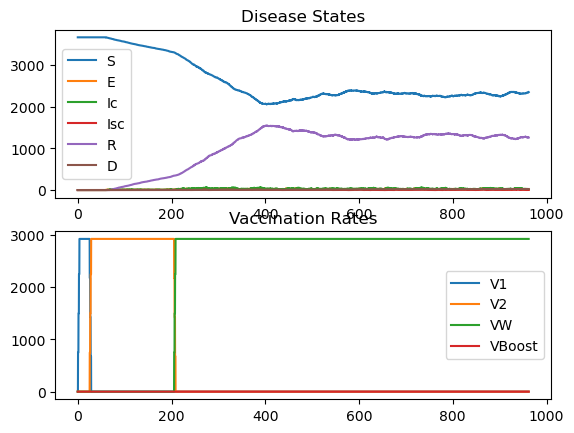

In [6]:
result = BICS_ABM( 
        N_HH = 1000,
        SEED = 4949, 
        RHO = 0.9,
        ALPHA = 0.25,
        BETA0 =0.05,
        BETA1 = 0,
        T0 = 60,
        ISOLATION_MULTIPLIER = 0.5, 
        N_VAX_DAILY = 1500,
        T_REINFECTION = 24*180,
        IMPORT_CASES_VEC = [1] * 365,
        vax_rules = [
            VaccineRule("age > 80"),
            VaccineRule("age > 70"),
            VaccineRule("age > 60"),
            VaccineRule("age > 50", hesitancy = 0.5),
            VaccineRule("age > 40", hesitancy = 0.5),
            VaccineRule("age > 30", hesitancy = 0.5),
            VaccineRule(general = True, hesitancy = 0.5),
        ],
        silent = False,
        MAX_DAYS = 1000)

result.plot_trajectory()

In [7]:
# Calculate the effective R0 as beta * average contacts per hour per person * average time infectious

0.01 * np.mean(result.n_edges)/result.S[0] * ((48+96)/2 + (72+168)/2)

0.200792728929595

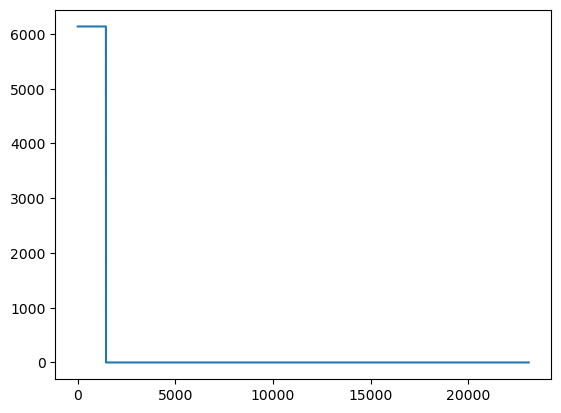

In [8]:
plt.plot(result.n_edges)

In [ ]:
plt.plot(result.n_edges)

# Main analysis

Run simulations that gradually decrease number of nonhousehold contacts required for priority access. Start at 30
and work down. Begin by assuming no asymptomatic transmission and 70% symptomatic rate, no isolation.


Run 10 simulations for each, and chart the number of deaths.

4 vaccine priorities: 
- No vax
- Equal priority vax
- Age priority
- Contact priority

4 transmission scenarios: 
- With all of the above
- With all of the above + prior immunity
- No isolation, no pre/asymptomatic transmission, no NPIs, no prior immunity

# Q1: Comparing strategies

In [ ]:
q1_df = pd.read_csv("q1_df.csv", index_col = 0)

In [ ]:
q1_d = [x.index[x == x.min()].values.tolist() for i, x in q1_df.filter(like="_d").iterrows()]
q1_d = [item for sublist in q1_d for item in sublist]

print(collections.Counter(q1_d))

q1_r = [x.index[x == x.min()].values.tolist() for i, x in q1_df.filter(like="_r").iterrows()]
q1_r = [item for sublist in q1_r for item in sublist]

print(collections.Counter(q1_r))

# Q2: What it index cases come after vaccines have been distributed?

In [ ]:
q2_df = pd.read_csv("q2_df.csv", index_col=0)
# For each sim, figure out which strategy had lowest death and infection rates

q2_d = [x.index[x == x.min()].values.tolist() for i, x in q2_df.filter(like="_d").iterrows()]
q2_d = [item for sublist in q2_d for item in sublist]

print(collections.Counter(q2_d))

q2_r = [x.index[x == x.min()].values.tolist() for i, x in q2_df.filter(like="_r").iterrows()]
q2_r = [item for sublist in q2_r for item in sublist]

print(collections.Counter(q2_r))


# Q3: Finding the top % of num_cc to vaccinate

In [ ]:
q3_df = pd.read_csv("q3_df.csv", index_col = 0)
col = q3_df.pop("general_d")
q3_df.insert(q3_df.shape[1], "0_d", col)
col = q3_df.pop("general_r")
q3_df.insert(q3_df.shape[1], "0_r", col)
q3_df

In [ ]:
q3_d = q3_df.filter(like="_d")
q3_r = q3_df.filter(like="r")
x = [re.split("_",x) for x in q3_d.columns]
x = [int(y[0]) for y in x]
print(x)

In [ ]:
fix, ax = plt.subplots(2, figsize= (10,10))

ax[0].plot(x, q3_d.quantile(.5)*100, color = "red", label="Median")
ax[0].plot(x, q3_d.quantile(.25)*100, color = "black", label = "50% of simulations")
ax[0].plot(x, q3_d.quantile(.75)*100, color = "black")
ax[0].plot(x, q3_d.quantile(.05)*100, color = "grey", label = "90% of simulations")
ax[0].plot(x, q3_d.quantile(.95)*100, color = "grey")
ax[0].set_title("Deaths (% of Population)")
ax[0].set(xlabel="Vaccine Eligibility Threshold Number of Non-Household Contacts", ylabel="%")
ax[0].legend(loc='center left', bbox_to_anchor=(1, -.1))

ax[1].plot(x, q3_r.quantile(.5) *100, color = "red")
ax[1].plot(x, q3_r.quantile(.25)*100, color = "black")
ax[1].plot(x, q3_r.quantile(.75)*100, color = "black")
ax[1].plot(x, q3_r.quantile(.05)*100, color = "grey")
ax[1].plot(x, q3_r.quantile(.95)*100, color = "grey")
ax[1].set_title("Infections (% of Population)")
ax[1].set(xlabel="Vaccine Eligibility Threshold Number of Non-Household Contacts", ylabel="%")

plt.savefig("figs/cc_threshhold.png",bbox_inches='tight')

# Sensitivity tests

beta: 0.0001 to 0.1

rho (probability of clinical): 0 to 1

alpha (relative infectiousness of pre and asymptomatic): 0 to 1

isolation multiplier: 0 to 1

In [ ]:
# beta vec with no asymptomatic transmission
beta_vec = np.arange(0.001, 0.1 , 0.001)
beta_vec = beta_vec.repeat(10)

t = time.time()


def multi_fn(beta):
    """ Wrapper function for multiprocessing
    
    """
    
    result = BICS_ABM(
        ALPHA = 0,
        RHO = 1,
        N_HH = 1000, BETA = beta, 
        silent = True, 
        N_VAX_DAILY = 0
    )
    
    return (result.R[-1] / (result.S[0] + result.E[0]), result.D[-1] / (result.S[0] + result.E[0]))
    
    
result_vec = Parallel(n_jobs=8, verbose = 10)(delayed(multi_fn)(v) for v in beta_vec)
    
    
t = time.time() - t

print(len(beta_vec), "iterations took", t, "seconds")



In [ ]:


fig, ax = plt.subplots(2)
ax[0].scatter(beta_vec, [x[0] for x in result_vec])
ax[1].scatter(beta_vec, [x[1] for x in result_vec])

# Jointly vary the isolation multiplier and the proportion of symptomatic cases

In [ ]:
isomult_vec = np.arange(0, 1, 0.1)
rho_vec = np.arange(0, 1, 0.1)
isomult_vec, rho_vec = np.meshgrid(isomult_vec, rho_vec)
isomult_vec = isomult_vec.flatten().repeat(10)
rho_vec = rho_vec.flatten().repeat(10)


t = time.time()


def multi_fn(i, r):
    """ Wrapper function for multiprocessing
    
    """
    
    result = BICS_ABM(
        RHO = r,
        ISOLATION_MULTIPLIER = i, 
        N_HH = 1000, BETA = 0.01, 
        silent = True, 
        N_VAX_DAILY = 0
    )
    
    return (result.R[-1] / (result.S[0] + result.E[0]), result.D[-1] / (result.S[0] + result.E[0]))
    
    
result_vec = Parallel(n_jobs=8, verbose = 10)(delayed(multi_fn)(*x) for x in zip(isomult_vec, rho_vec))
    
    
t = time.time() - t

print(len(result_vec), "iterations took", t, "seconds")



In [ ]:
dv = np.array([x[0] for x in result_vec]).reshape((10,10,10))
iv = np.array([x[1] for x in result_vec]).reshape((10,10,10))

In [ ]:
plt.imshow(iv, extent = [0,1,0,1])
plt.title("% Of population infected")
plt.xlabel("Isolation Multiplier")
plt.ylabel("Proportion of cases that are clinical")
plt.show()

In [ ]:
plt.imshow(dv, extent = [0,1,0,1])
plt.title("% Of population dead")
plt.xlabel("Isolation Multiplier")
plt.ylabel("Proportion of cases that are clinical")
plt.show()

# Speed test

Not whole necessary, but kind of fun. Seems like there is no benefit past 4 or 8 threads.


In [ ]:
if True:
    reps = np.arange(1, 128, 1)



    def multi_fn(i):
        """ Wrapper function for multiprocessing

        """

        result = BICS_ABM(
            N_HH = 1000, 
            silent = True, 
        )

        return 0


    tlist = list()
    jlist = [4, 8, 16, 32, 64, 128]
    for jobs in jlist:
        t = time.time()
        Parallel(n_jobs=jobs, verbose = 10, prefer="threads")(delayed(multi_fn)(v) for v in reps)
        t = time.time() - t
        tlist.append(t)

    plt.scatter(jlist, tlist)